# Farah work
# We import the data and clean it


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


# In total we have 362 rows(participant) but not all of them answer to all the Questions 

In [3]:

# Specify the path to your Excel file
excel_file_path = 'C:/Users/samir/Farah_new1.xlsx'

df = pd.read_excel(excel_file_path)
num_rows = len(df)
print("Number of rows:", num_rows)


df = pd.read_excel(excel_file_path).dropna()

df.head(10)


Number of rows: 362


طابع زمني  result your  gender  Your age   \
1  2024-01-28 19:06:50.527      21       Female       25.0   
3  2024-01-28 20:13:21.480      18       Female       24.0   
8  2024-02-01 18:44:29.684      18       Female       33.0   
9  2024-02-01 18:45:09.874      24       Female       35.0   
10 2024-02-01 18:48:20.221      23       Female       28.0   
11 2024-02-01 18:53:13.563      24       Female       43.0   
12 2024-02-01 19:24:52.428      21       Female       26.0   
13 2024-02-01 22:02:04.063      23       Female       29.0   
14 2024-02-02 12:06:51.981      23       Female       28.0   
15 2024-02-02 12:12:08.455      22       Female       34.0   

    your years of experience  your monthly income   \
1                        1.0                   0.0   
3                       22.0                 222.0   
8                        9.0                 500.0   
9                        3.0                 500.0   
10                       7.0                 500.0   
11                      20.0                1000.0   
12                       2.0                 250.0   
13                       2.0                 300.0   
14                       3.0                 300.0   
15                      10.0                 600.0   

   Which of the following is a benefit of implanting an intrauterine device (IUD), for which an IUD may be recommended, in addition to contraception?  \
1               Reduction of heavy menstrual bleeding                                                                                                   
3                     Treatment of endometrial cancer                                                                                                   
8          Prophylaxis of pelvic inflammatory disease                                                                                                   
9               Reduction of heavy menstrual bleeding                                                                                                   
10              Reduction of heavy menstrual bleeding                                                                                                   
11              Reduction of heavy menstrual bleeding                                                                                                   
12               Normalizing erratic menstrual cycles                                                                                                   
13               Normalizing erratic menstrual cycles                                                                                                   
14              Reduction of heavy menstrual bleeding                                                                                                   
15                    Treatment of endometrial cancer                                                                                                   

   women cant use a copper IUD if she    \
1                          all of above   
3                          all of above   
8             have an allergy to copper   
9                          all of above   
10                         all of above   
11                         all of above   
12                         all of above   
13                         all of above   
14                         all of above   
15                         all of above   

   one of the following is consider as advantage of hormonal IUD   \
1   women can have irregular bleeding, lighter per...               
3                                        all of above               
8   it protect  against sexually transmitted infec...               
9                                        all of above               
10                                       all of above               
11  women can have irregular bleeding, lighter per...               
12  women who have recent pelvic infection can use it               
13  it protect  against sexua

In [4]:
df.replace(r'^\s*$', None, regex=True, inplace=True)

# Fill None values with NaN
df.fillna(pd.NA, inplace=True)

# Drop rows where values in a specific column are more than 21
df = df[df['result'] <= 21]



In [5]:
#Count the number of missing values in each column
missing_counts = df.isna().sum()

# Count the number of "Not Measured" values in each column
not_measured_counts = (df == "Not Measured").sum()

# Sum the missing counts and "Not Measured" counts across all columns
total_missing_count = missing_counts.sum()
total_not_measured_count = not_measured_counts.sum()

# Display the results
print("Total number of missing values in the dataset:", total_missing_count)
print("Total number of 'Not Measured' values in the dataset:", total_not_measured_count)

num_rows = len(df)
print("Number of rows:", num_rows)


Total number of missing values in the dataset: 0
Total number of 'Not Measured' values in the dataset: 0
Number of rows: 315


# after cleaning and removing the empty rows the number dropped to 315 rows(participant) ,We are going to work with these rows(participant)

# Then next we view the columns and their unique values 

In [6]:
print(df.columns)


Index(['طابع زمني', 'result', 'your  gender', 'Your age ',
       'your years of experience', 'your monthly income ',
       'Which of the following is a benefit of implanting an intrauterine device (IUD), for which an IUD may be recommended, in addition to contraception?',
       'women cant use a copper IUD if she  ',
       'one of the following is consider as advantage of hormonal IUD ',
       'An IUD can be inserted  ',
       'both hormonal and copper IUD are safe to use while breastfeeding.',
       'We must advise the patient to take iron-containing supplements while using an IUD, especially a copper IUD',
       'IUD Can be used by women of any age, including adolescents.',
       'IUD Can not be used by women who have not had   children ',
       'IUD increase the risk of contracting STIs, including HIV\n',
       'IUD Do not increase the risk of miscarriage when a woman becomes pregnant\nafter the IUD is removed',
       'IUD make women infertile.', 'IUD  cause birth defect

In [7]:
columns_to_check = ['result', 'your  gender', 'Your age ',
       'your years of experience', 'your monthly income ',
       'Which of the following is a benefit of implanting an intrauterine device (IUD), for which an IUD may be recommended, in addition to contraception?',
       'women cant use a copper IUD if she  ',
       'one of the following is consider as advantage of hormonal IUD ',
       'An IUD can be inserted  ',
       'both hormonal and copper IUD are safe to use while breastfeeding.',
       'We must advise the patient to take iron-containing supplements while using an IUD, especially a copper IUD',
       'IUD Can be used by women of any age, including adolescents.',
       'IUD Can not be used by women who have not had   children ',
       'IUD increase the risk of contracting STIs, including HIV\n',
       'IUD Do not increase the risk of miscarriage when a woman becomes pregnant\nafter the IUD is removed',
       'IUD make women infertile.', 'IUD  cause birth defects.',
       'IUD Do not cause cancer.', 'IUD Do not move to the heart or brain',
       'IUD cause discomfort or pain for the woman or the man during sex.',
       'IUD Substantially reduce the risk of ectopic pregnancy.',
       'A woman has severe pain in her lower abdomen, unusual vaginal discharge, and a fever. What is your advice?',
       'WOMEN experience changes in her bleeding patterns. she have heavier or longer periods than she had before getting the copper IUD , what is your advice ?  ',
       'A womans monthly bleeding stops very soon after the insertion of a hormonal IUD. What is your advice ?',
       'A woman has acne while using an IUD. What is your advice?',
       'For one or two days, PATEINT may have some minor cramps and light bleeding (spotting). WHAT ADVICE DO YOU HAVE FOR PATEINT?',
       'what is your information source/s about IUD ?']

for column in columns_to_check:
    unique_values = df[column].unique()
    print(f"Unique values for '{column}': {unique_values}")


Unique values for 'result': [21 18 15 17 19 20  8 16 13 12 14  9 11  7  3 10  2  6  5  4]
Unique values for 'your  gender': ['Female' 'Male']
Unique values for 'Your age ': [25. 24. 33. 26. 27. 30. 23. 34. 31. 42. 28. 29. 53. 43. 41. 35. 40. 45.
 32. 44. 37. 36. 38. 39. 55. 22. 60. 51. 54. 46. 49. 47. 56. 63. 50.]
Unique values for 'your years of experience': [ 1.  22.   9.   2.   3.   8.  28.  11.5  4.   5.  20.  12.  10.   0.6
  6.  45.   7.  19.  18.  16.  11.  17.  14.  15.  13.  24.  23.  30.
 40.  27.  26.  43.  25.  21.  31. ]
Unique values for 'your monthly income ': [0.00e+00 2.22e+02 5.00e+02 2.50e+02 4.50e+02 2.60e+02 2.00e+00 1.00e+03
 6.00e+02 4.00e+02 7.00e+02 4.70e+02 3.00e+02 3.90e+02 5.60e+02 5.80e+02
 6.10e+02 4.30e+02 3.80e+02 4.20e+02 3.40e+02 4.10e+02 4.40e+02 5.40e+02
 7.90e+02 5.30e+02 6.40e+02 3.70e+02 7.40e+02 3.60e+02 5.20e+02 7.25e+02
 4.90e+02 6.34e+02 6.20e+02 4.58e+02 5.70e+02 4.49e+02 7.56e+02 5.98e+02
 6.24e+02 3.42e+02 3.10e+02 2.90e+02 3.20e+02 3.45e+0

# To work with the data we have to change it to a boolean form (True or False) beacease the Questions has answer (Correct Value)

In [8]:
dc_df = pd.get_dummies(df , columns = [ 'your  gender',
       'Which of the following is a benefit of implanting an intrauterine device (IUD), for which an IUD may be recommended, in addition to contraception?',
       'women cant use a copper IUD if she  ',
       'one of the following is consider as advantage of hormonal IUD ',
       'An IUD can be inserted  ',
       'both hormonal and copper IUD are safe to use while breastfeeding.',
       'We must advise the patient to take iron-containing supplements while using an IUD, especially a copper IUD',
       'IUD Can be used by women of any age, including adolescents.',
       'IUD Can not be used by women who have not had   children ',
       'IUD increase the risk of contracting STIs, including HIV\n',
       'IUD Do not increase the risk of miscarriage when a woman becomes pregnant\nafter the IUD is removed',
       'IUD make women infertile.', 'IUD  cause birth defects.',
       'IUD Do not cause cancer.', 'IUD Do not move to the heart or brain',
       'IUD cause discomfort or pain for the woman or the man during sex.',
       'IUD Substantially reduce the risk of ectopic pregnancy.',
       'A woman has severe pain in her lower abdomen, unusual vaginal discharge, and a fever. What is your advice?',
       'WOMEN experience changes in her bleeding patterns. she have heavier or longer periods than she had before getting the copper IUD , what is your advice ?  ',
       'A womans monthly bleeding stops very soon after the insertion of a hormonal IUD. What is your advice ?',
       'A woman has acne while using an IUD. What is your advice?',
       'For one or two days, PATEINT may have some minor cramps and light bleeding (spotting). WHAT ADVICE DO YOU HAVE FOR PATEINT?',
       'what is your information source/s about IUD ?'])
dc_df.head(10)

طابع زمني  result  Your age   your years of experience  \
1  2024-01-28 19:06:50.527      21       25.0                       1.0   
3  2024-01-28 20:13:21.480      18       24.0                      22.0   
8  2024-02-01 18:44:29.684      18       33.0                       9.0   
12 2024-02-01 19:24:52.428      21       26.0                       2.0   
18 2024-02-02 12:45:05.293      15       27.0                       3.0   
22 2024-02-02 13:05:15.950      17       30.0                       8.0   
23 2024-02-02 13:16:59.072      21       30.0                       2.0   
25 2024-02-02 13:46:35.816      19       24.0                       1.0   
26 2024-02-02 13:47:58.041      18       23.0                       2.0   
31 2024-02-02 14:23:44.134      20       27.0                      28.0   

    your monthly income   your  gender_Female  your  gender_Male  \
1                    0.0                 True              False   
3                  222.0                 True              False   
8                  500.0                 True              False   
12                 250.0                 True              False   
18                 450.0                 True              False   
22                 250.0                 True              False   
23                   0.0                 True              False   
25                 260.0                 True              False   
26                 250.0                 True              False   
31                   2.0                 True              False   

    Which of the following is a benefit of implanting an intrauterine device (IUD), for which an IUD may be recommended, in addition to contraception?_Normalizing erratic menstrual cycles  \
1                                               False                                                                                                                                         
3                                               False                                                                                                                                         
8                                               False                                                                                                                                         
12                                               True                                                                                                                                         
18                                              False                                                                                                                                         
22                                              False                                                                                                                                         
23                                              False                                                                                                                                         
25                                               True                                                                                                                                         
26                                              False                                                                                                                                         
31                                              False                                                                                                                                         

    Which of the following is a benefit of implanting an intrauterine device (IUD), for which an IUD may be recommended, in addition to contraception?_Prophylaxis of pelvic inflammatory disease  \
1                                               False                                                                                          

In [9]:
dc_df.dtypes


طابع زمني                                                                                         datetime64[ns]
result                                                                                                     int64
Your age                                                                                                 float64
your years of experience                                                                                 float64
your monthly income                                                                                      float64
                                                                                                       ...      
what is your information source/s about IUD ?_My university studies, Self experience                        bool
what is your information source/s about IUD ?_My university studies, Self experience, Research              bool
what is your information source/s about IUD ?_Research                                          

In [10]:
# Assuming your DataFrame is named df_new and you want to save it to a file named 'new_data.xlsx'
#dc_df.to_excel('newFarah_data1.xlsx', index=False)


# small describtion about the Age and Years of Experience

In [11]:
dc_df.describe()



طابع زمني      result   Your age   \
count                            315  315.000000  315.000000   
mean   2024-02-26 13:56:29.057666560    8.320635   33.450794   
min       2024-01-28 19:06:50.527000    2.000000   22.000000   
25%    2024-02-14 16:44:28.186500096    6.000000   28.000000   
50%    2024-03-02 17:31:39.100999936    8.000000   31.000000   
75%    2024-03-11 17:44:27.974000128   10.000000   38.000000   
max       2024-03-11 23:18:07.448000   21.000000   63.000000   
std                              NaN    3.518204    7.689431   

       your years of experience  your monthly income   
count                315.000000            315.000000  
mean                  10.454286            416.380952  
min                    0.600000              0.000000  
25%                    5.000000            335.000000  
50%                    8.000000            380.000000  
75%                   14.000000            430.000000  
max                   45.000000           5500.000000  
std                    7.372829            319.479973

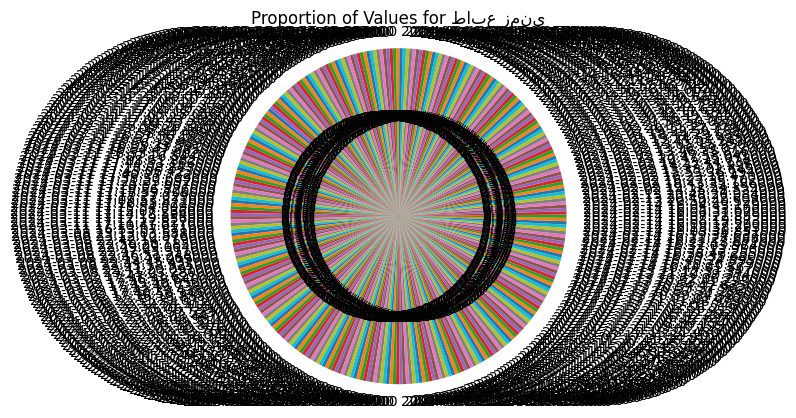

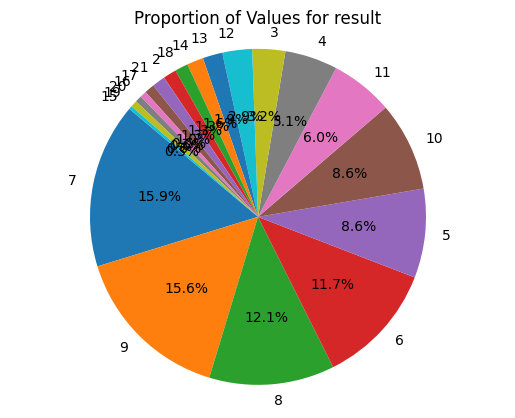

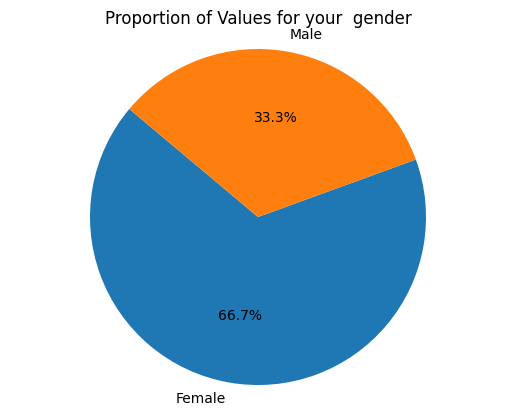

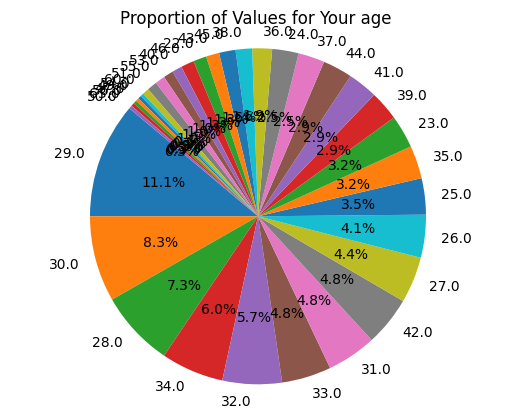

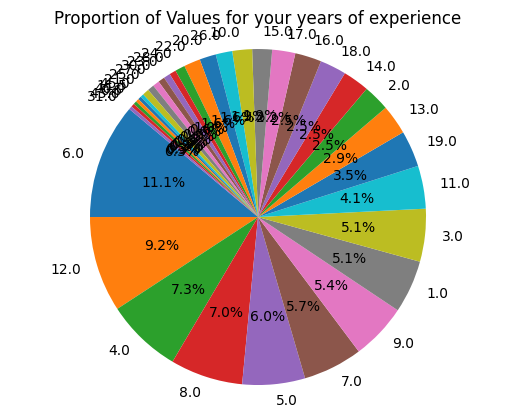

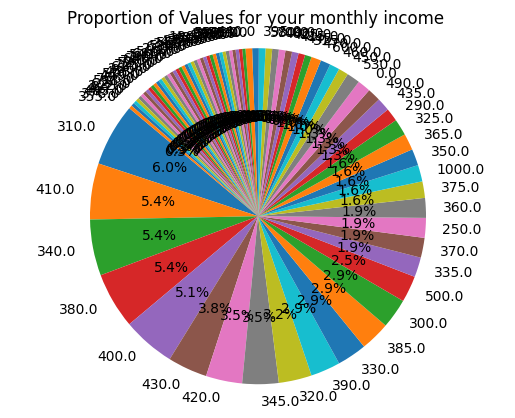

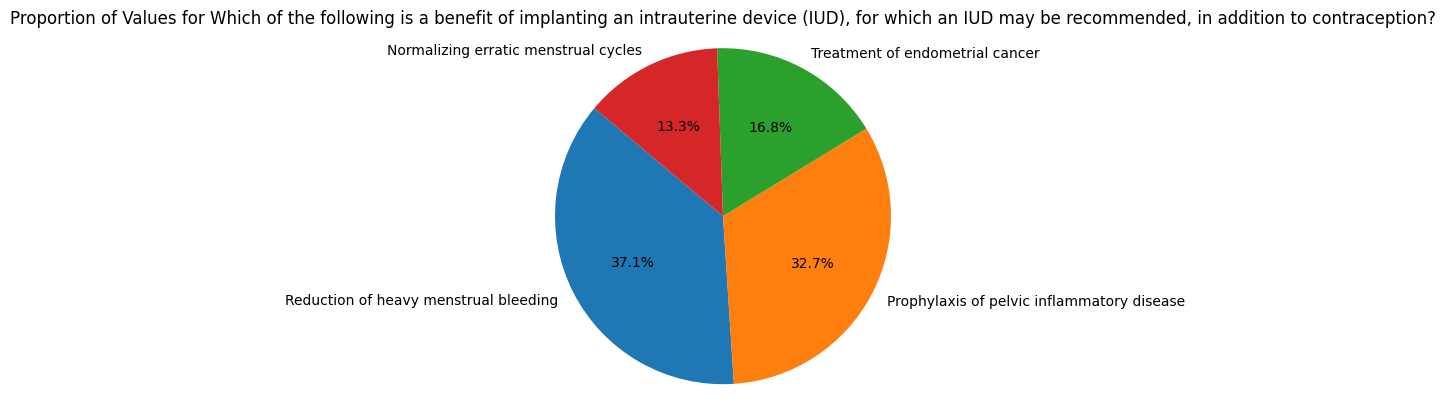

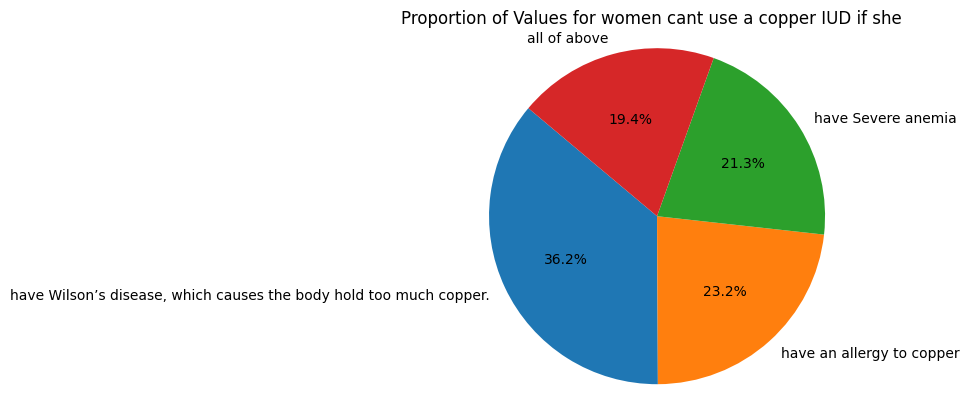

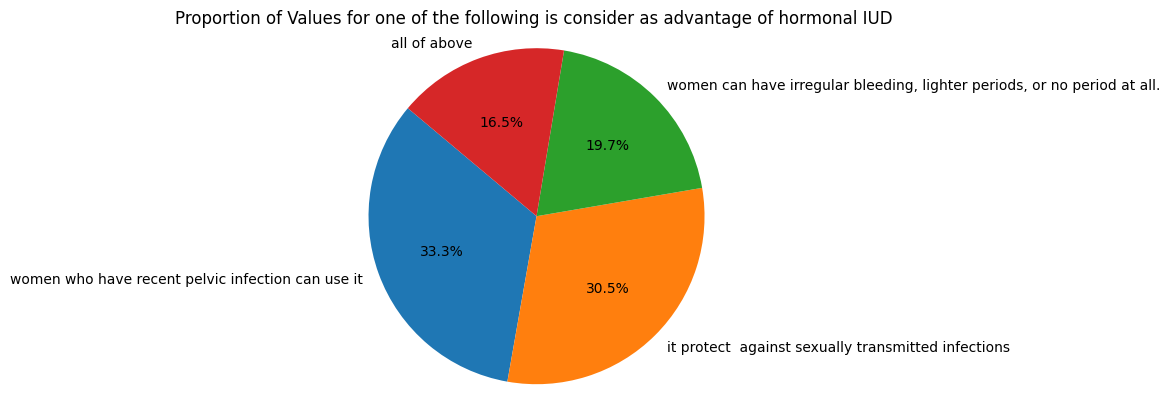

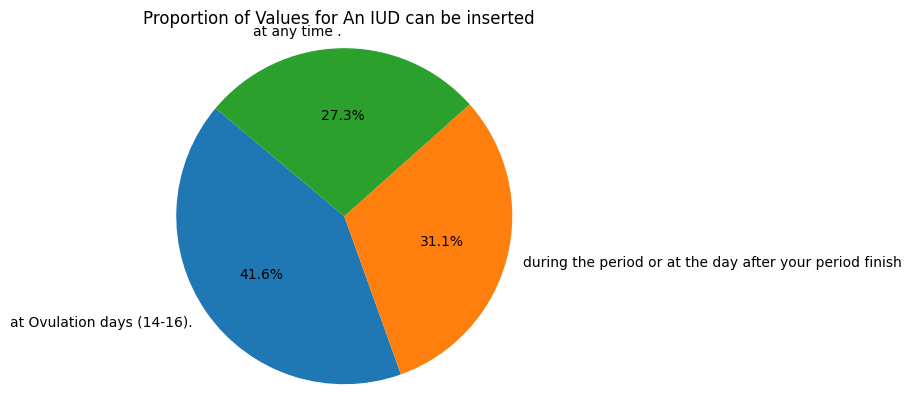

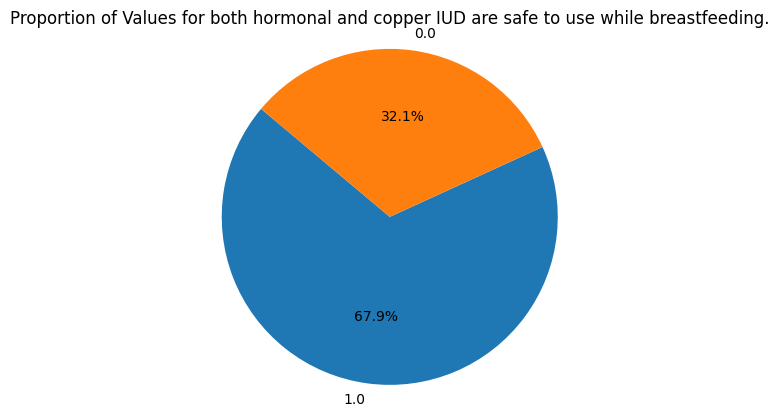

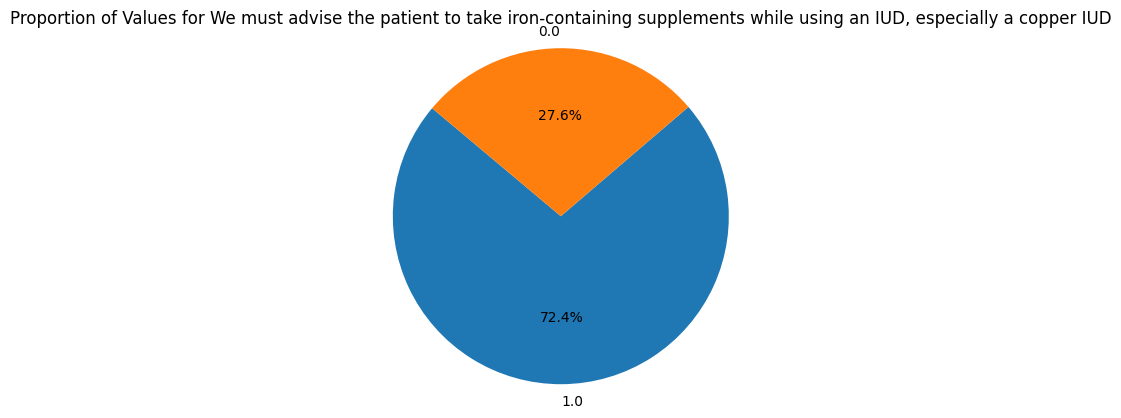

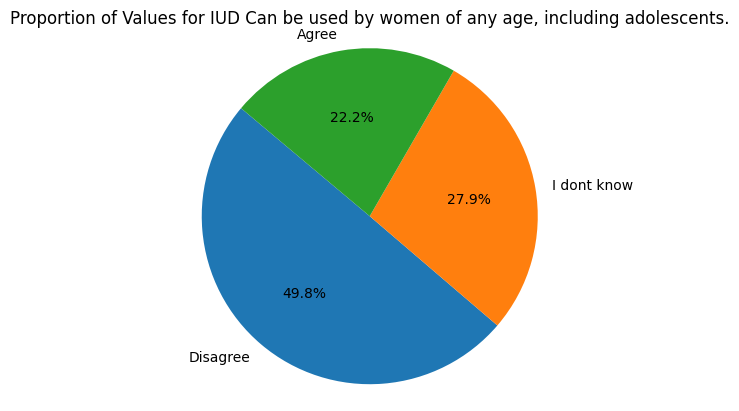

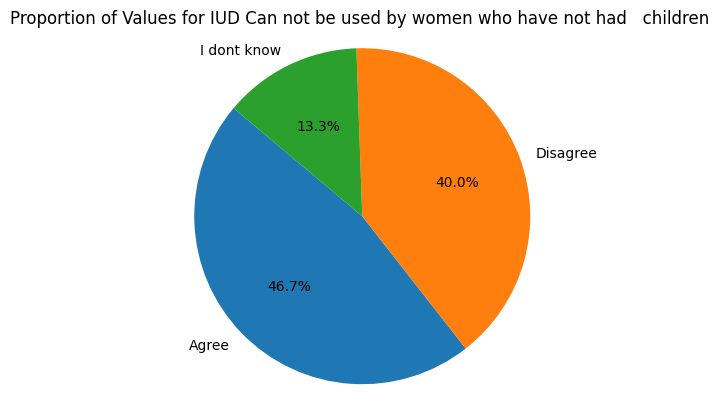

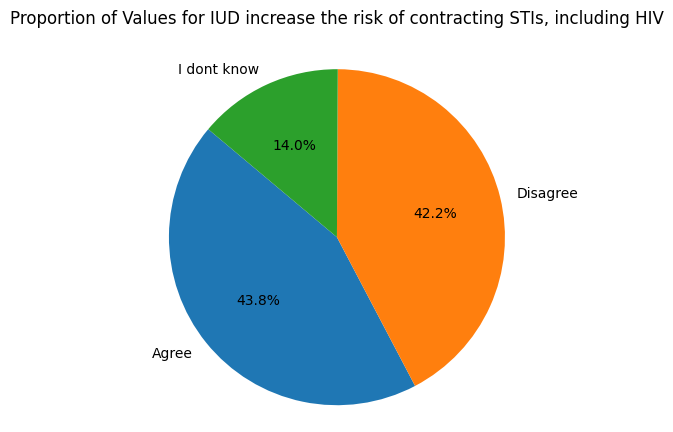

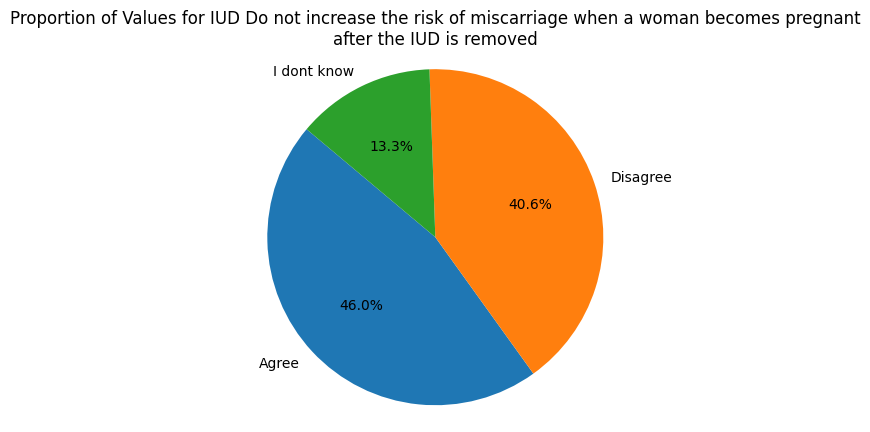

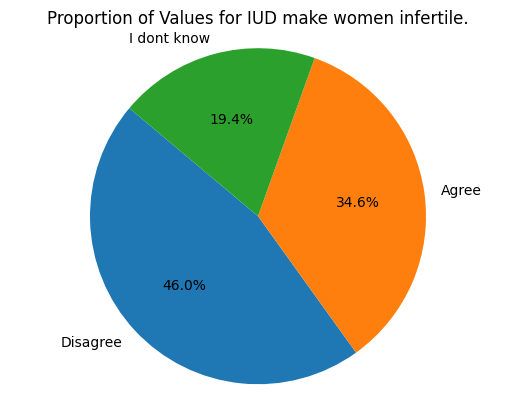

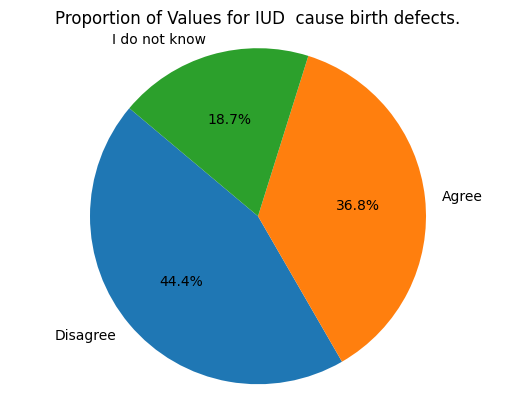

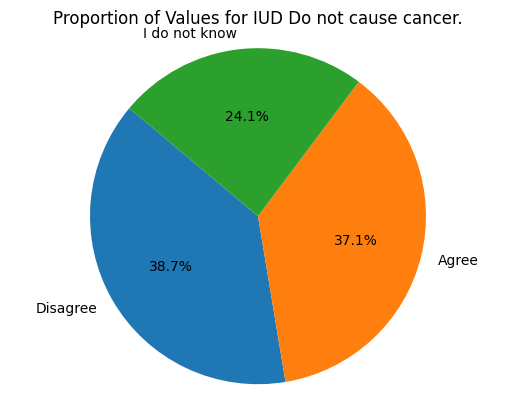

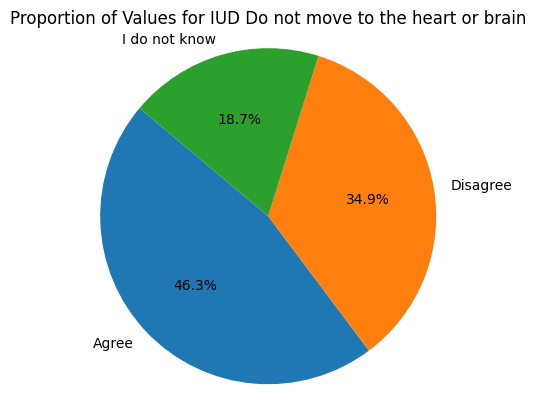

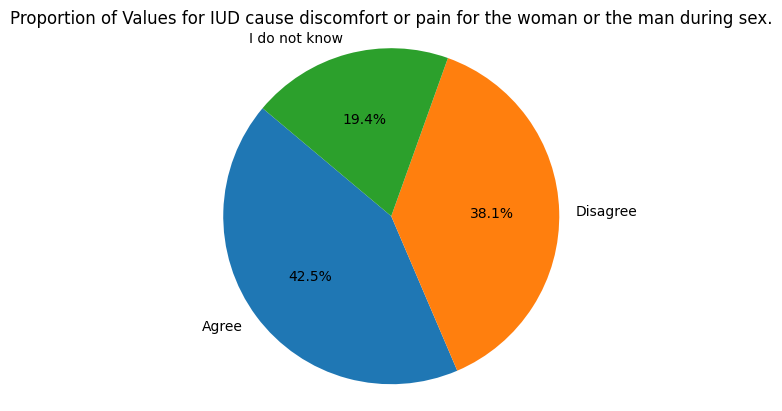

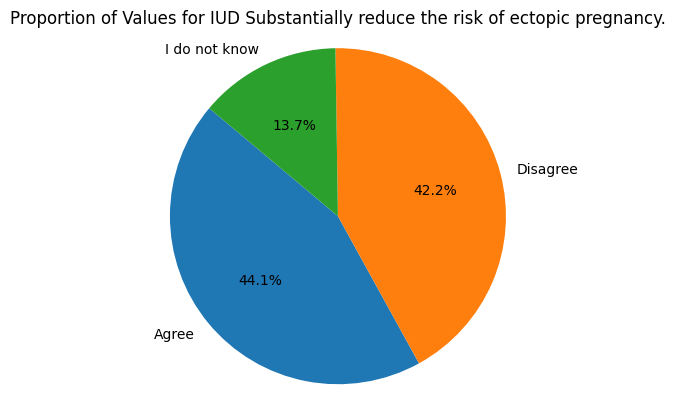

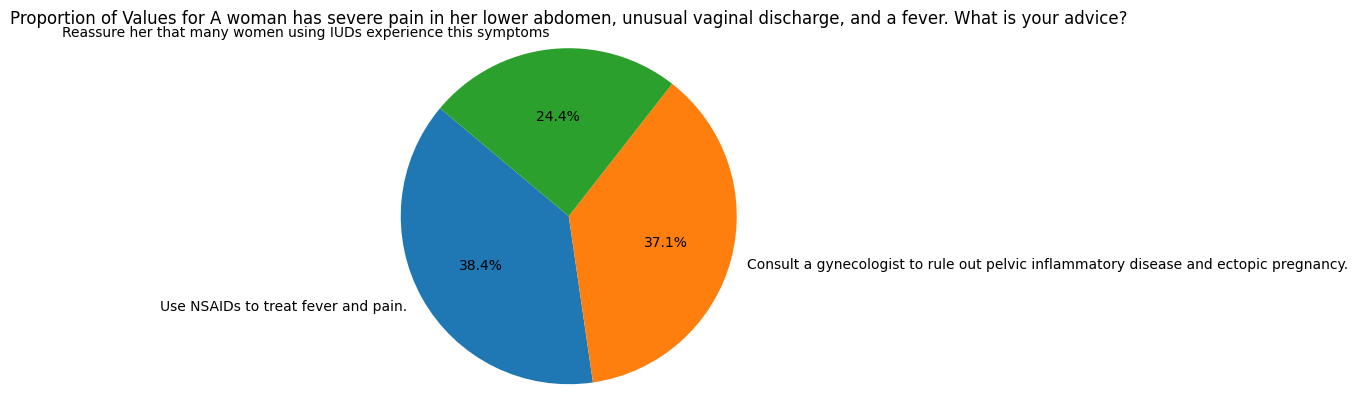

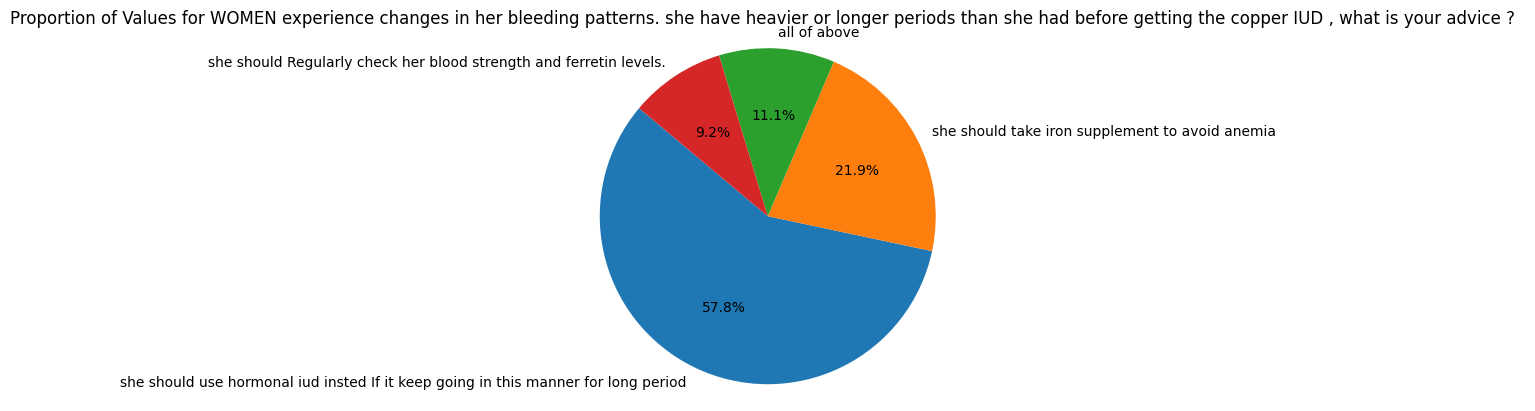

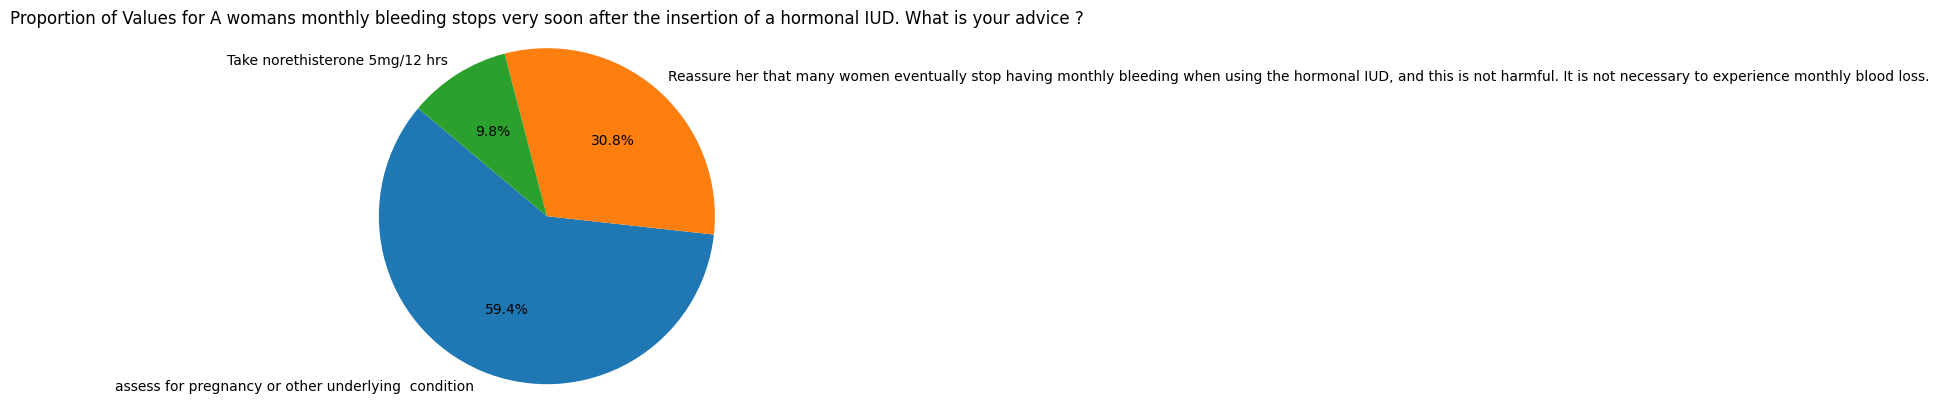

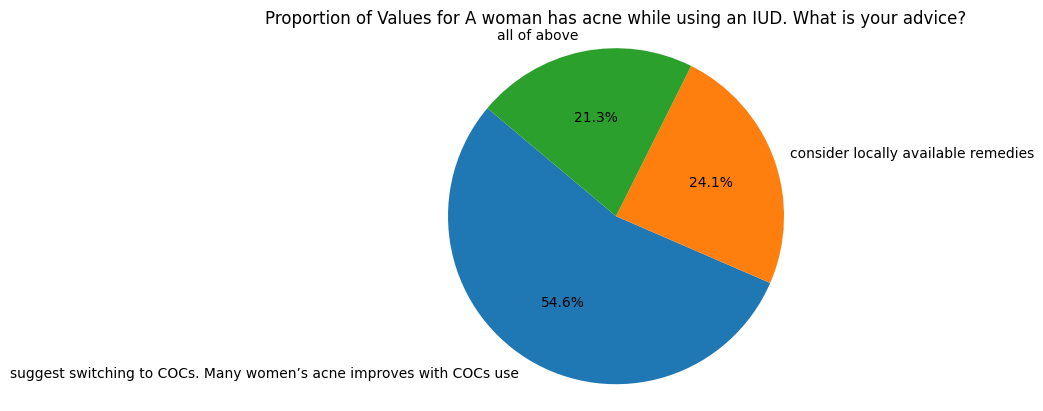

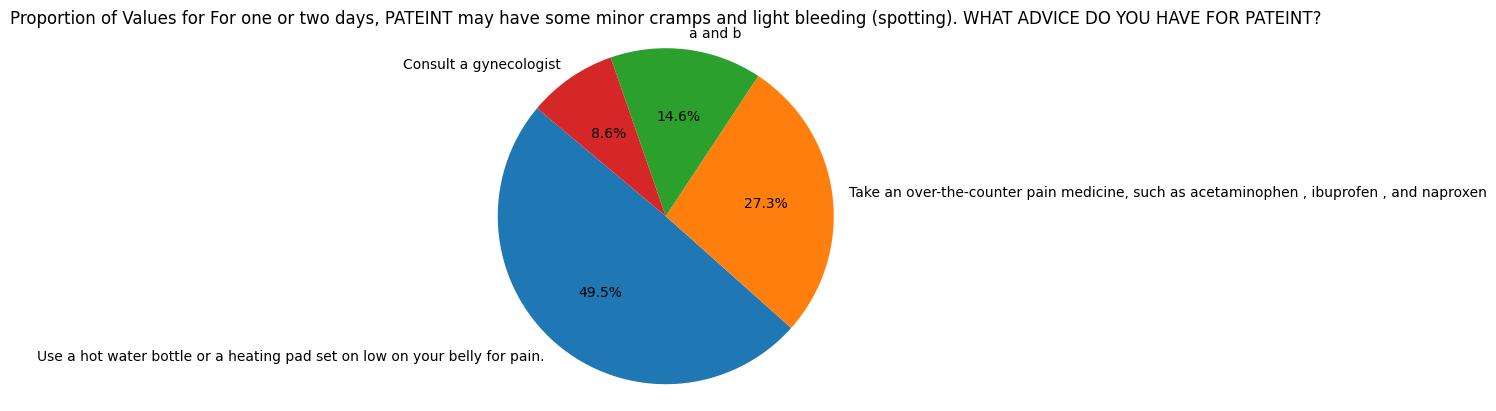

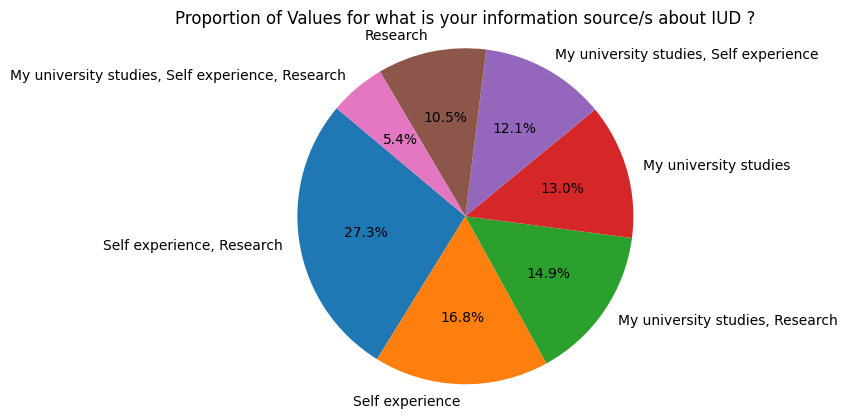

In [12]:
# Iterate over each column and plot a pie chart
for column in df.columns:
    try:
        plt.figure()
        counts = df[column].value_counts()
        plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140)
        plt.title(f'Proportion of Values for {column}')
        plt.axis('equal')
        plt.show()
    except Exception as e:
        print(f"Error plotting pie chart for column '{column}': {e}")


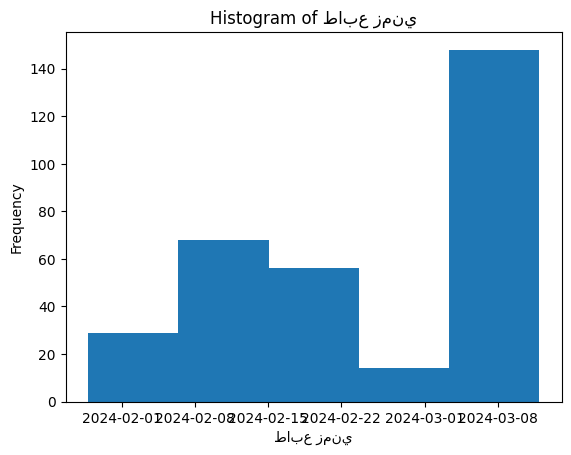

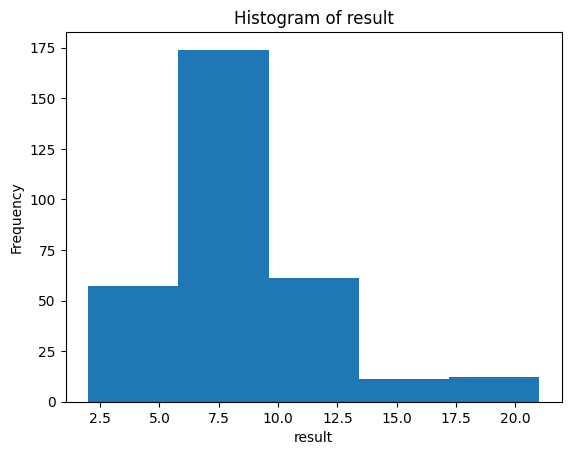

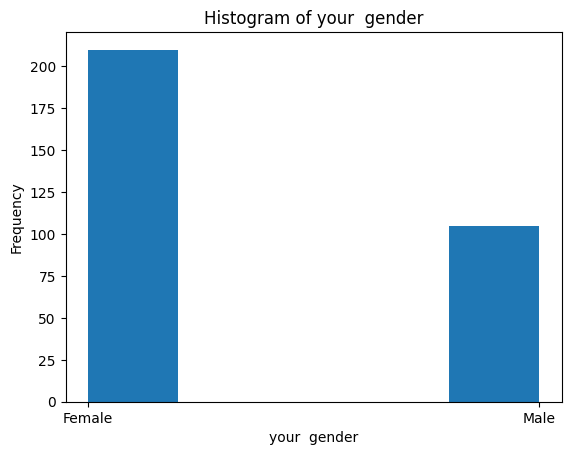

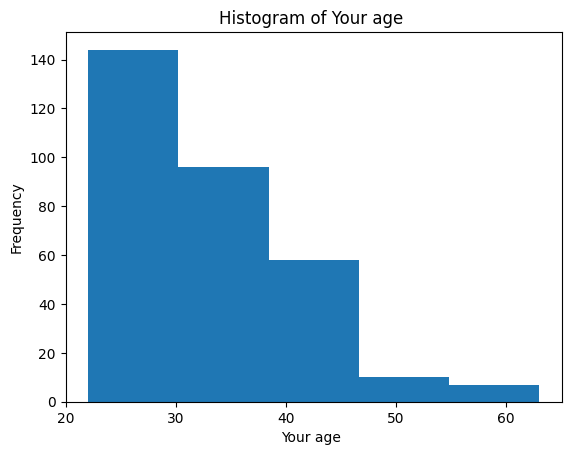

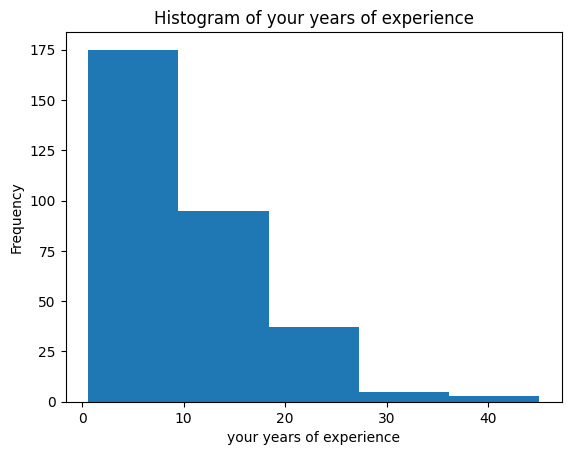

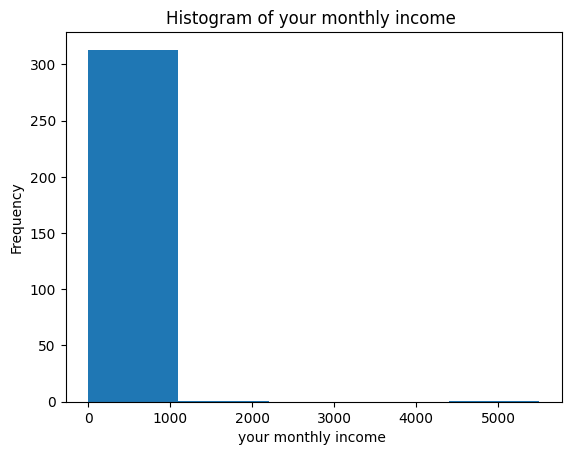

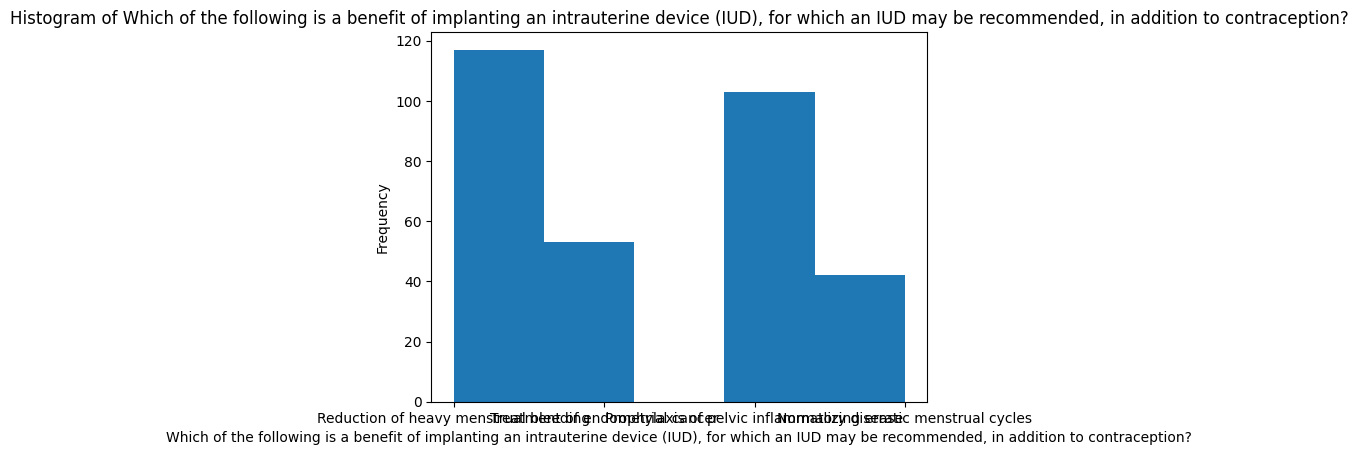

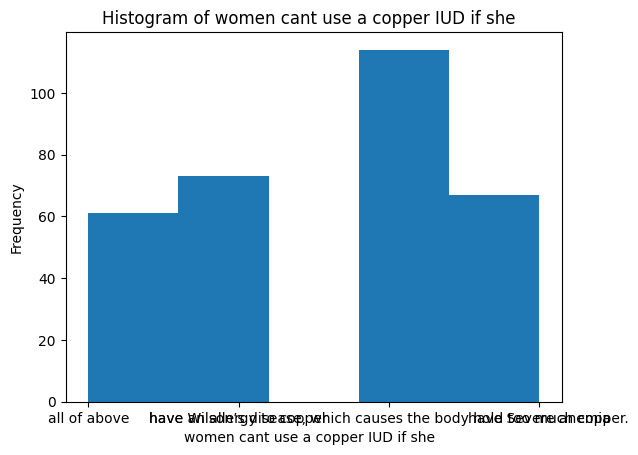

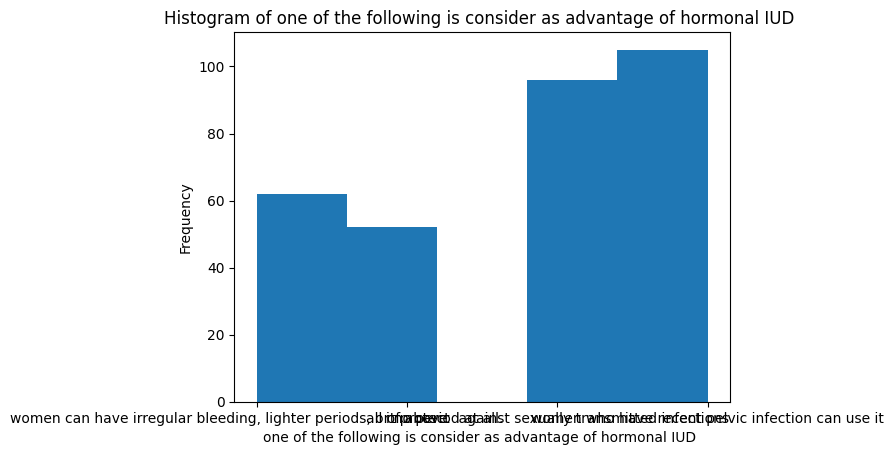

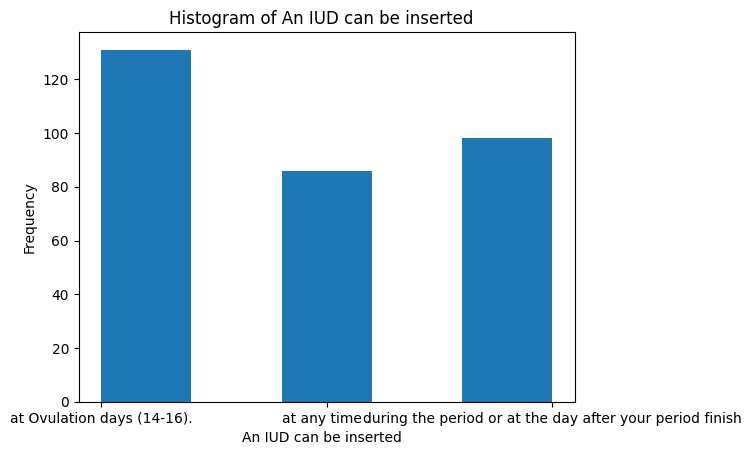

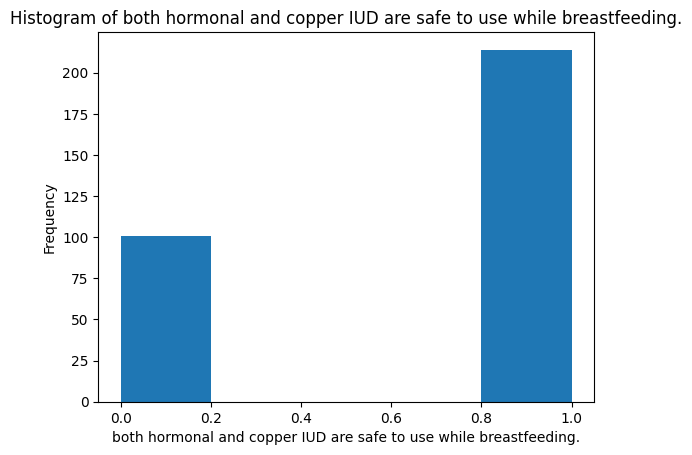

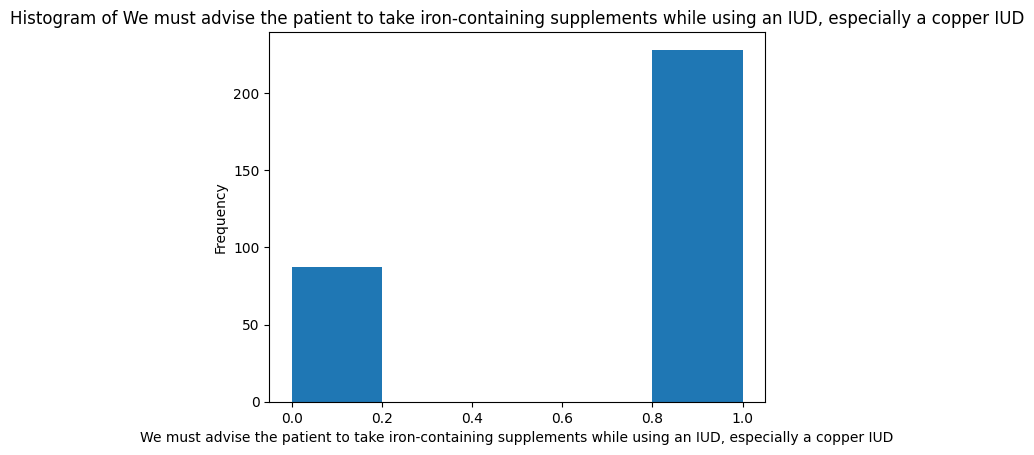

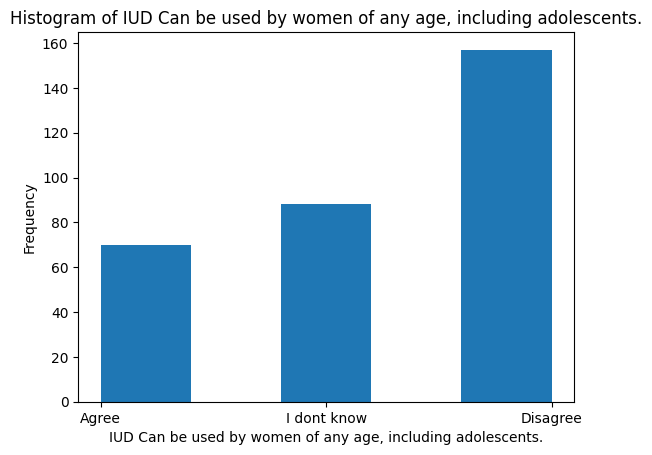

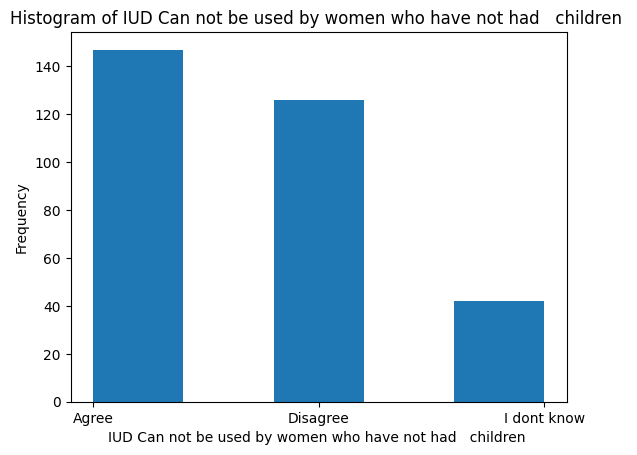

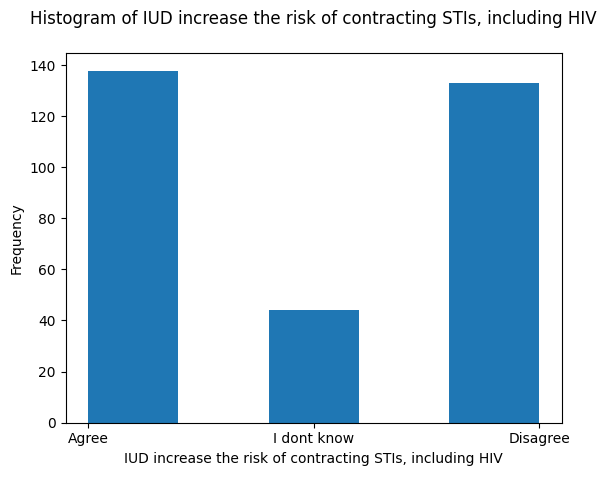

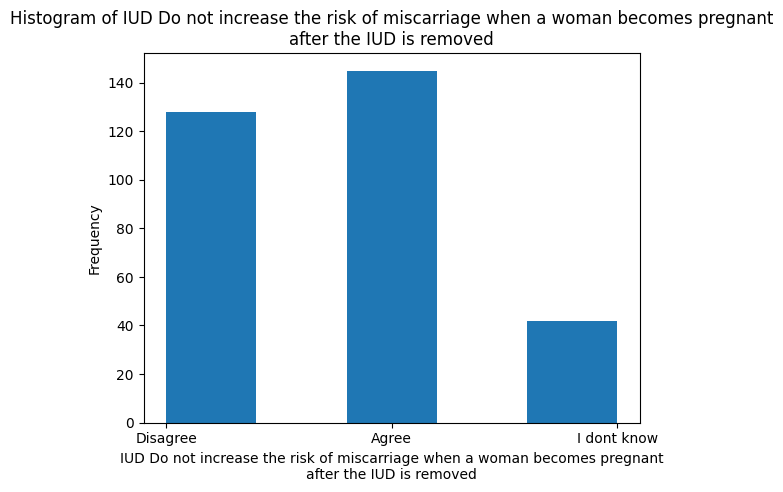

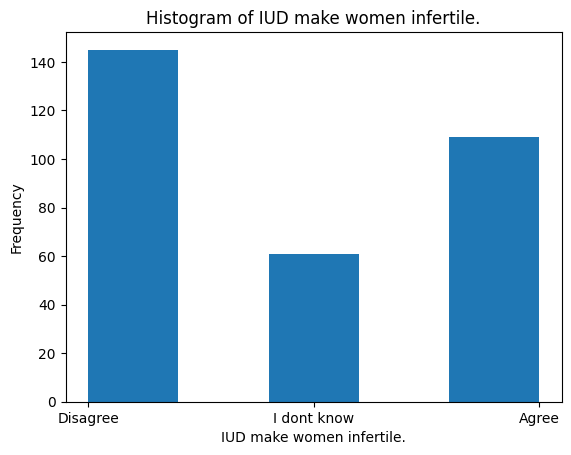

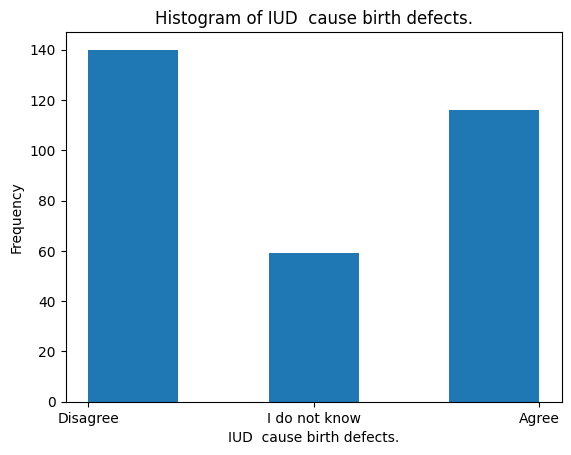

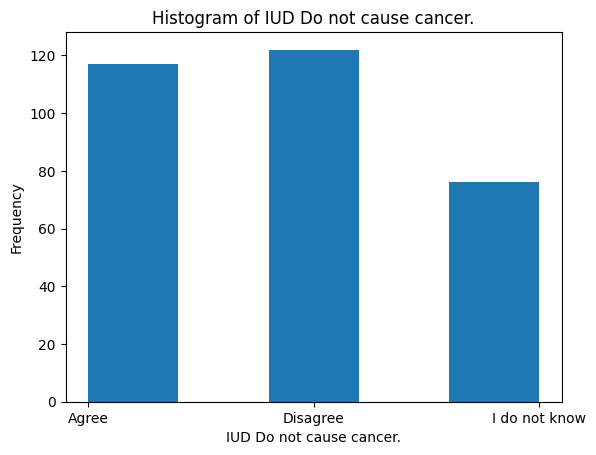

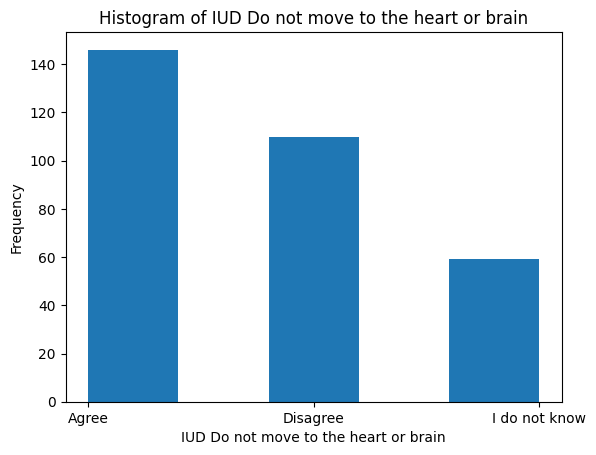

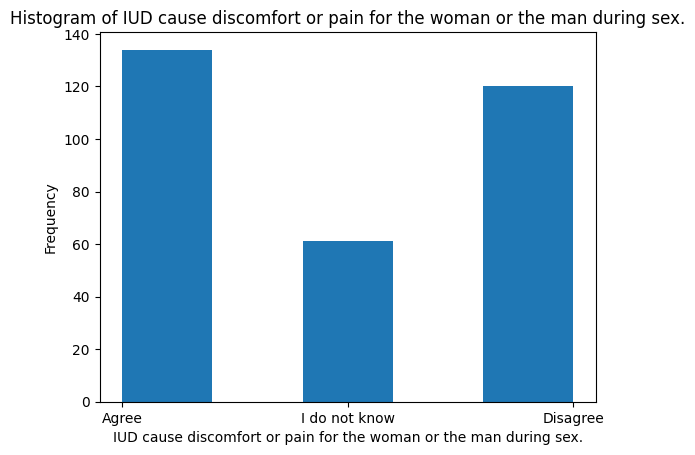

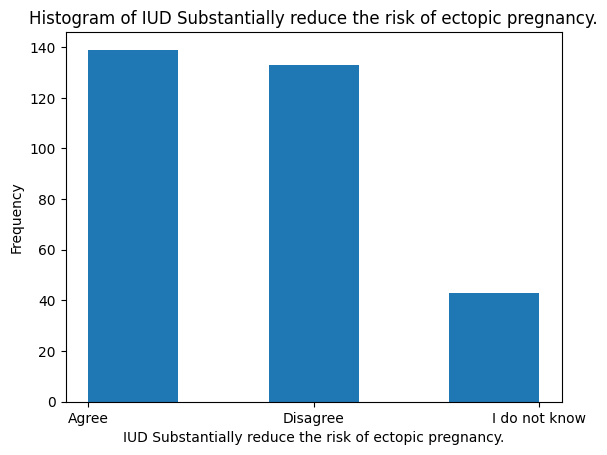

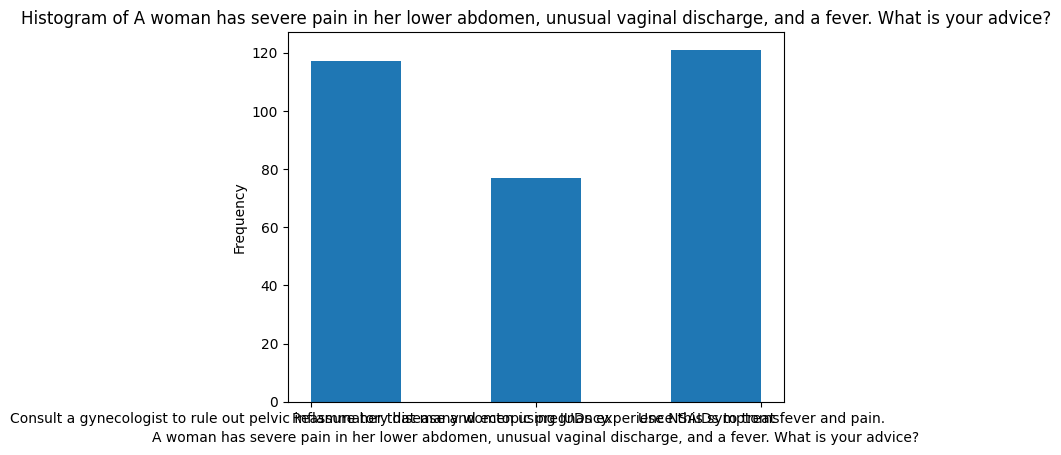

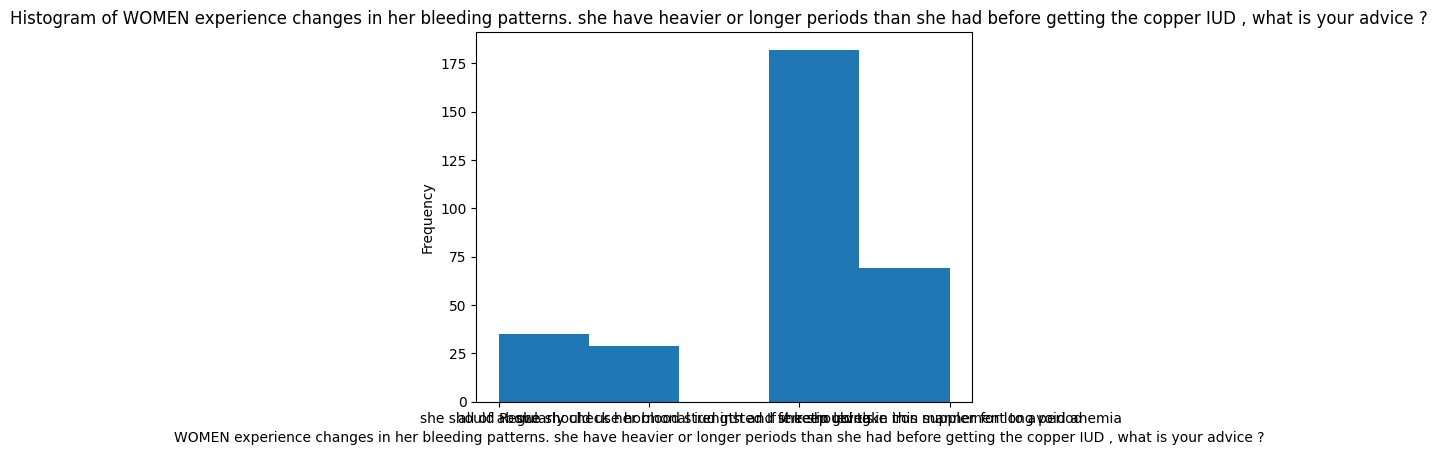

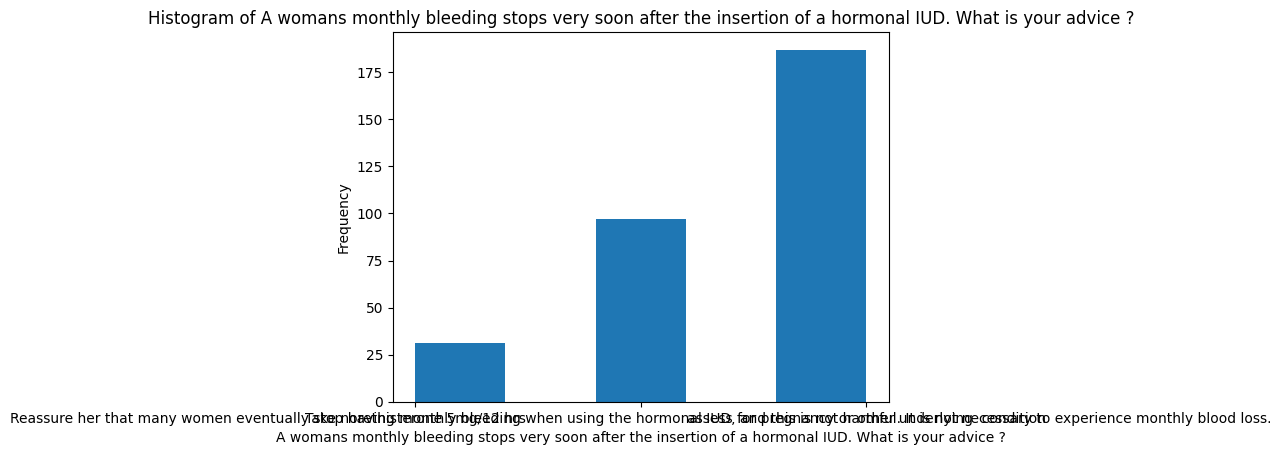

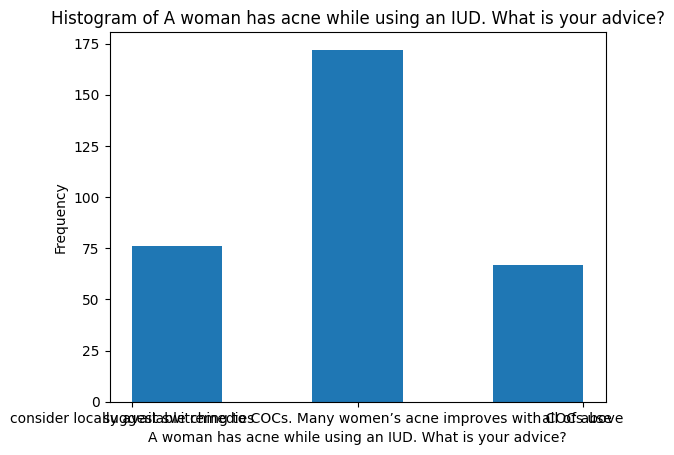

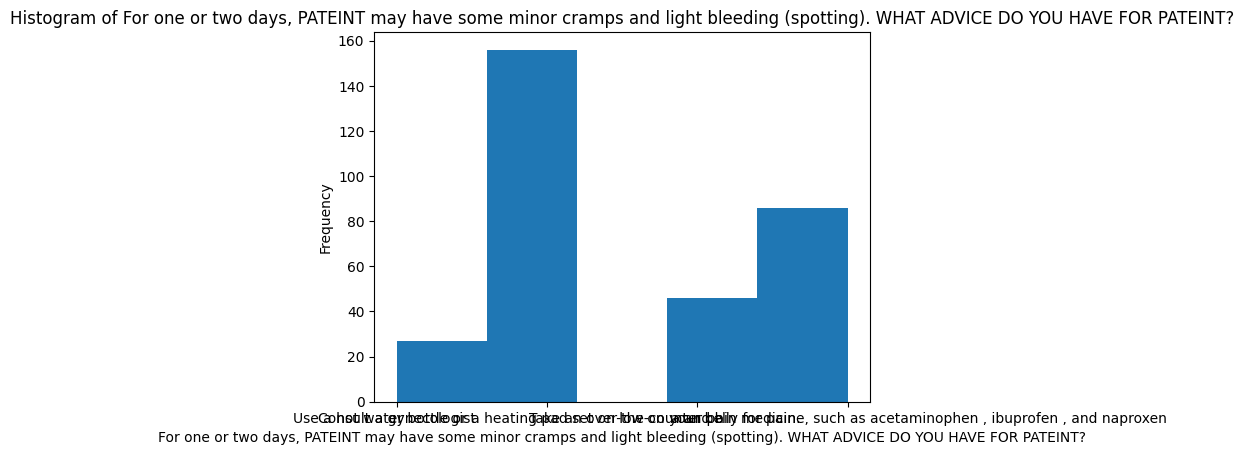

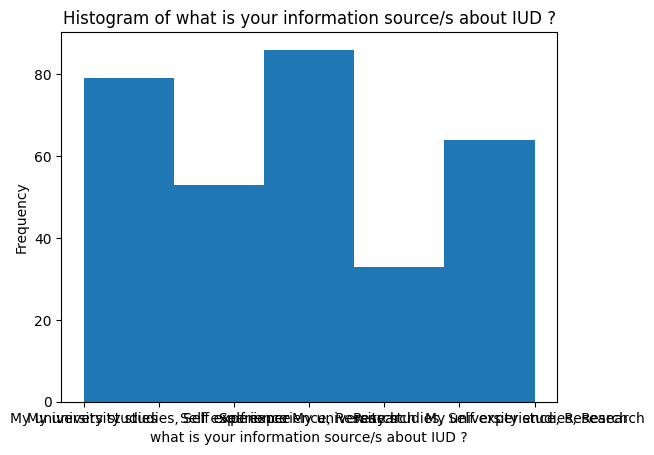

In [13]:
# Iterate over each column and plot a histogram
for column in df.columns:
    try:
        plt.figure()
        plt.hist(df[column], bins=5)
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.title(f'Histogram of {column}')
        plt.show()
    except Exception as e:
        print(f"Error plotting histogram for column '{column}': {e}")



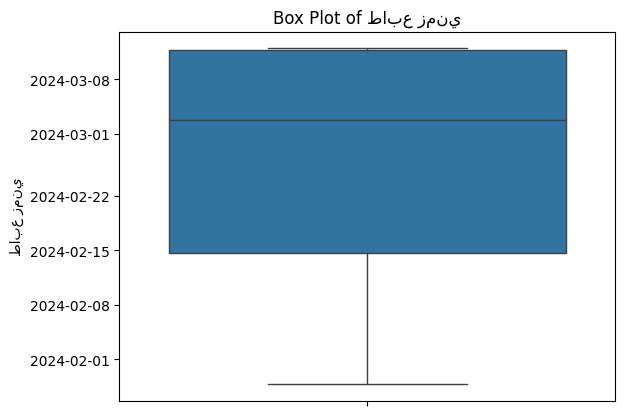

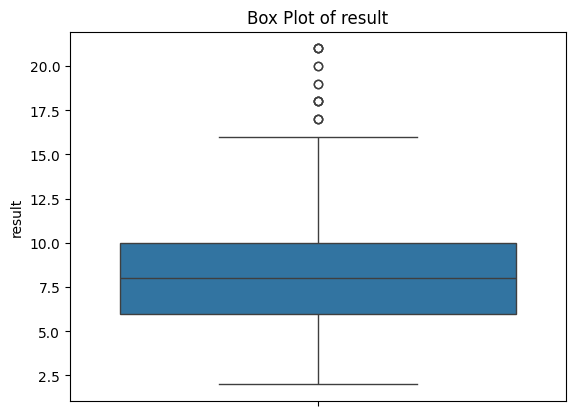

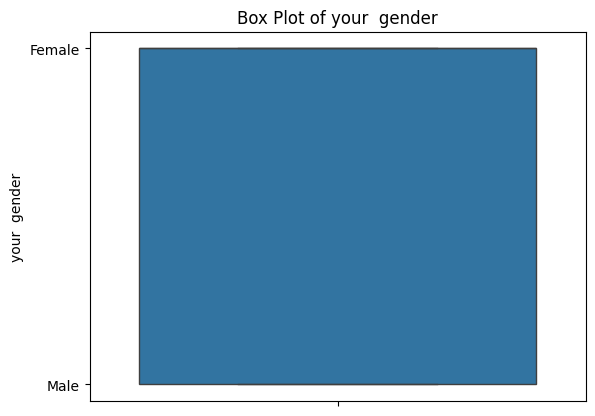

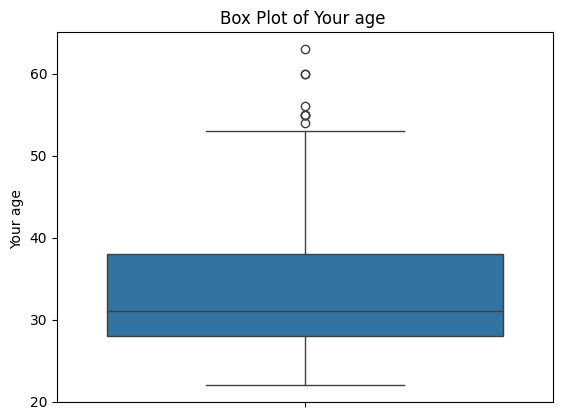

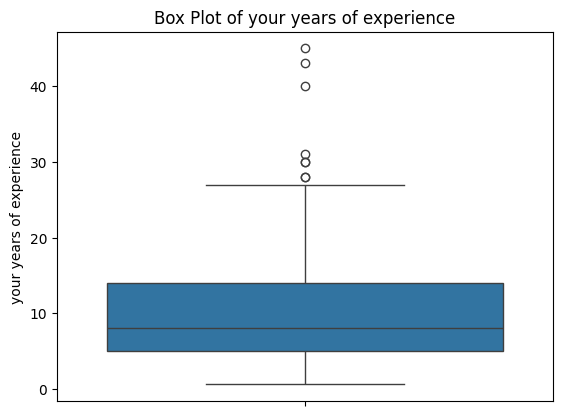

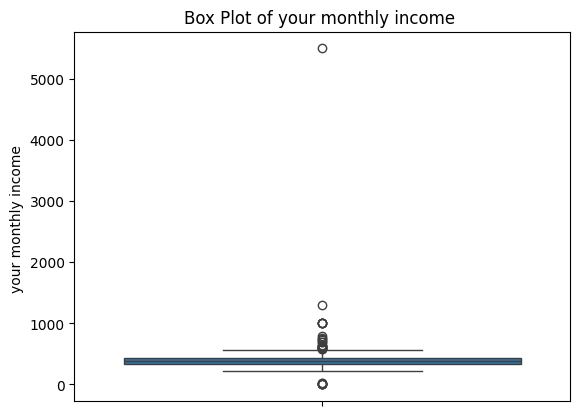

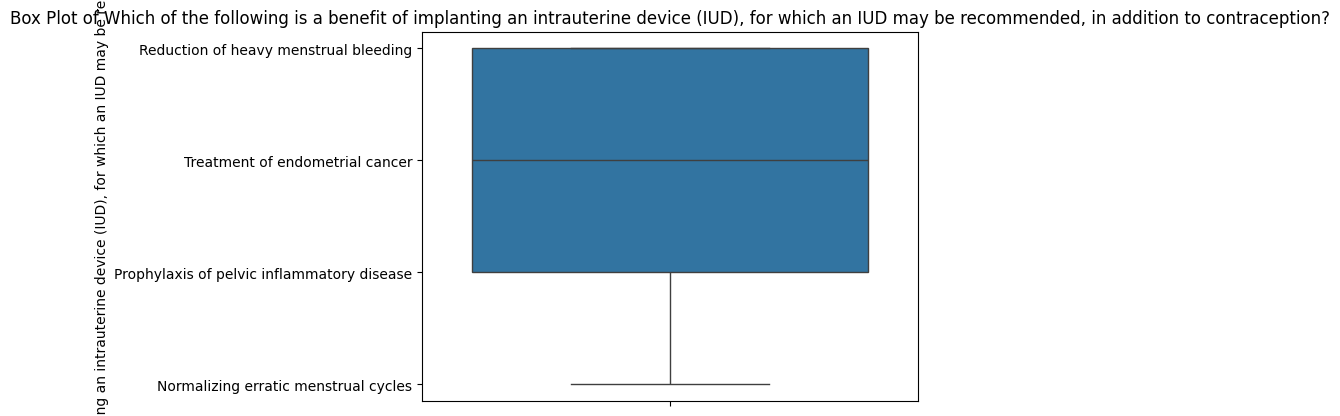

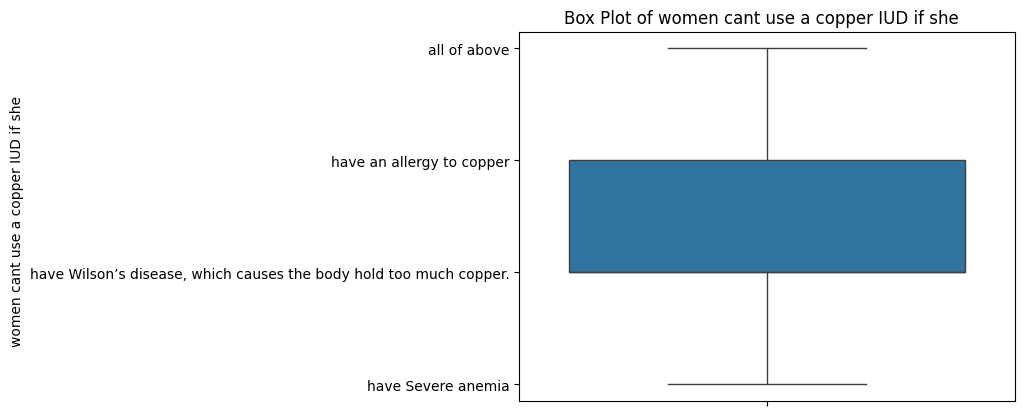

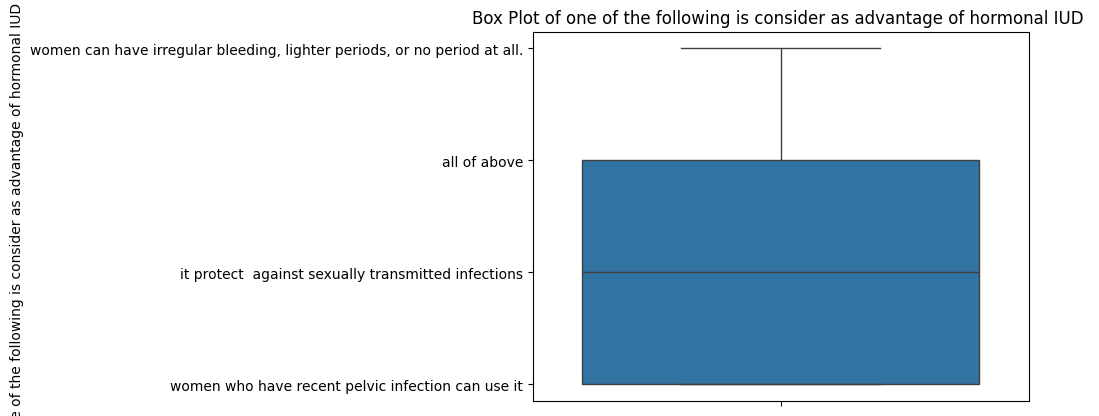

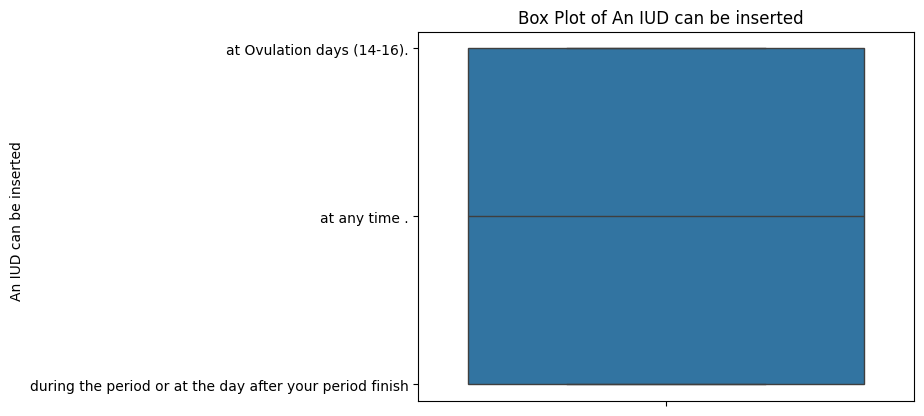

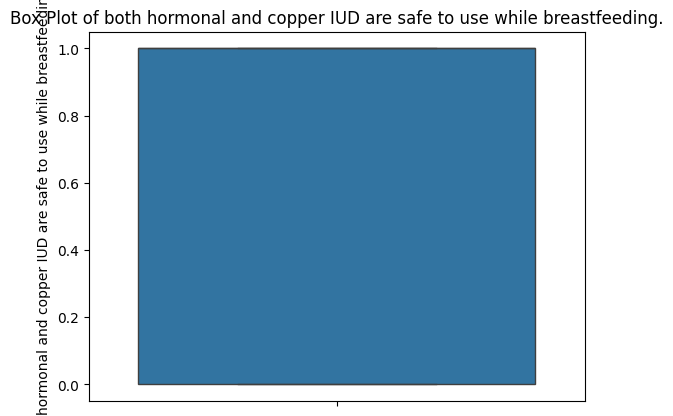

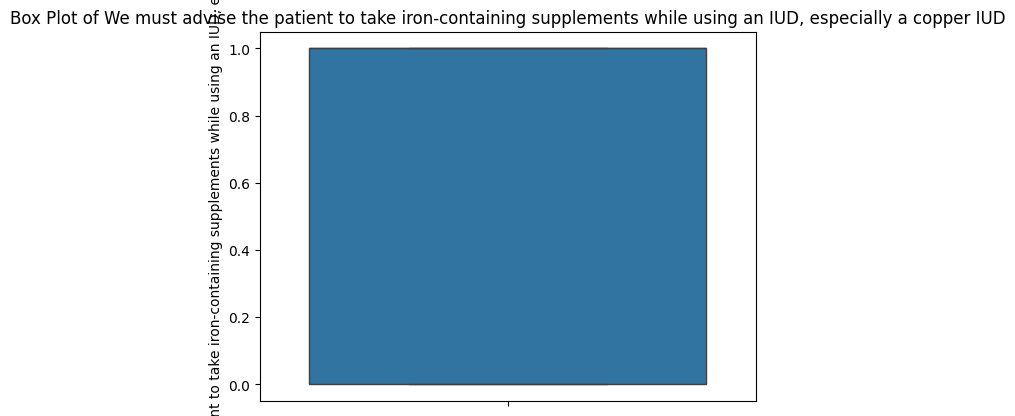

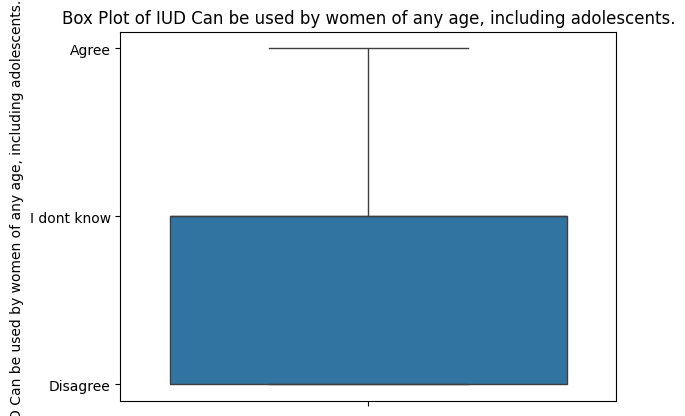

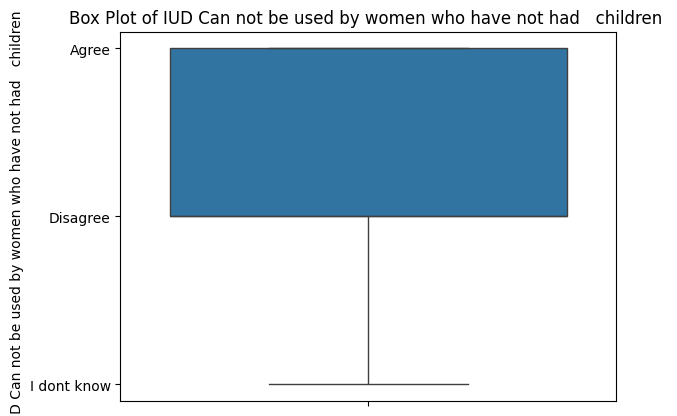

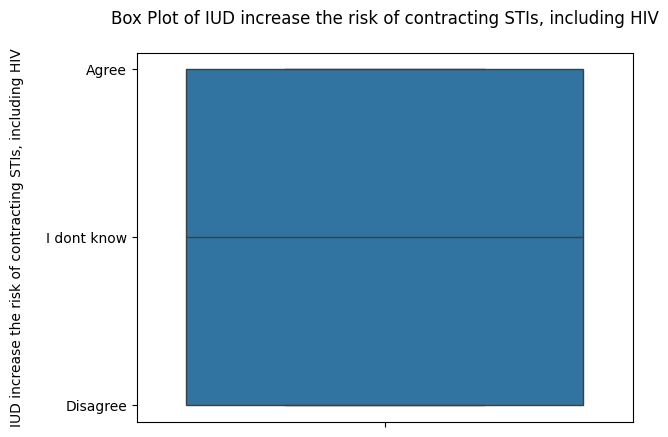

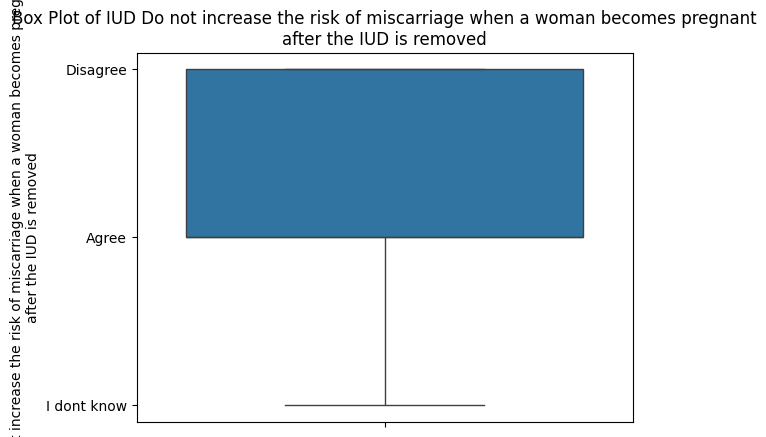

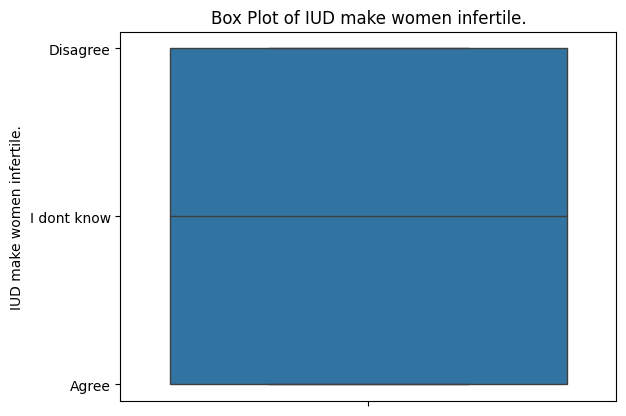

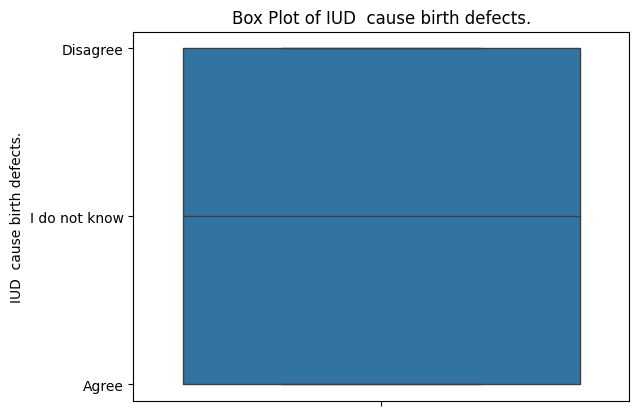

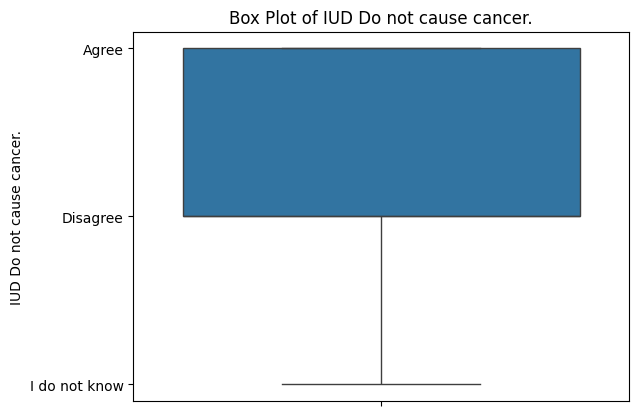

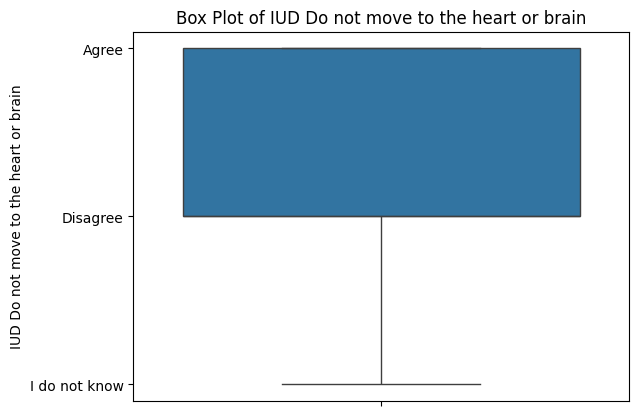

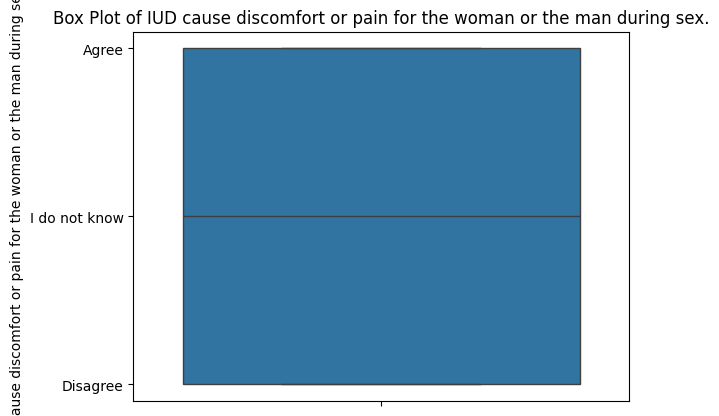

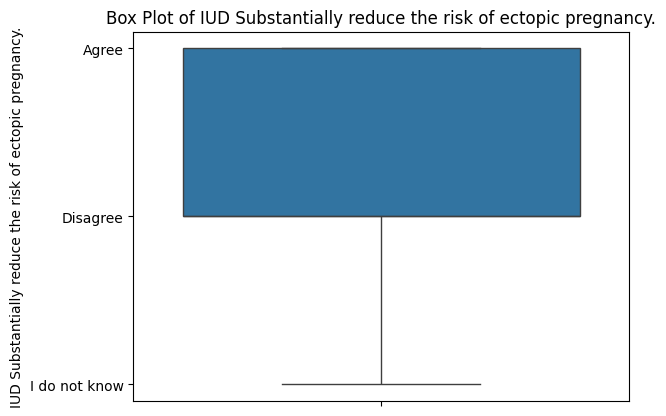

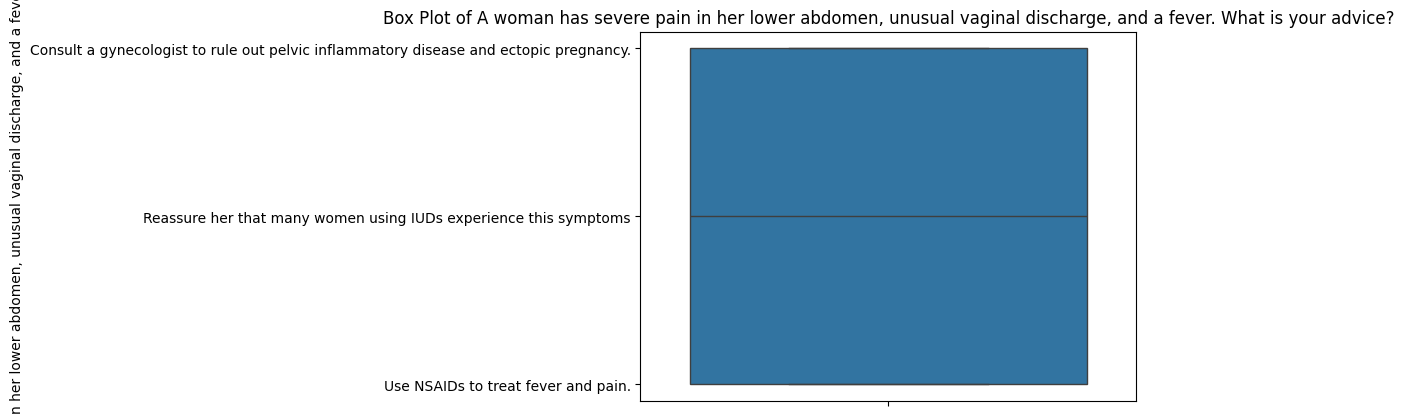

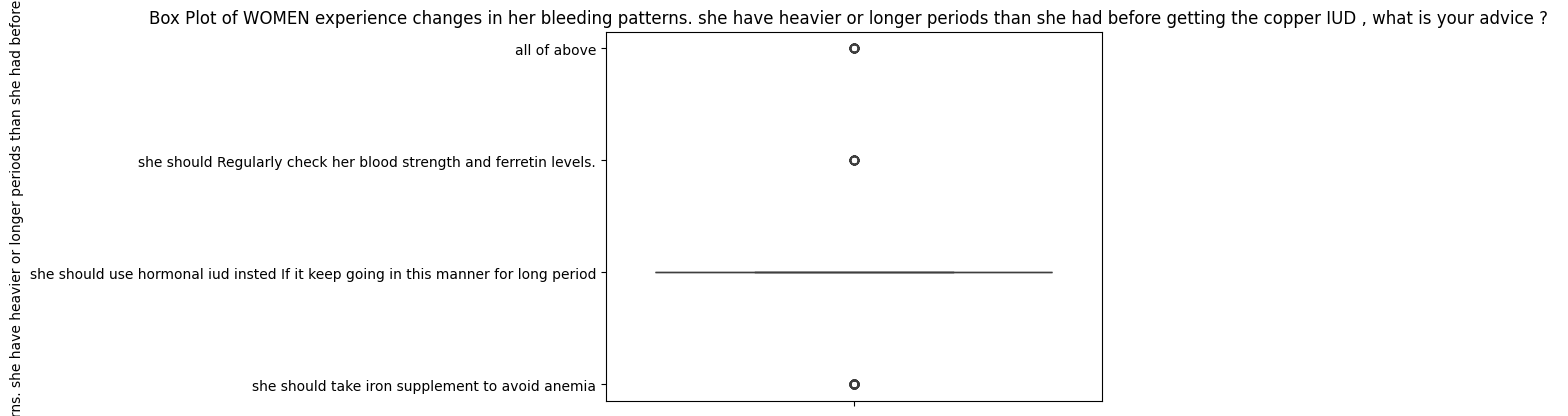

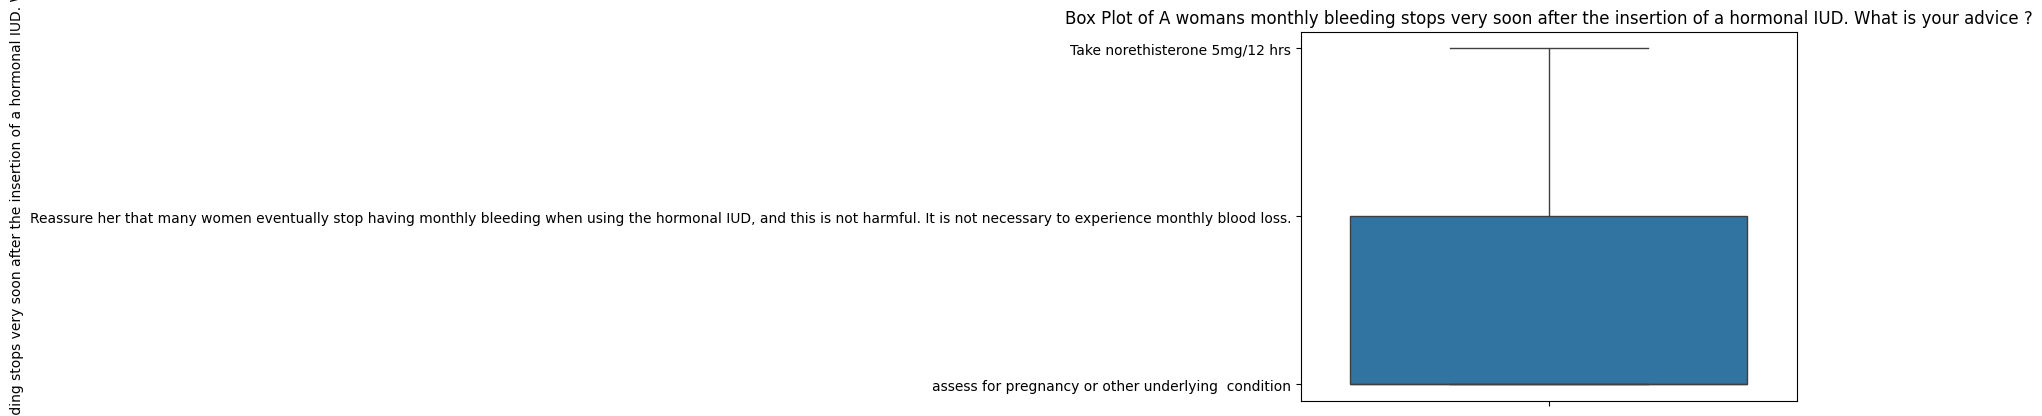

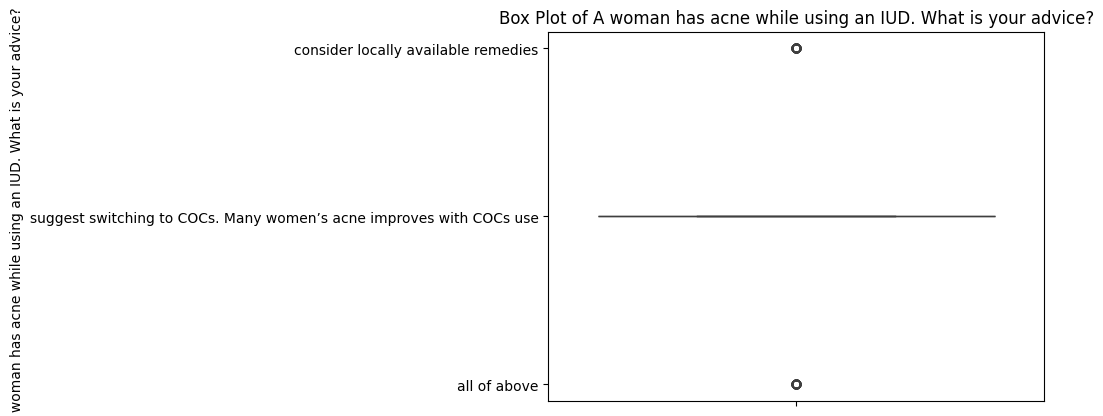

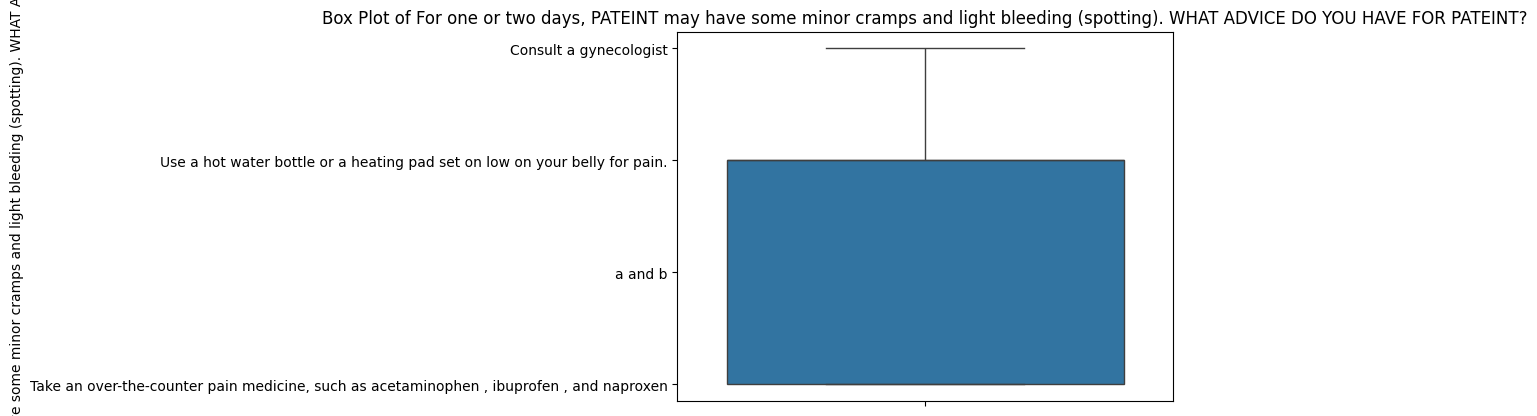

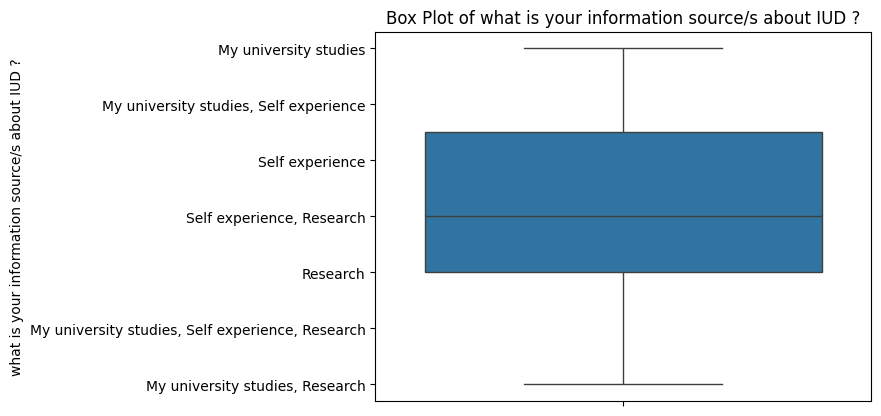

In [14]:
# Iterate over each column and plot a box plot
for column in df.columns:
    plt.figure()
    sns.boxplot(data=df[column])
    plt.title(f'Box Plot of {column}')
    plt.show()

In [15]:
# Drop non-numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Compute correlation matrix
correlation_matrix = numeric_df.corr()
print(correlation_matrix)

                                                      result  Your age   \
result                                              1.000000  -0.096594   
Your age                                           -0.096594   1.000000   
your years of experience                           -0.037580   0.849318   
your monthly income                                 0.030953   0.276482   
both hormonal and copper IUD are safe to use wh...  0.211815   0.094385   
We must advise the patient to take iron-contain...  0.286821  -0.063612   

                                                    your years of experience  \
result                                                             -0.037580   
Your age                                                            0.849318   
your years of experience                                            1.000000   
your monthly income                                                 0.084645   
both hormonal and copper IUD are safe to use wh...                  0.1158

In [16]:
print(dc_df.columns)


Index(['طابع زمني', 'result', 'Your age ', 'your years of experience',
       'your monthly income ', 'your  gender_Female', 'your  gender_Male',
       'Which of the following is a benefit of implanting an intrauterine device (IUD), for which an IUD may be recommended, in addition to contraception?_Normalizing erratic menstrual cycles',
       'Which of the following is a benefit of implanting an intrauterine device (IUD), for which an IUD may be recommended, in addition to contraception?_Prophylaxis of pelvic inflammatory disease',
       'Which of the following is a benefit of implanting an intrauterine device (IUD), for which an IUD may be recommended, in addition to contraception?_Reduction of heavy menstrual bleeding',
       'Which of the following is a benefit of implanting an intrauterine device (IUD), for which an IUD may be recommended, in addition to contraception?_Treatment of endometrial cancer',
       'women cant use a copper IUD if she  _all of above',
       'women ca

# The P value calulated for all questions and age column

In [17]:
columns_to_iterate = dc_df.columns[5:]
for column in columns_to_iterate:
    group1 = dc_df[dc_df[column]]['Your age ']
    group2 = dc_df[~dc_df[column]]['Your age ']
    t_statistic, p_value = stats.ttest_ind(group1, group2)
    print(f"\n{column},Age")
    print(f"\nT-statistic: {t_statistic}, p-value: {p_value}")



your  gender_Female,Age

T-statistic: -1.3488847798304557, p-value: 0.17834903641417177

your  gender_Male,Age

T-statistic: 1.3488847798304557, p-value: 0.17834903641417177

Which of the following is a benefit of implanting an intrauterine device (IUD), for which an IUD may be recommended, in addition to contraception?_Normalizing erratic menstrual cycles,Age

T-statistic: -0.6661880706596448, p-value: 0.5057815968836673

Which of the following is a benefit of implanting an intrauterine device (IUD), for which an IUD may be recommended, in addition to contraception?_Prophylaxis of pelvic inflammatory disease,Age

T-statistic: 0.8676213743814812, p-value: 0.38626632765145796

Which of the following is a benefit of implanting an intrauterine device (IUD), for which an IUD may be recommended, in addition to contraception?_Reduction of heavy menstrual bleeding,Age

T-statistic: 0.9591571736395221, p-value: 0.3382198819376684

Which of the following is a benefit of implanting an intrauter

# The P value calulated for all questions and Years of Experience column

In [18]:
columns_to_iterate = dc_df.columns[5:]
for column in columns_to_iterate:
    group1 = dc_df[dc_df[column]]['your years of experience']
    group2 = dc_df[~dc_df[column]]['your years of experience']
    t_statistic, p_value = stats.ttest_ind(group1, group2)
    print(f"\n{column},years of experience")
    print(f"\nT-statistic: {t_statistic}, p-value: {p_value}")


your  gender_Female,years of experience

T-statistic: -1.1890684060527852, p-value: 0.23531403945875737

your  gender_Male,years of experience

T-statistic: 1.1890684060527852, p-value: 0.23531403945875737

Which of the following is a benefit of implanting an intrauterine device (IUD), for which an IUD may be recommended, in addition to contraception?_Normalizing erratic menstrual cycles,years of experience

T-statistic: -1.2619219267997726, p-value: 0.20791641440027137

Which of the following is a benefit of implanting an intrauterine device (IUD), for which an IUD may be recommended, in addition to contraception?_Prophylaxis of pelvic inflammatory disease,years of experience

T-statistic: 1.6450448153160961, p-value: 0.10096442059399377

Which of the following is a benefit of implanting an intrauterine device (IUD), for which an IUD may be recommended, in addition to contraception?_Reduction of heavy menstrual bleeding,years of experience

T-statistic: 0.607489859647711, p-value: 0.

In [19]:
columns_to_iterate = dc_df.columns[5:]
for column in columns_to_iterate:
    group1 = dc_df[dc_df[column]]['result']
    group2 = dc_df[~dc_df[column]]['result']
    t_statistic, p_value = stats.ttest_ind(group1, group2)
    print(f"\n{column},results")
    print(f"\nT-statistic: {t_statistic}, p-value: {p_value}")


your  gender_Female,results

T-statistic: -0.2487606551101402, p-value: 0.803709072224414

your  gender_Male,results

T-statistic: 0.2487606551101402, p-value: 0.803709072224414

Which of the following is a benefit of implanting an intrauterine device (IUD), for which an IUD may be recommended, in addition to contraception?_Normalizing erratic menstrual cycles,results

T-statistic: -1.1059461183076433, p-value: 0.26959915638226195

Which of the following is a benefit of implanting an intrauterine device (IUD), for which an IUD may be recommended, in addition to contraception?_Prophylaxis of pelvic inflammatory disease,results

T-statistic: -2.1641930627802948, p-value: 0.031205491560566085

Which of the following is a benefit of implanting an intrauterine device (IUD), for which an IUD may be recommended, in addition to contraception?_Reduction of heavy menstrual bleeding,results

T-statistic: 4.416359146651675, p-value: 1.3843243905734676e-05

Which of the following is a benefit of i

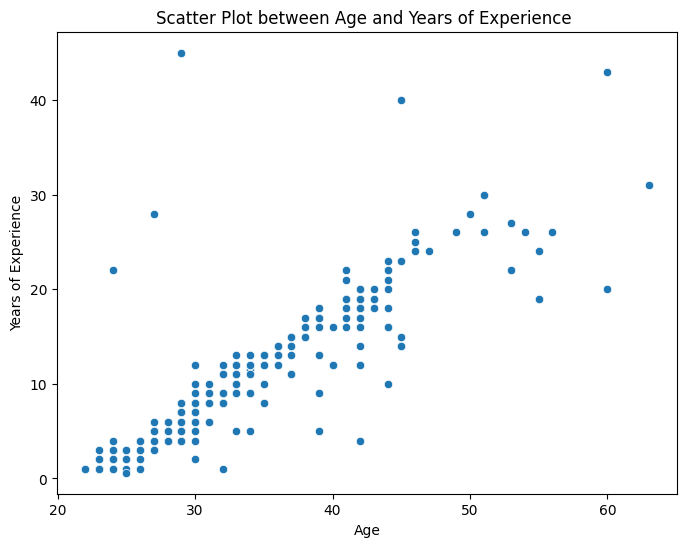

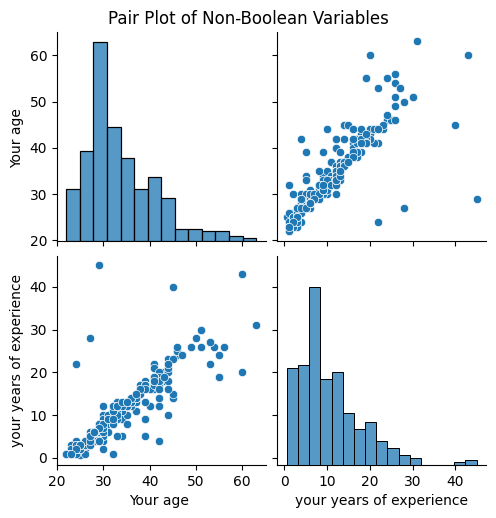

In [20]:


# Assuming df is your DataFrame containing non-boolean variables

# Scatter plot between two non-boolean variables
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Your age ', y='your years of experience')
plt.title('Scatter Plot between Age and Years of Experience ')
plt.xlabel('Age')
plt.ylabel('Years of Experience')
plt.show()

# Pair plot to visualize relationships between all pairs of non-boolean variables
sns.pairplot(df[[ 'Your age ', 'your years of experience']])
plt.suptitle('Pair Plot of Non-Boolean Variables', y=1.02)
plt.show()


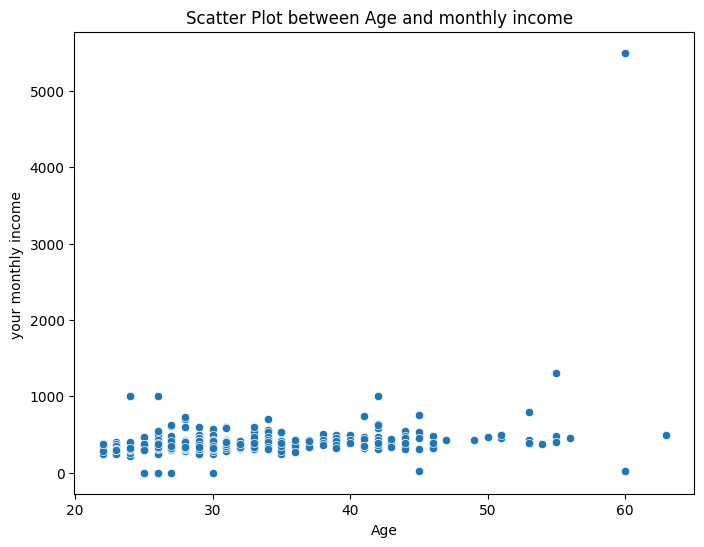

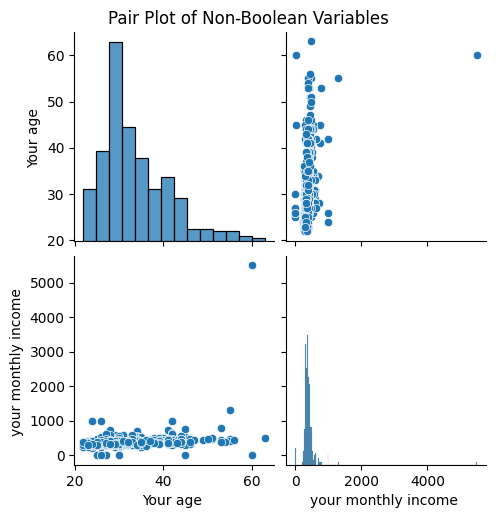

In [21]:


# Assuming df is your DataFrame containing non-boolean variables

# Scatter plot between two non-boolean variables
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Your age ', y='your monthly income ')
plt.title('Scatter Plot between Age and monthly income  ')
plt.xlabel('Age')
plt.ylabel('your monthly income ')
plt.show()

# Pair plot to visualize relationships between all pairs of non-boolean variables
sns.pairplot(df[[ 'Your age ', 'your monthly income ']])
plt.suptitle('Pair Plot of Non-Boolean Variables', y=1.02)
plt.show()


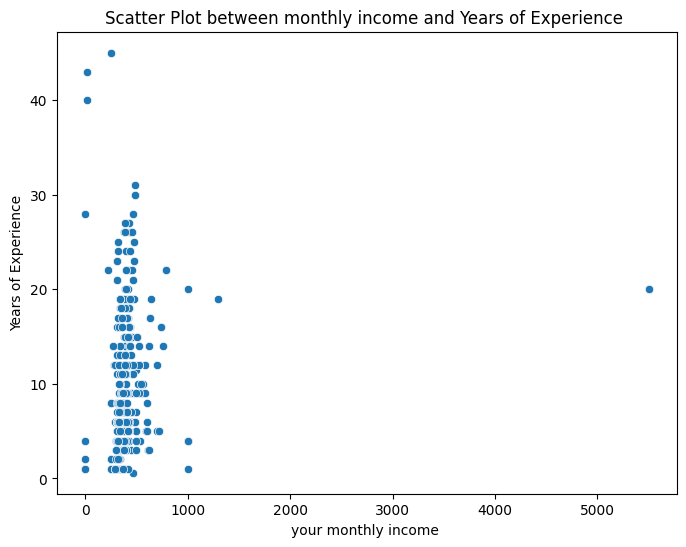

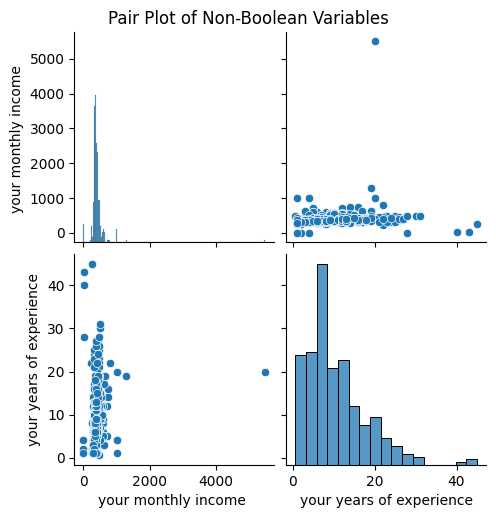

In [22]:


# Assuming df is your DataFrame containing non-boolean variables

# Scatter plot between two non-boolean variables
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='your monthly income ', y='your years of experience')
plt.title('Scatter Plot between monthly income and Years of Experience ')
plt.xlabel('your monthly income ')
plt.ylabel('Years of Experience')
plt.show()

# Pair plot to visualize relationships between all pairs of non-boolean variables
sns.pairplot(df[[ 'your monthly income ', 'your years of experience']])
plt.suptitle('Pair Plot of Non-Boolean Variables', y=1.02)
plt.show()


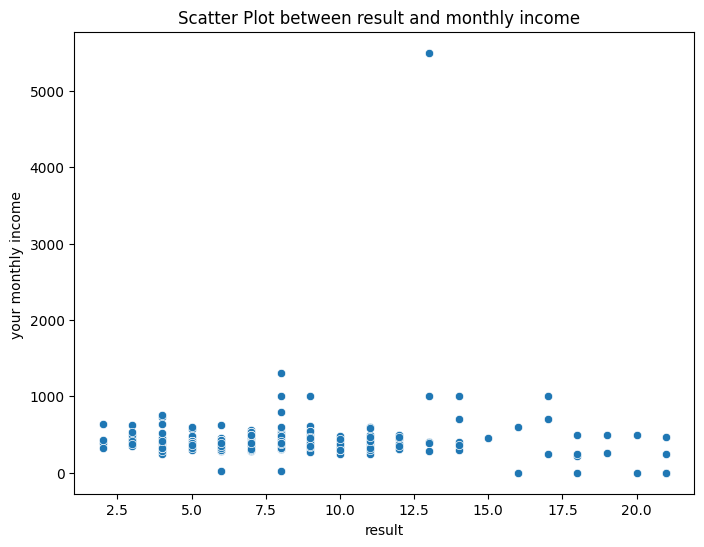

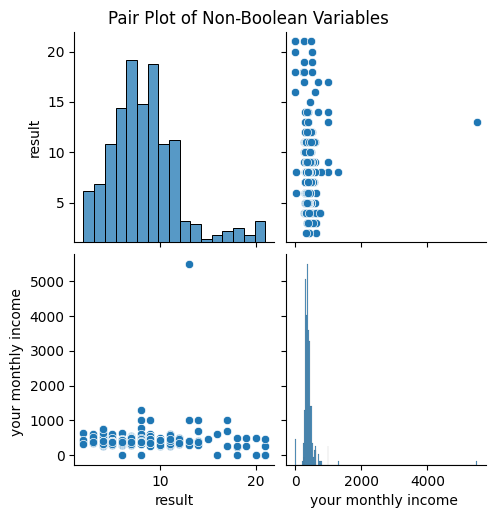

In [23]:


# Assuming df is your DataFrame containing non-boolean variables

# Scatter plot between two non-boolean variables
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='result', y='your monthly income ')
plt.title('Scatter Plot between result and monthly income  ')
plt.xlabel('result')
plt.ylabel('your monthly income ')
plt.show()

# Pair plot to visualize relationships between all pairs of non-boolean variables
sns.pairplot(df[[ 'result', 'your monthly income ']])
plt.suptitle('Pair Plot of Non-Boolean Variables', y=1.02)
plt.show()


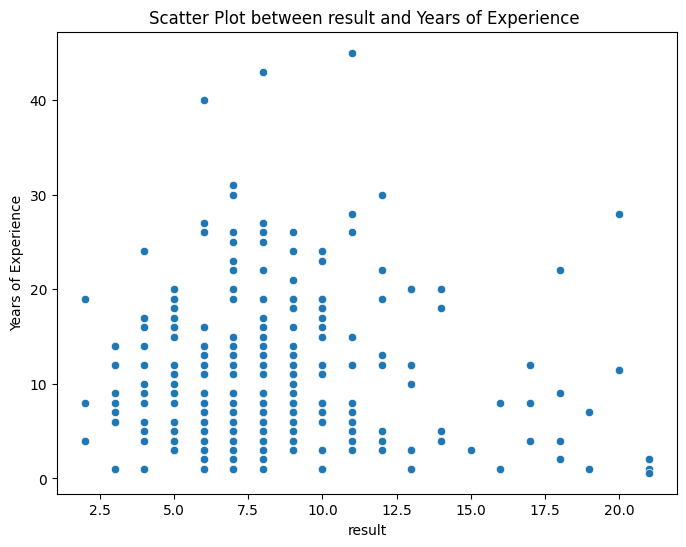

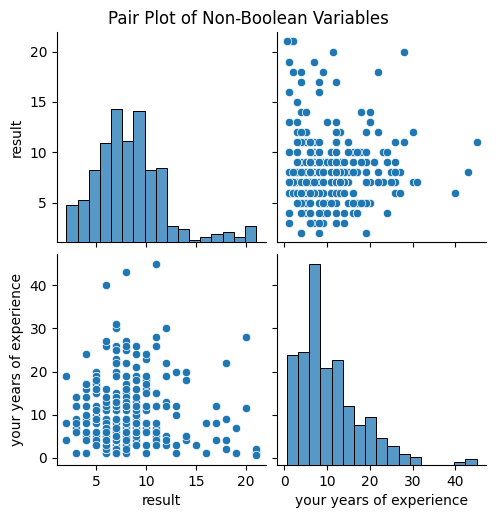

In [24]:


# Assuming df is your DataFrame containing non-boolean variables

# Scatter plot between two non-boolean variables
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='result', y='your years of experience')
plt.title('Scatter Plot between result and Years of Experience ')
plt.xlabel('result')
plt.ylabel('Years of Experience')
plt.show()

# Pair plot to visualize relationships between all pairs of non-boolean variables
sns.pairplot(df[[ 'result', 'your years of experience']])
plt.suptitle('Pair Plot of Non-Boolean Variables', y=1.02)
plt.show()


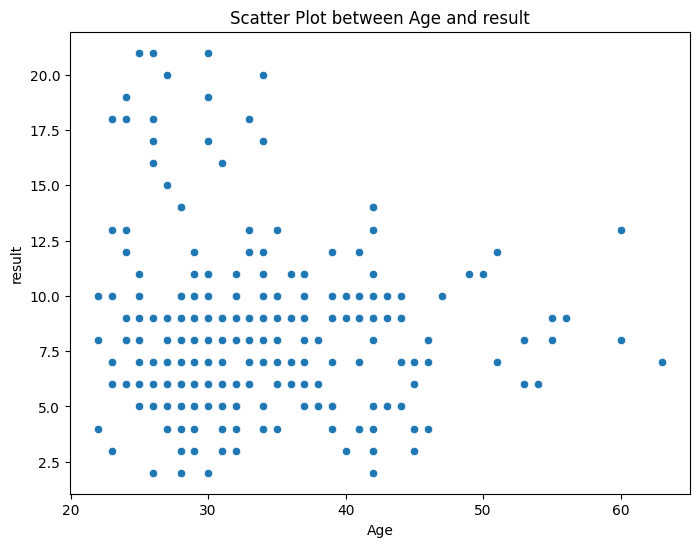

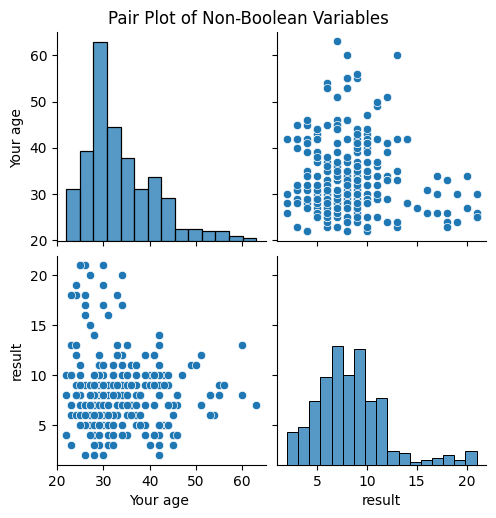

In [25]:


# Assuming df is your DataFrame containing non-boolean variables

# Scatter plot between two non-boolean variables
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Your age ', y='result')
plt.title('Scatter Plot between Age and result')
plt.xlabel('Age')
plt.ylabel('result')
plt.show()

# Pair plot to visualize relationships between all pairs of non-boolean variables
sns.pairplot(df[[ 'Your age ', 'result']])
plt.suptitle('Pair Plot of Non-Boolean Variables', y=1.02)
plt.show()


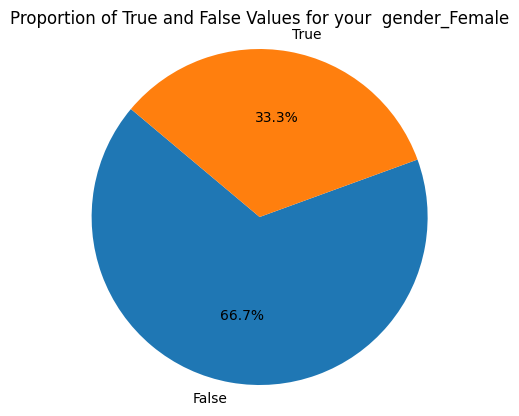

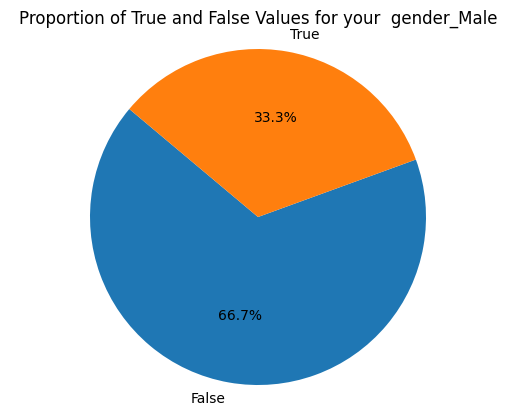

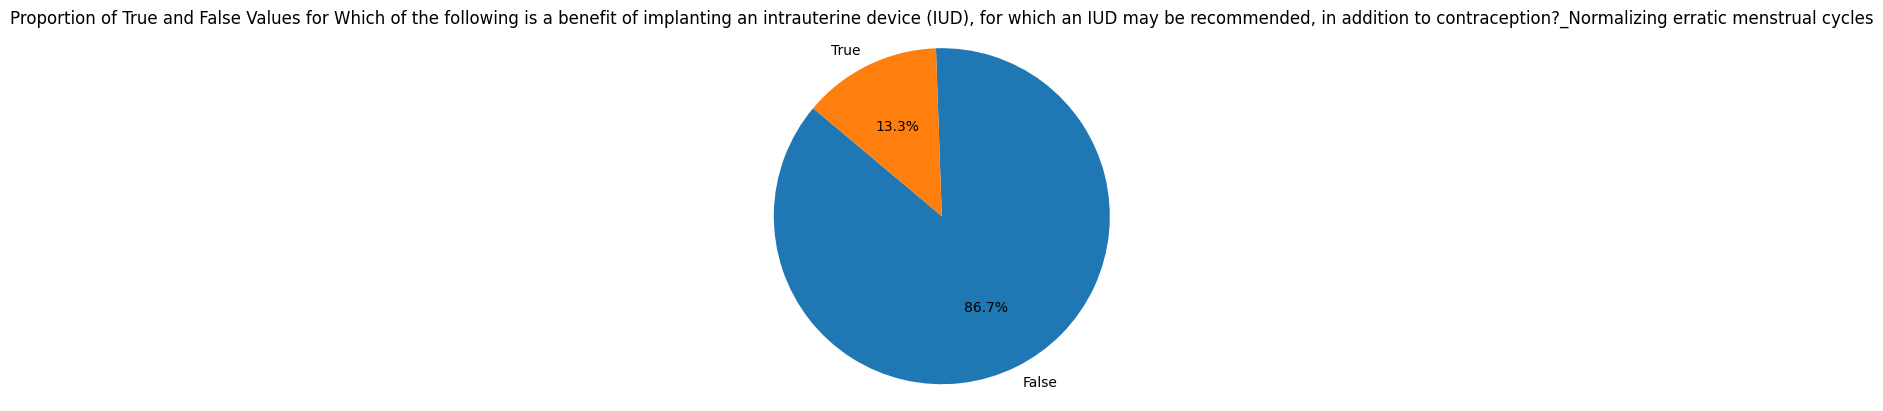

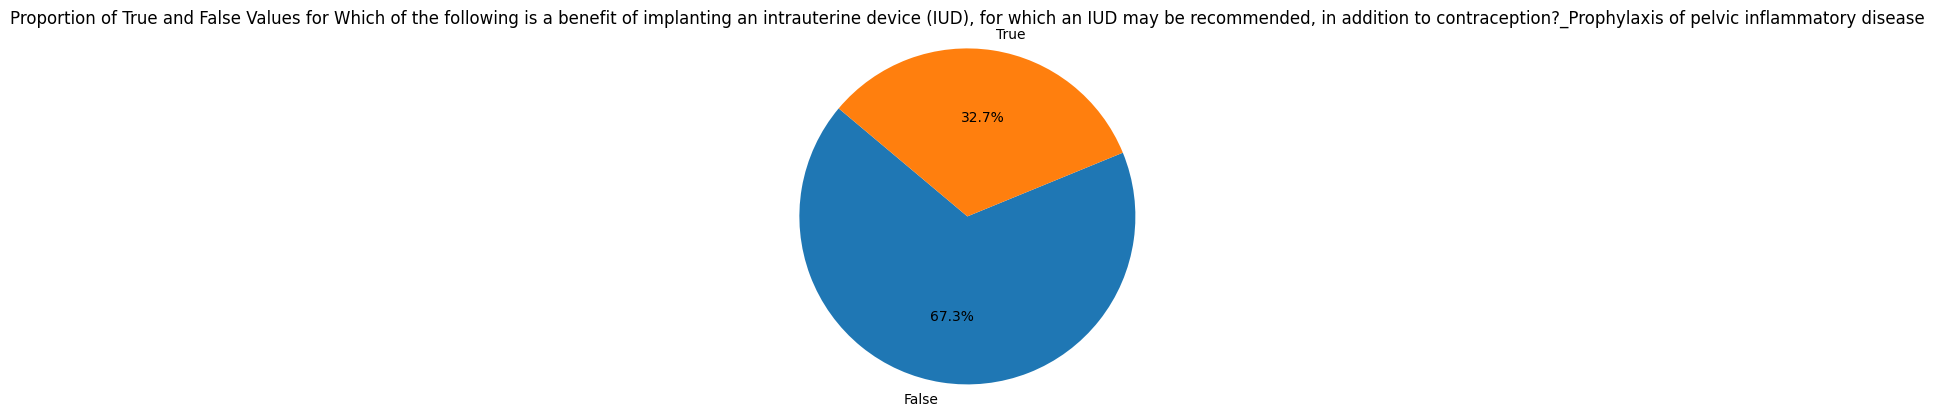

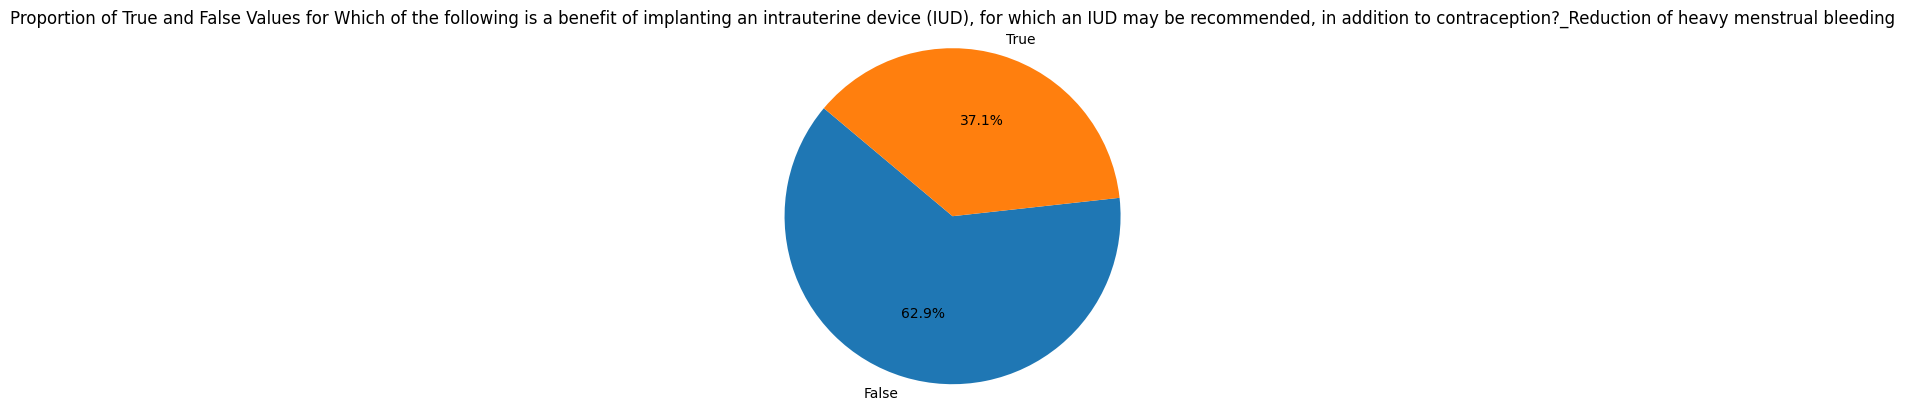

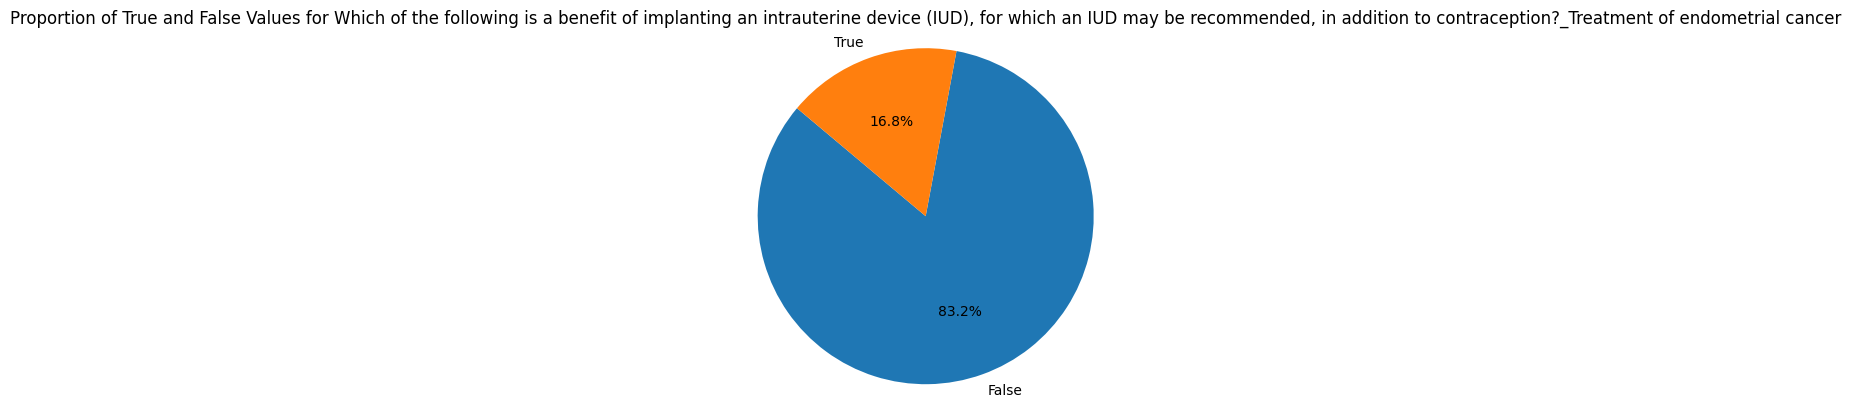

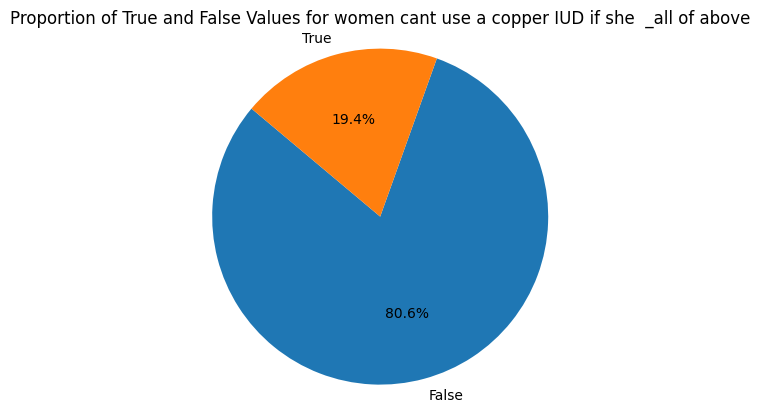

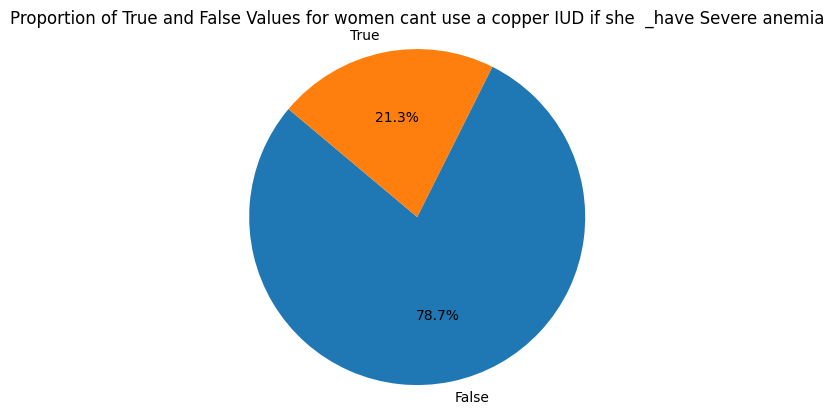

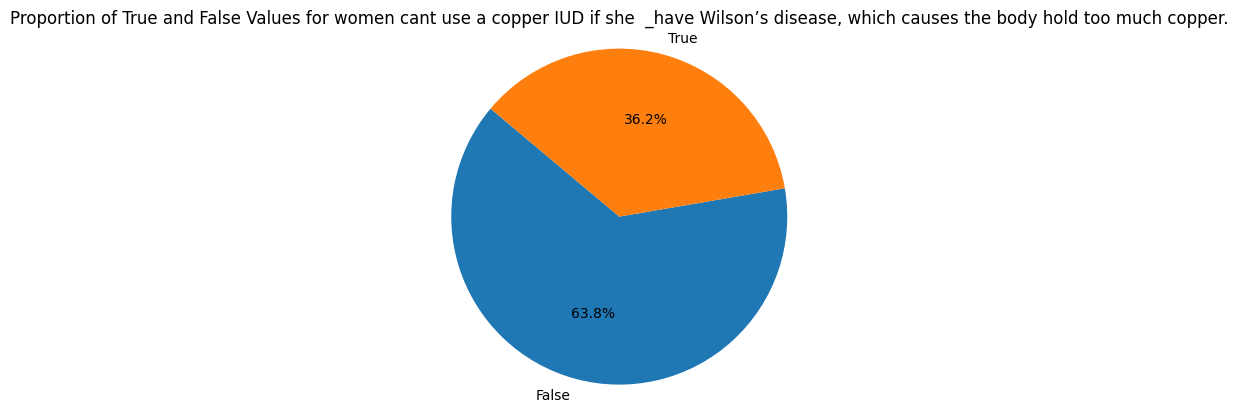

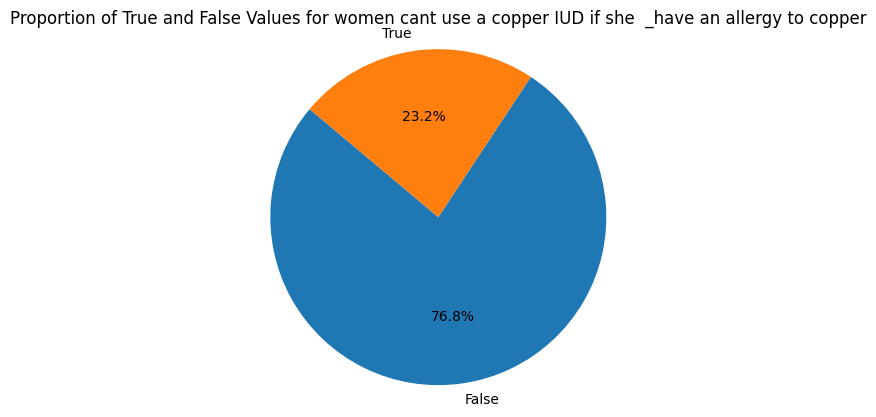

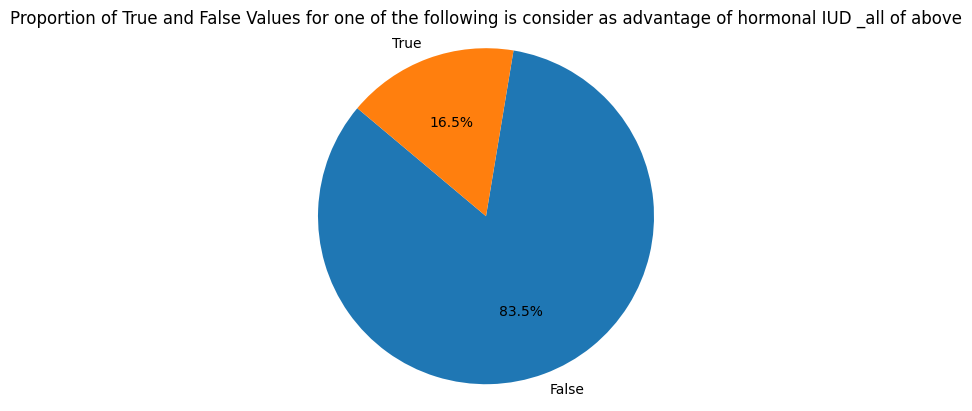

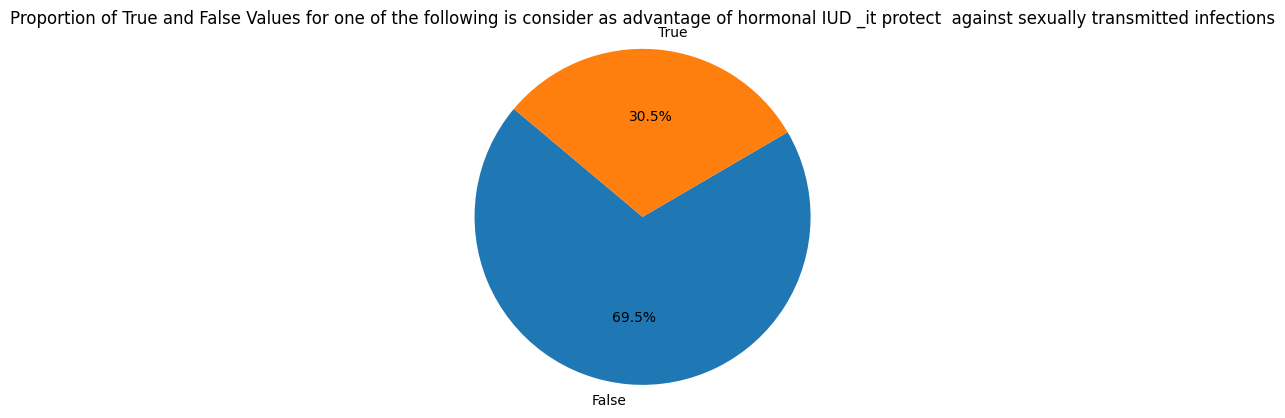

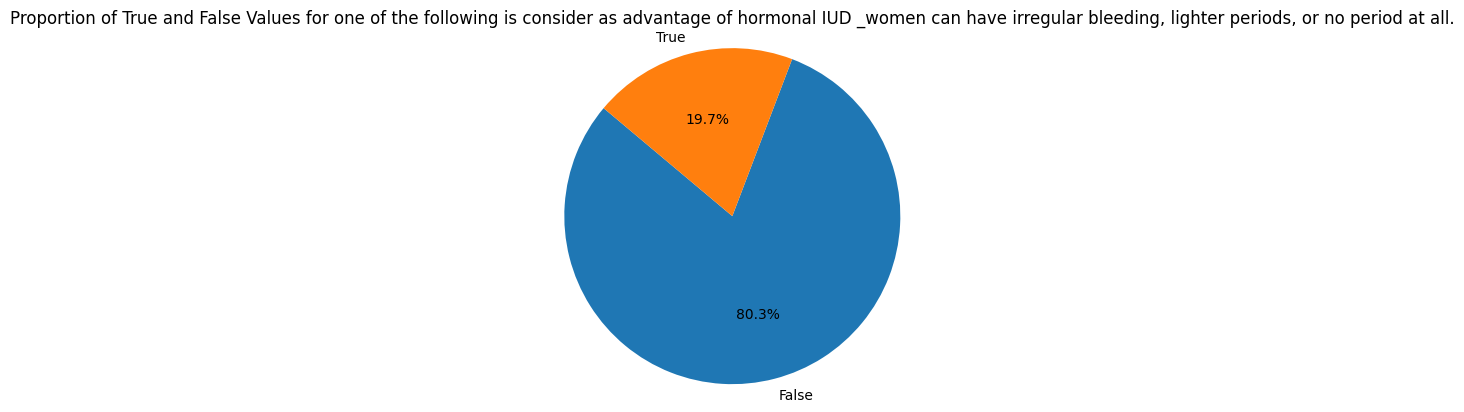

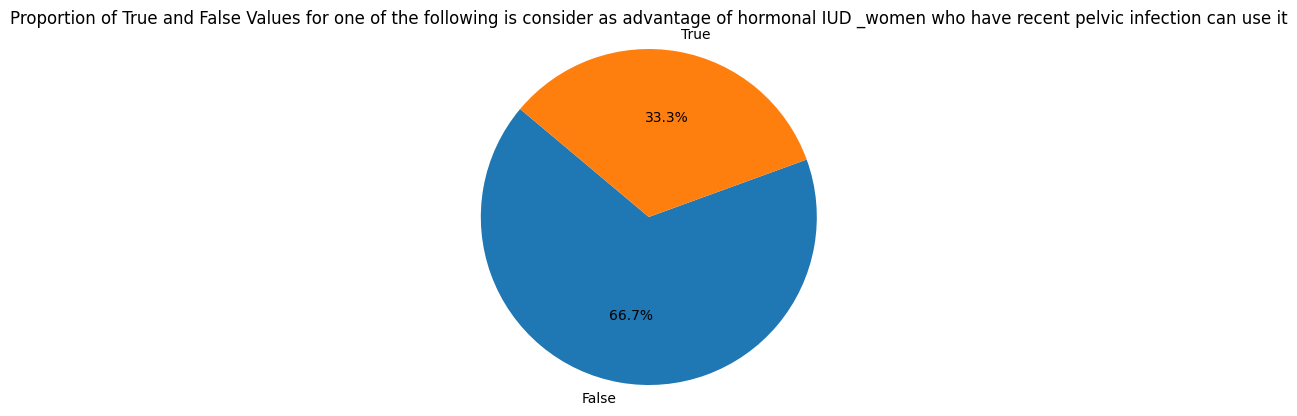

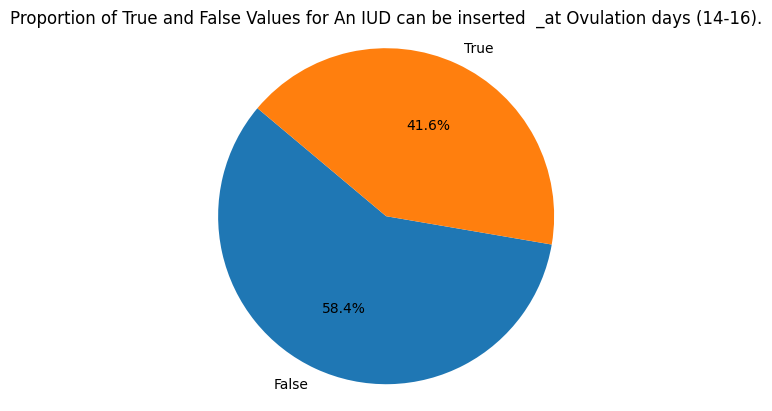

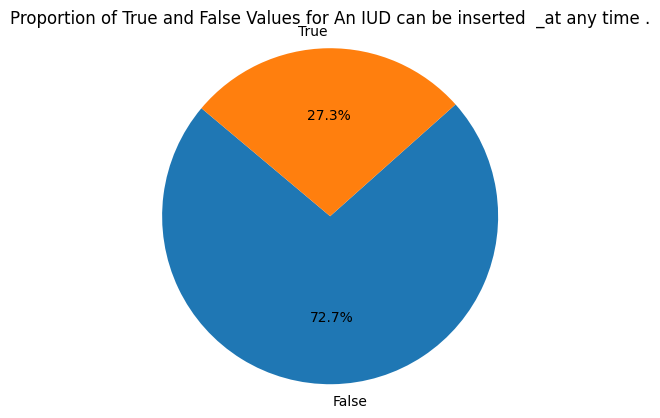

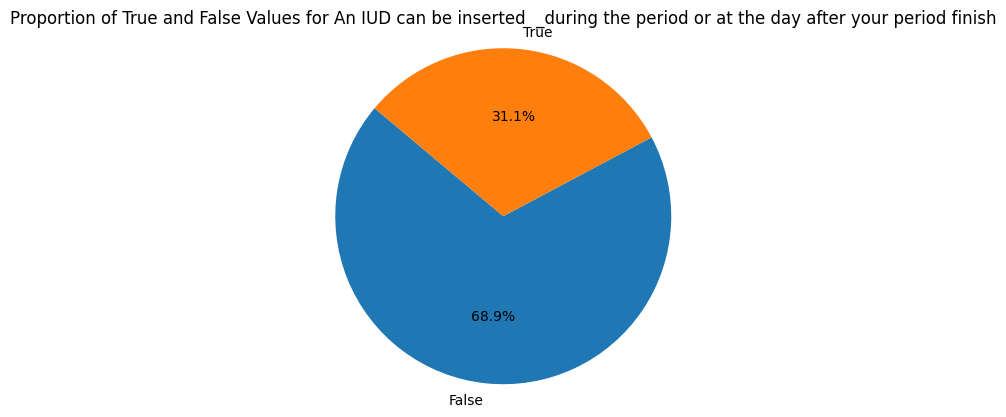

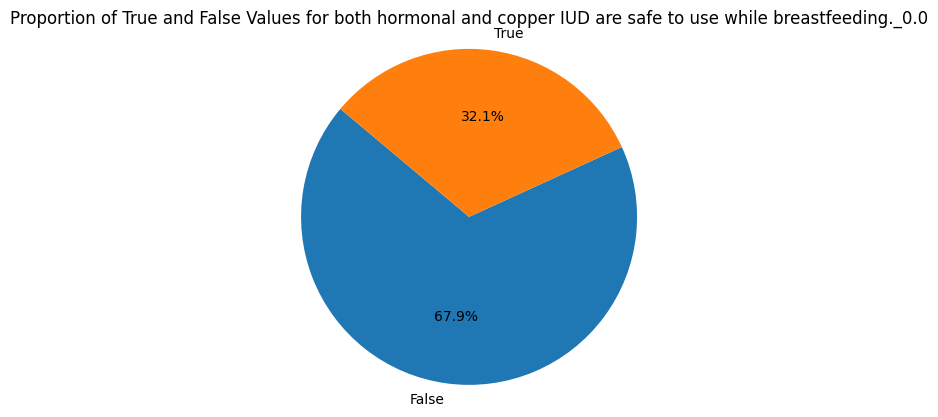

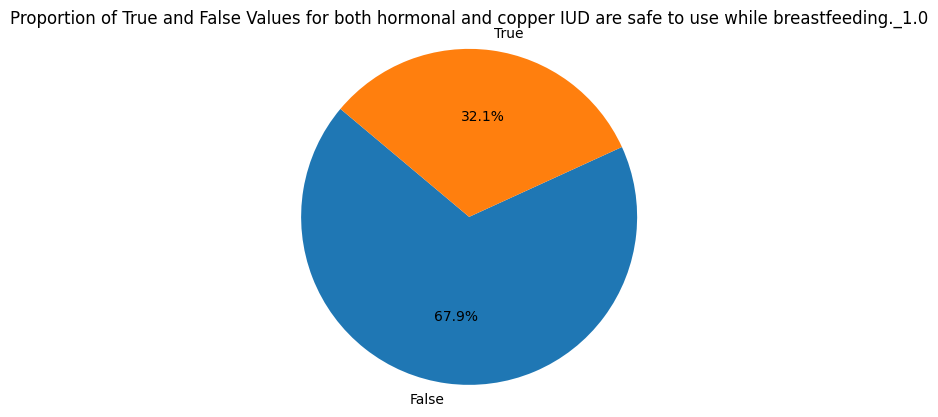

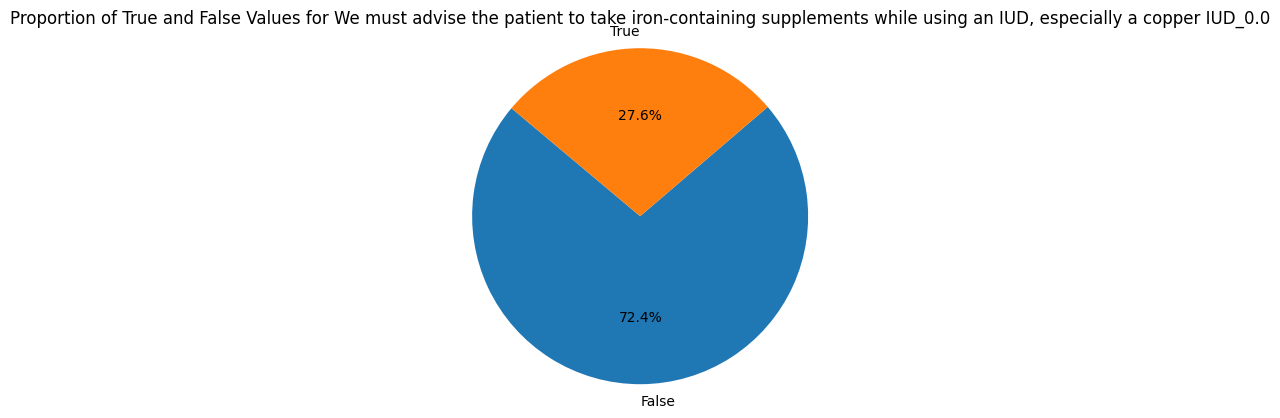

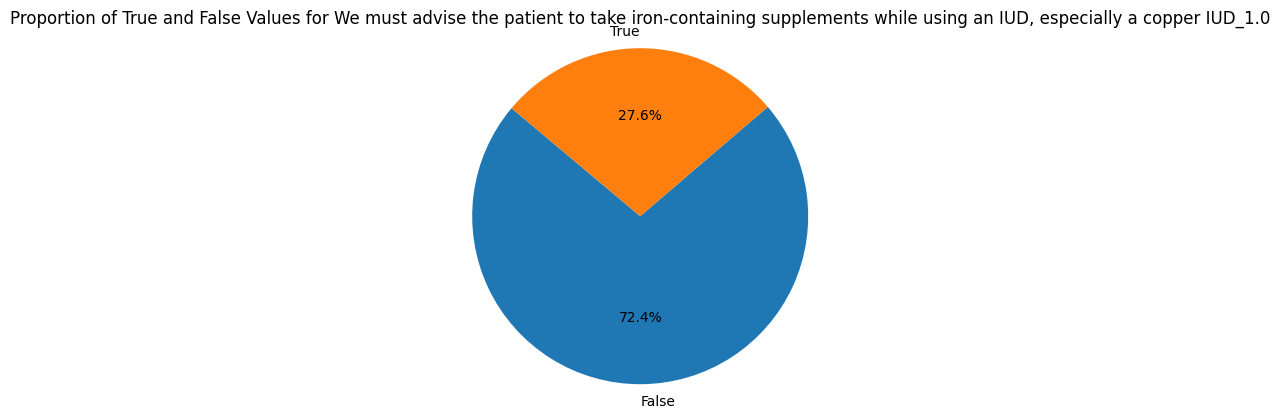

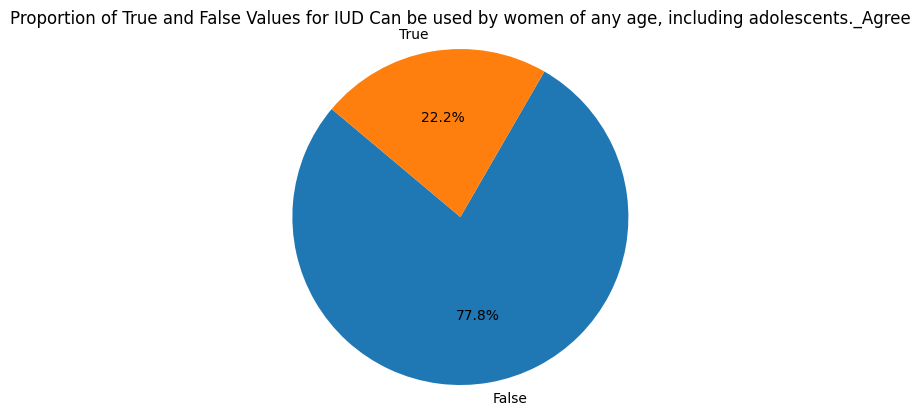

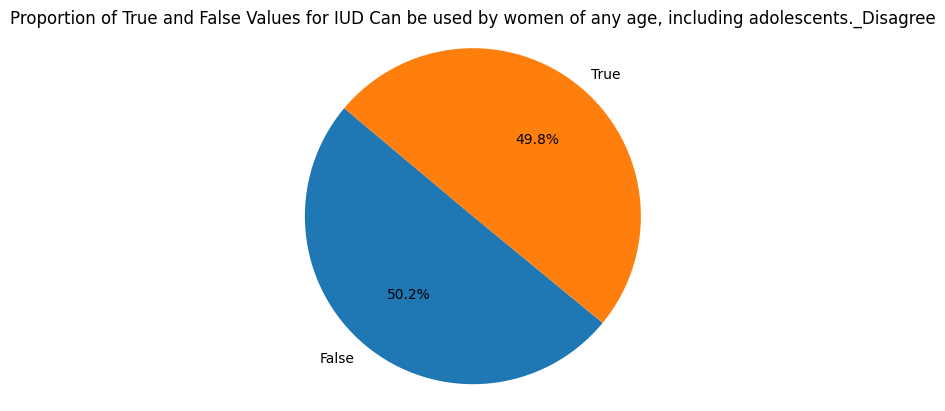

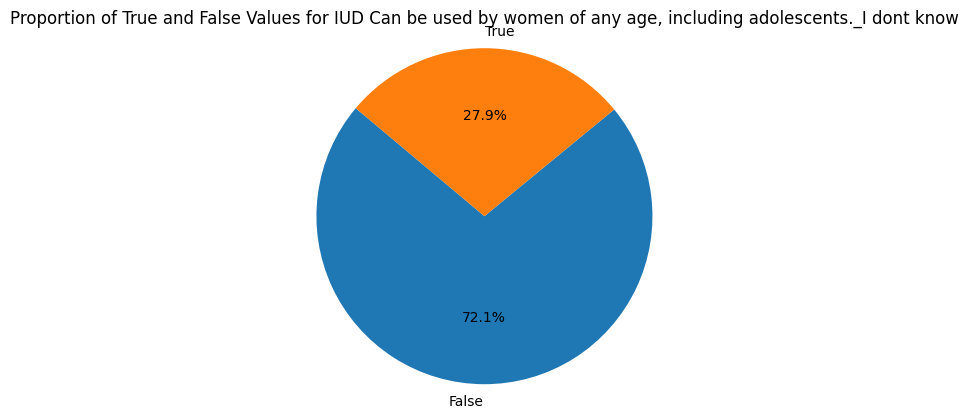

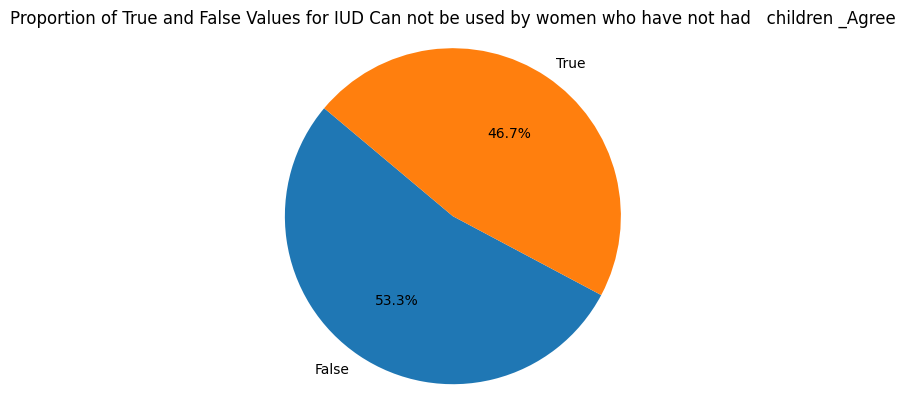

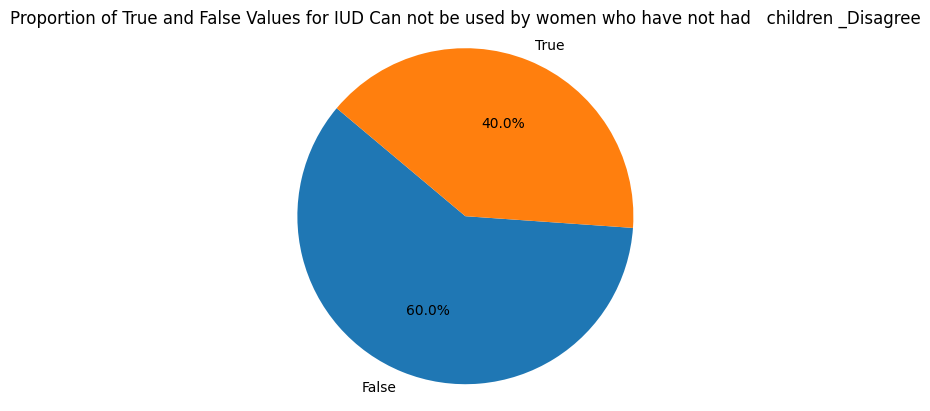

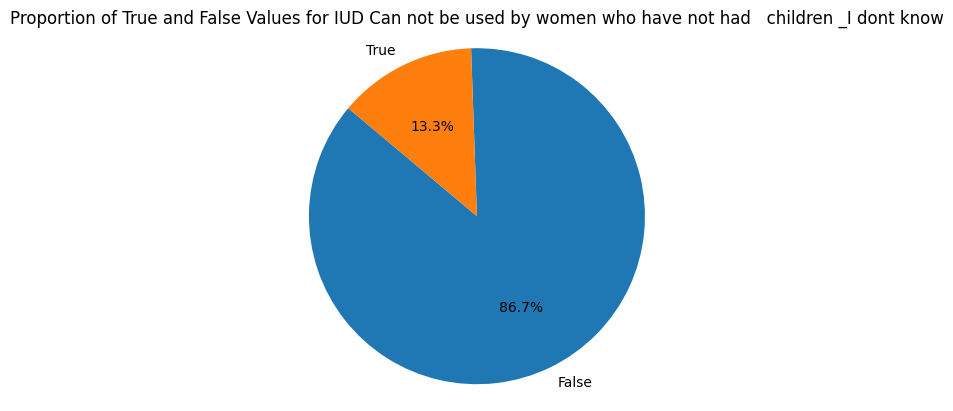

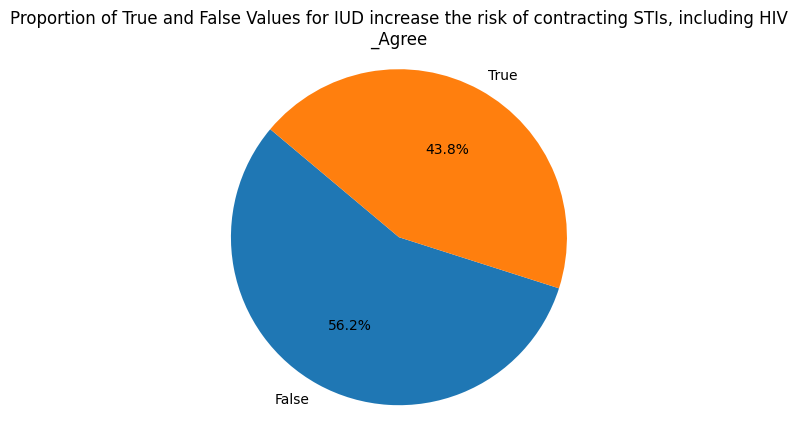

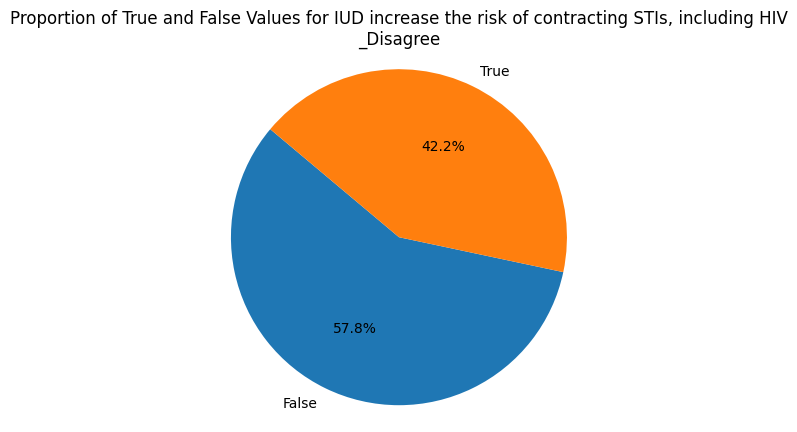

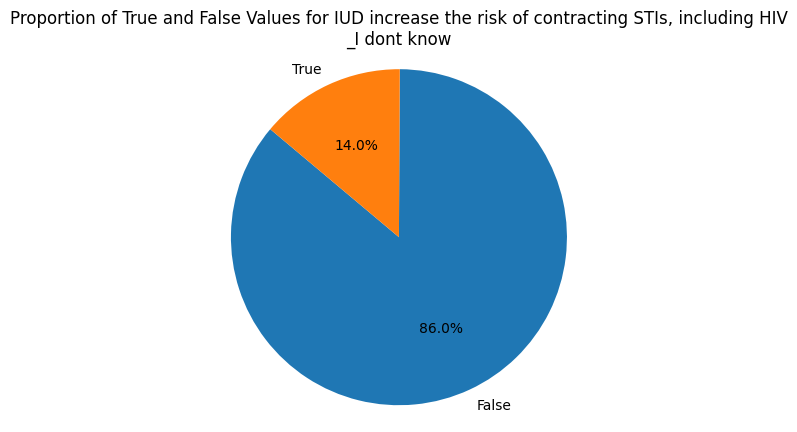

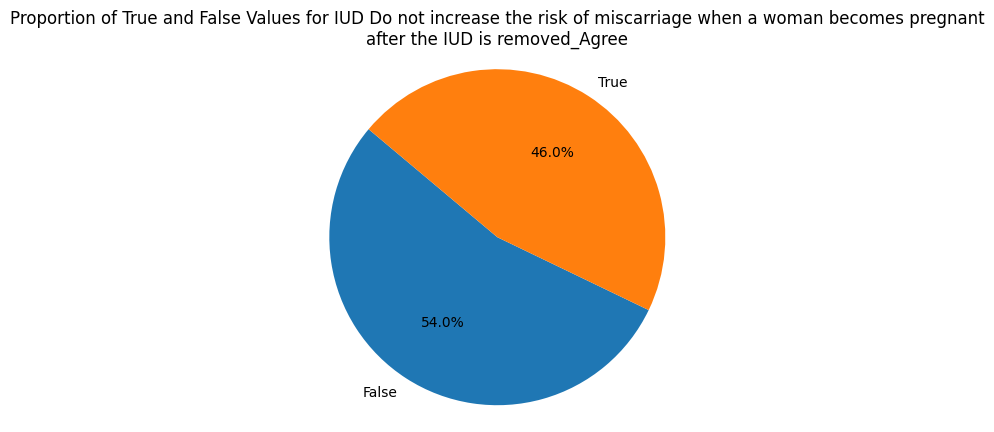

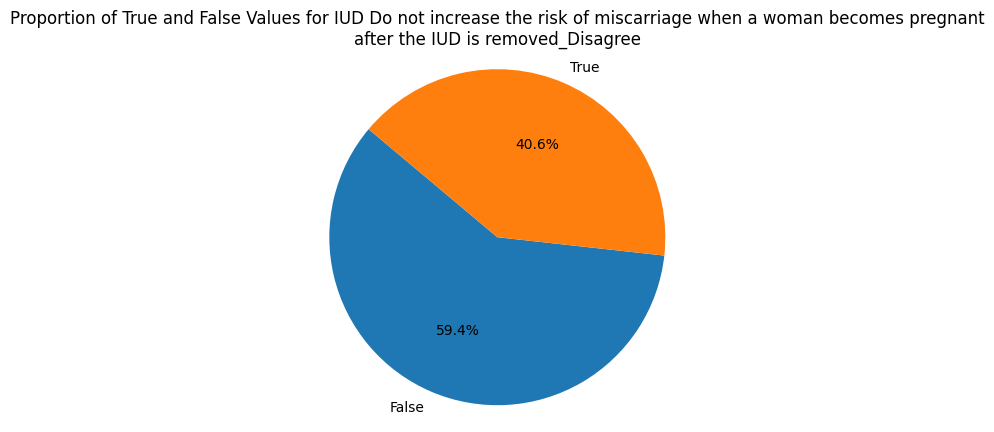

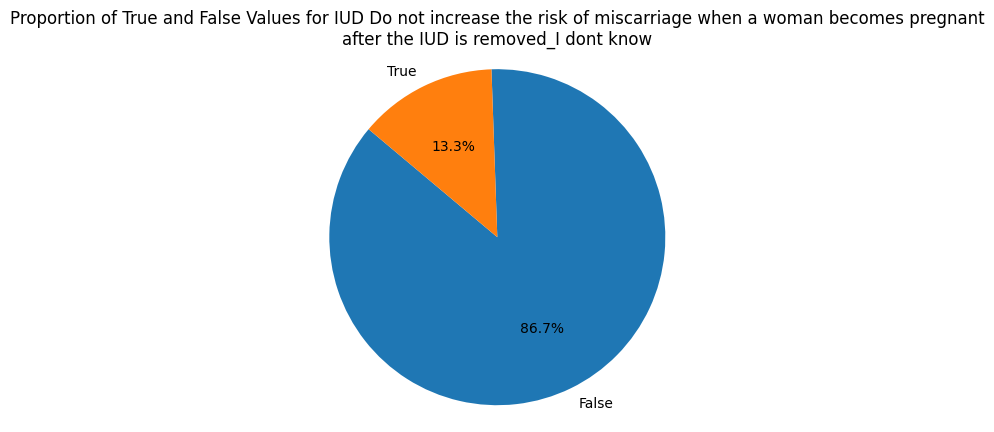

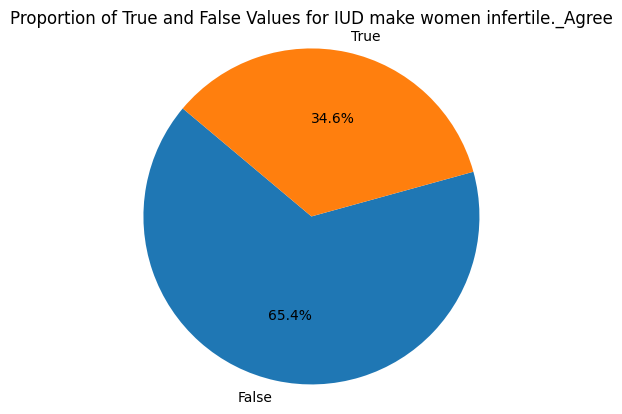

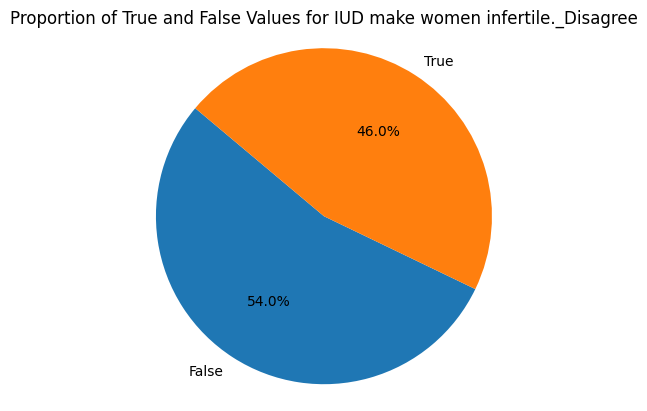

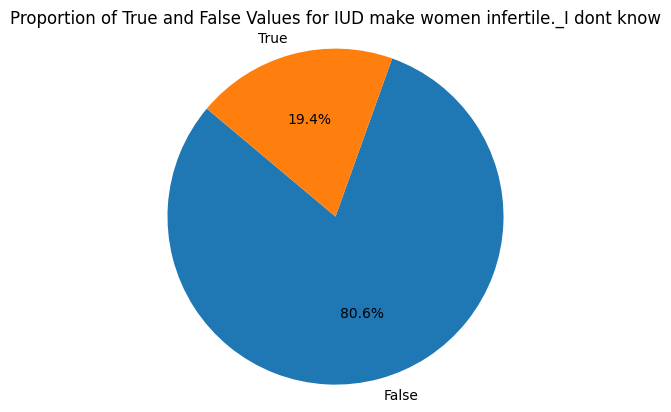

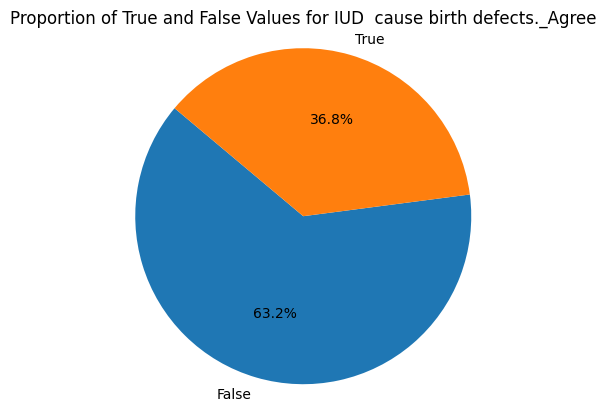

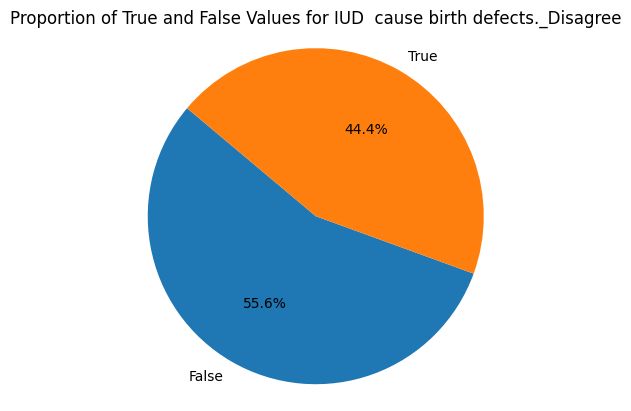

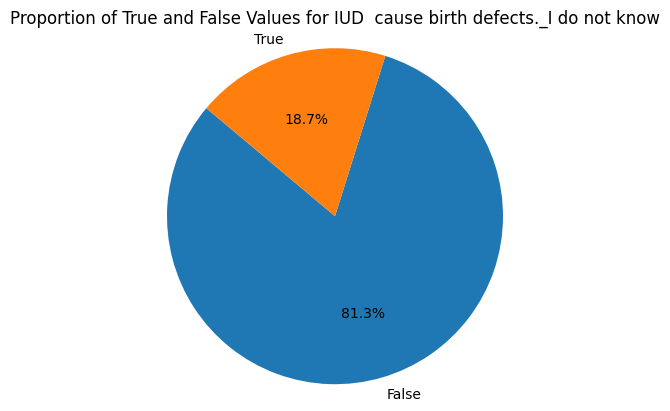

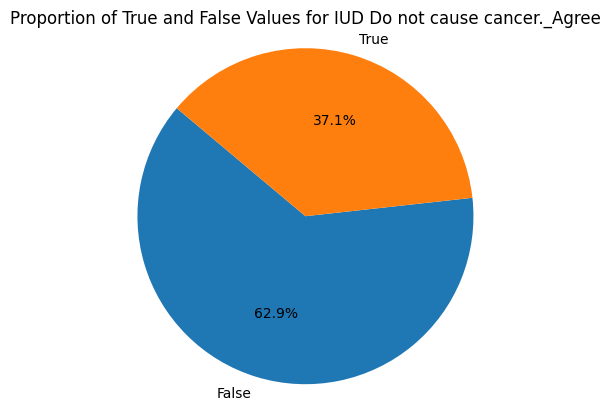

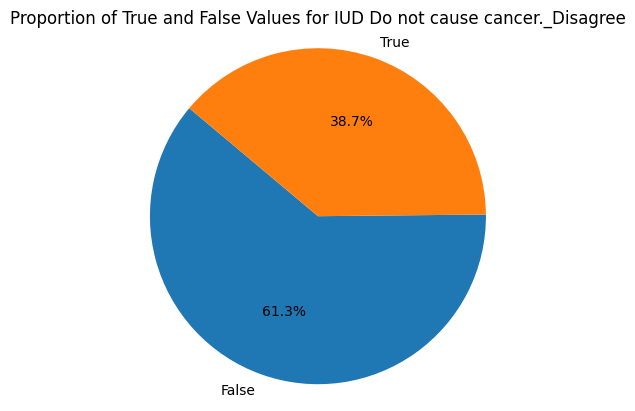

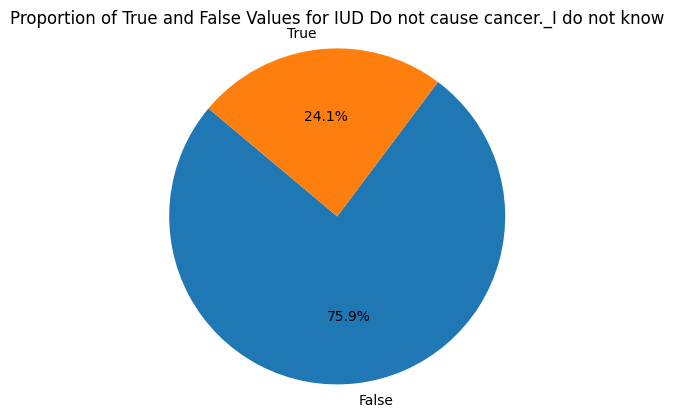

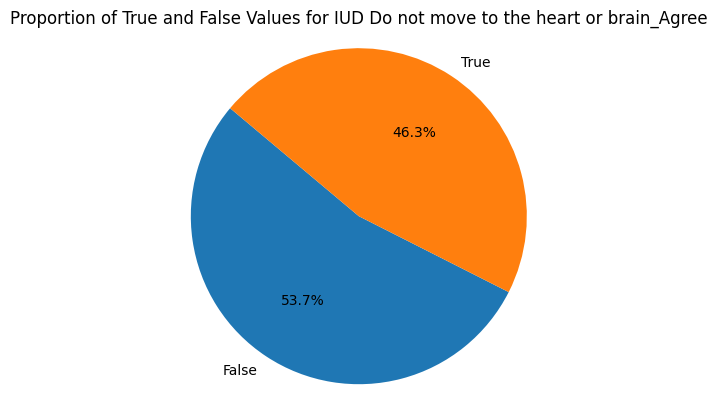

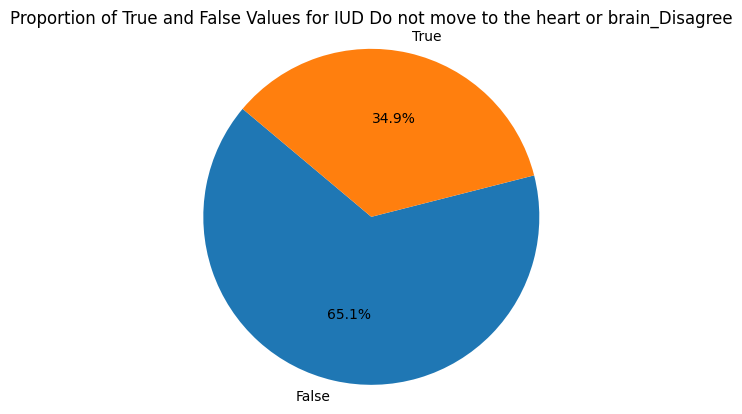

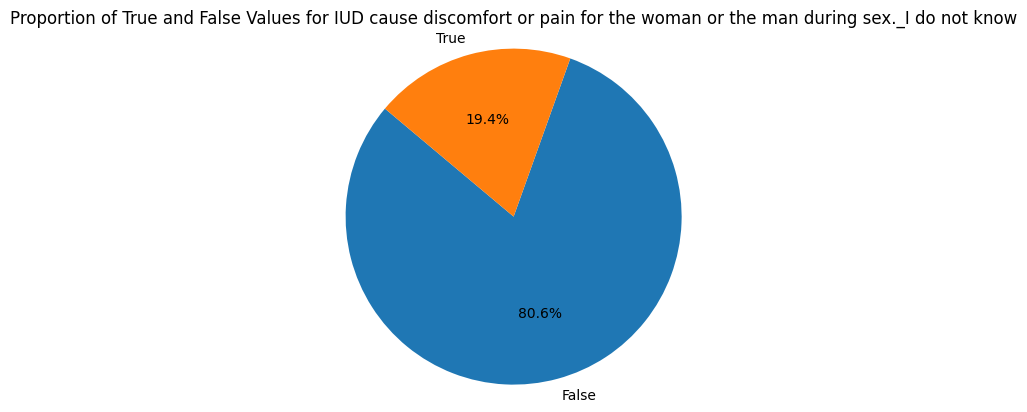

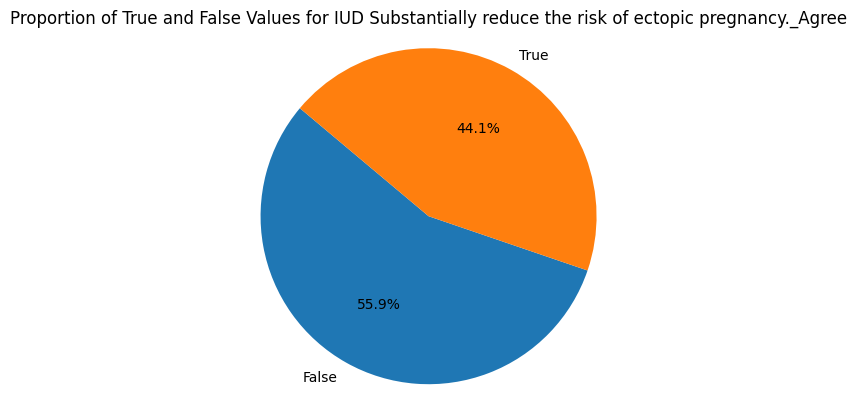

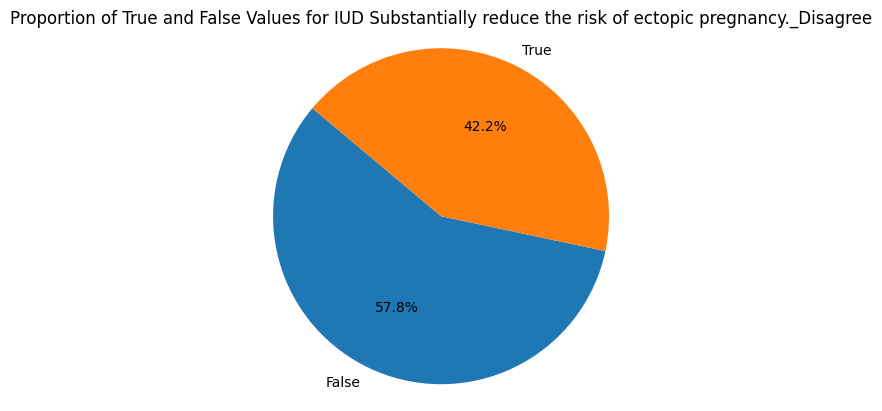

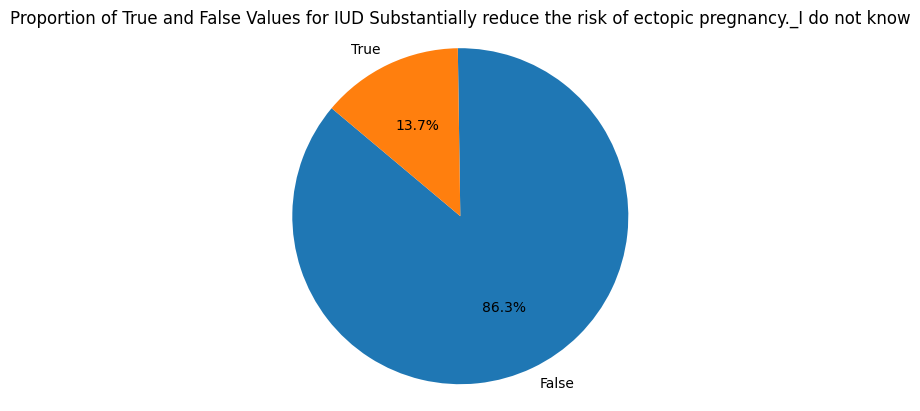

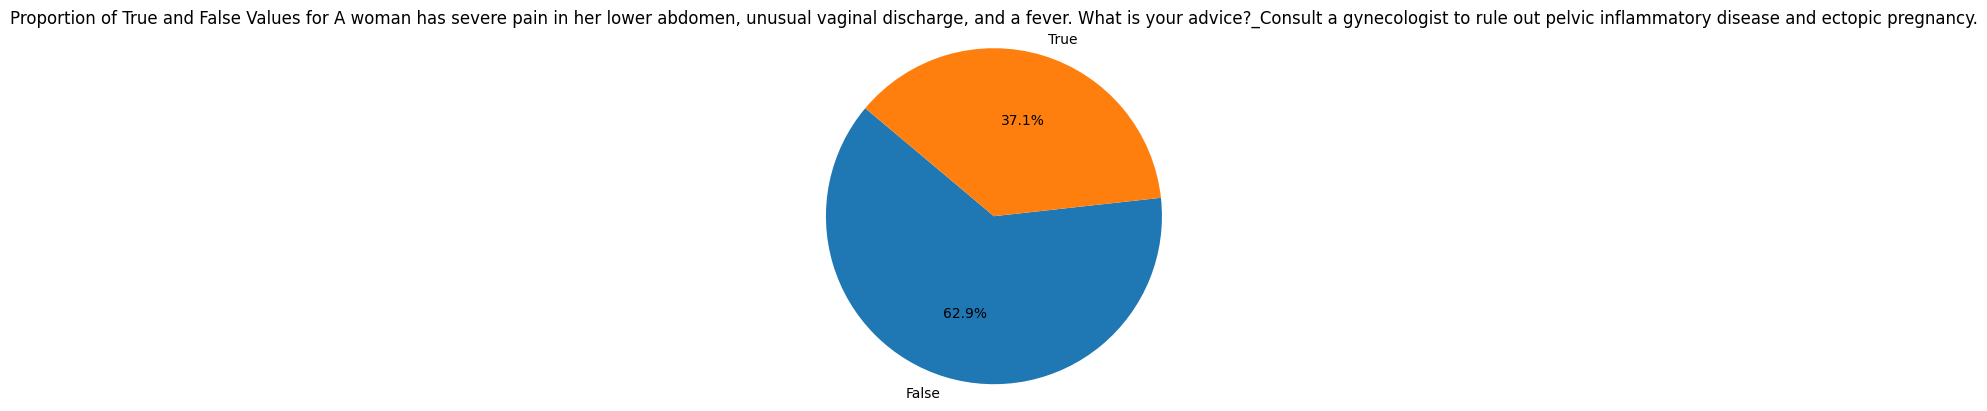

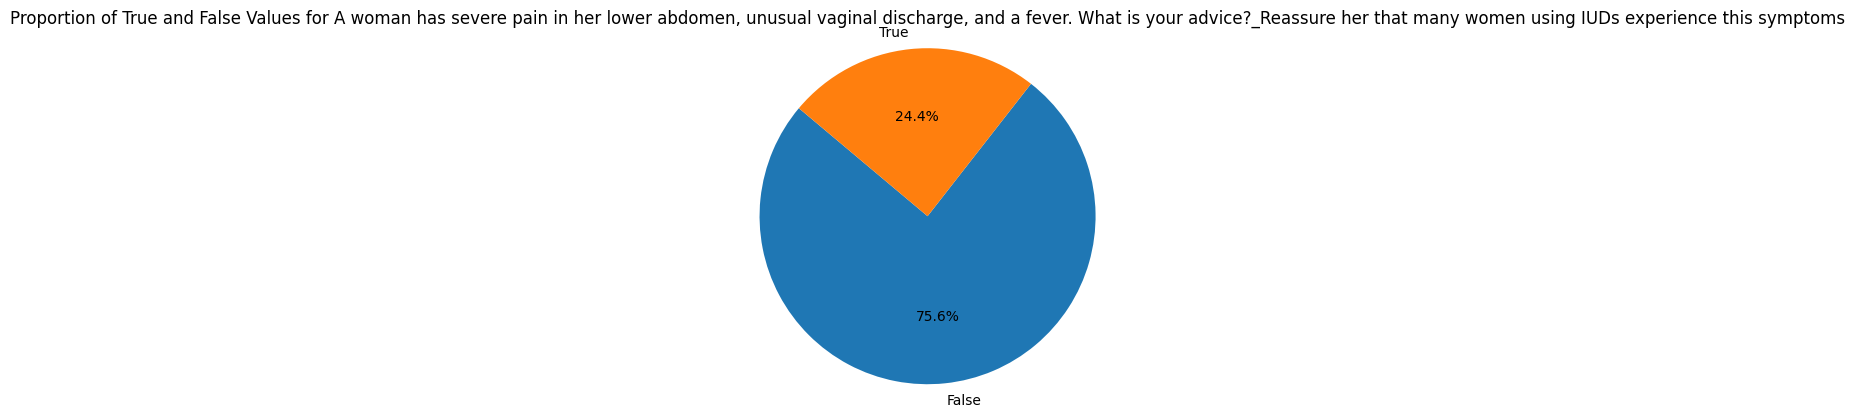

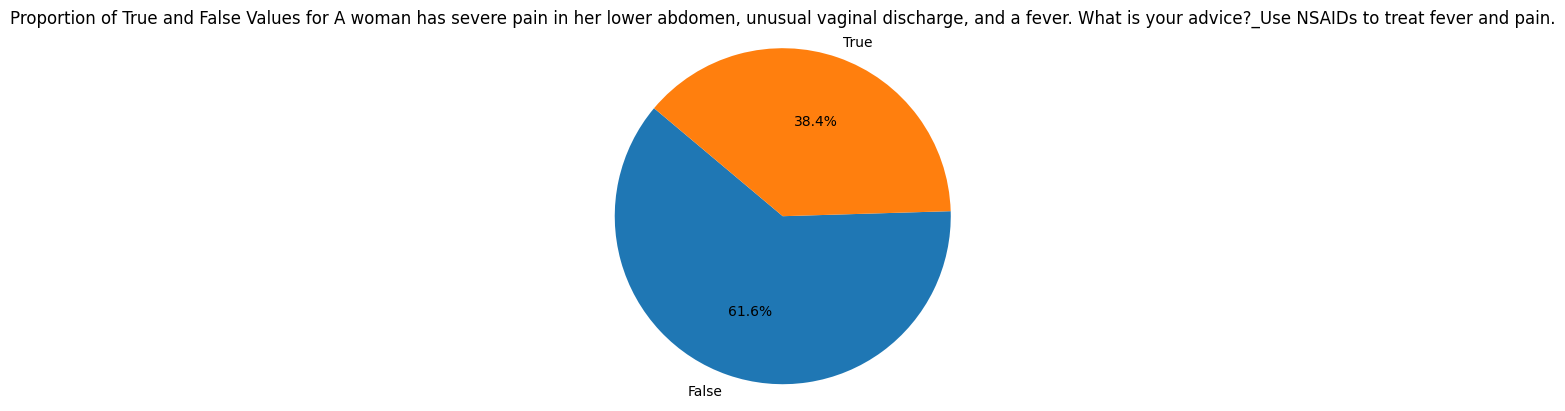

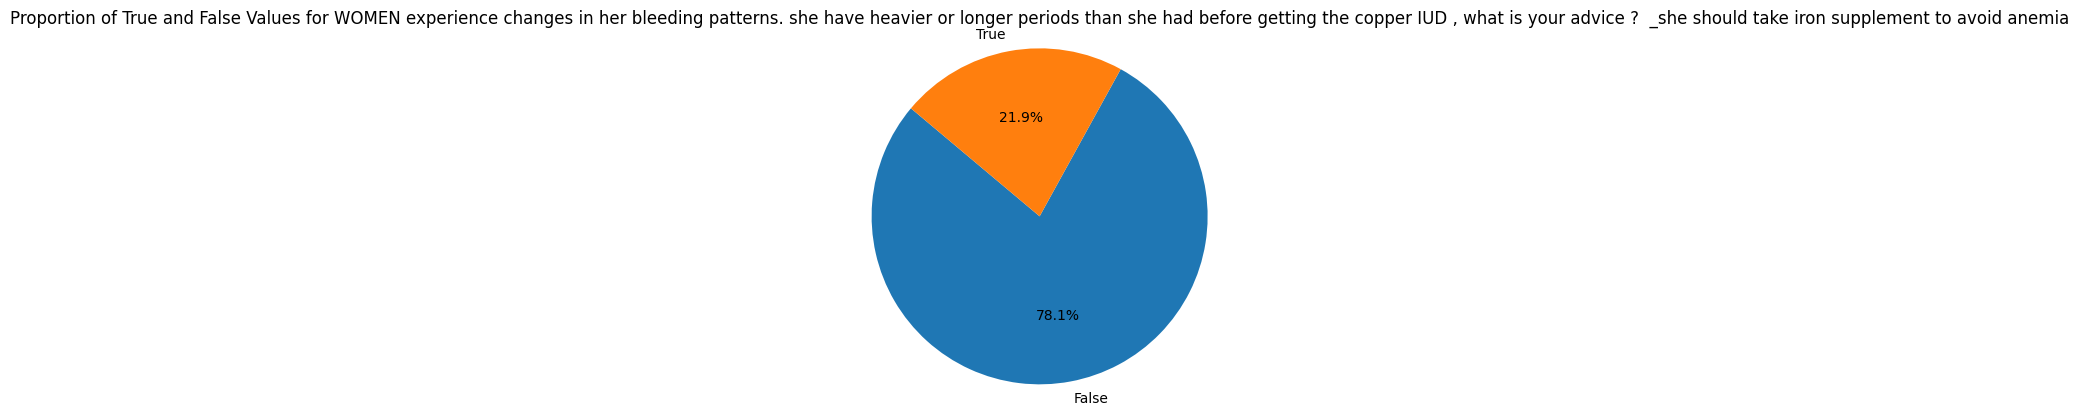

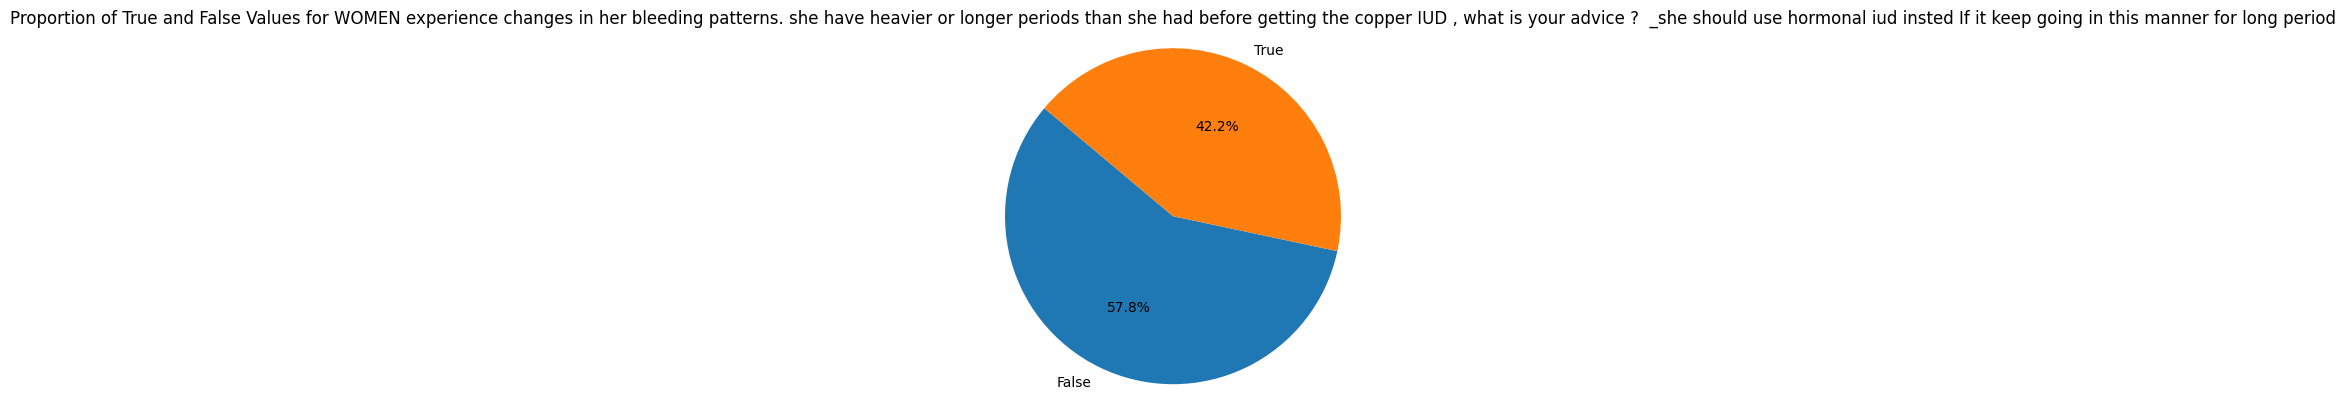

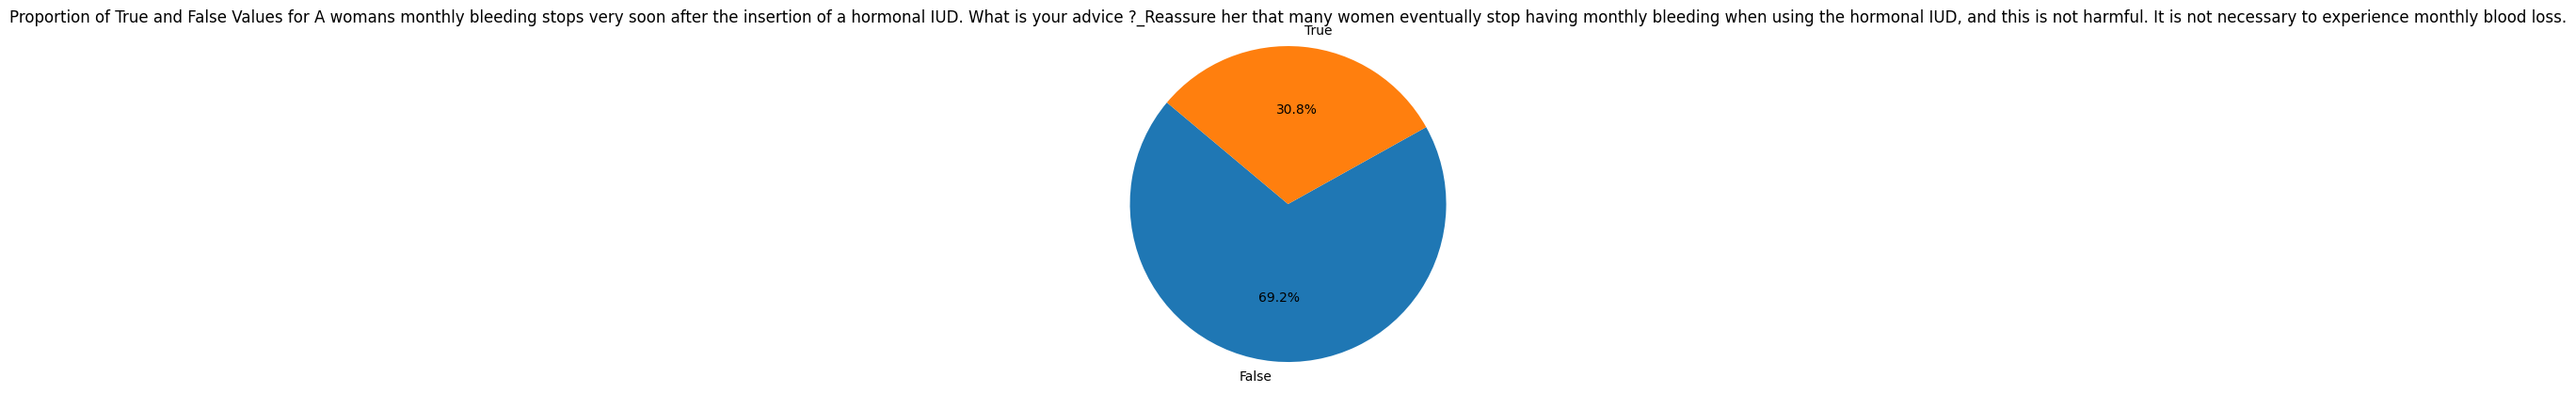

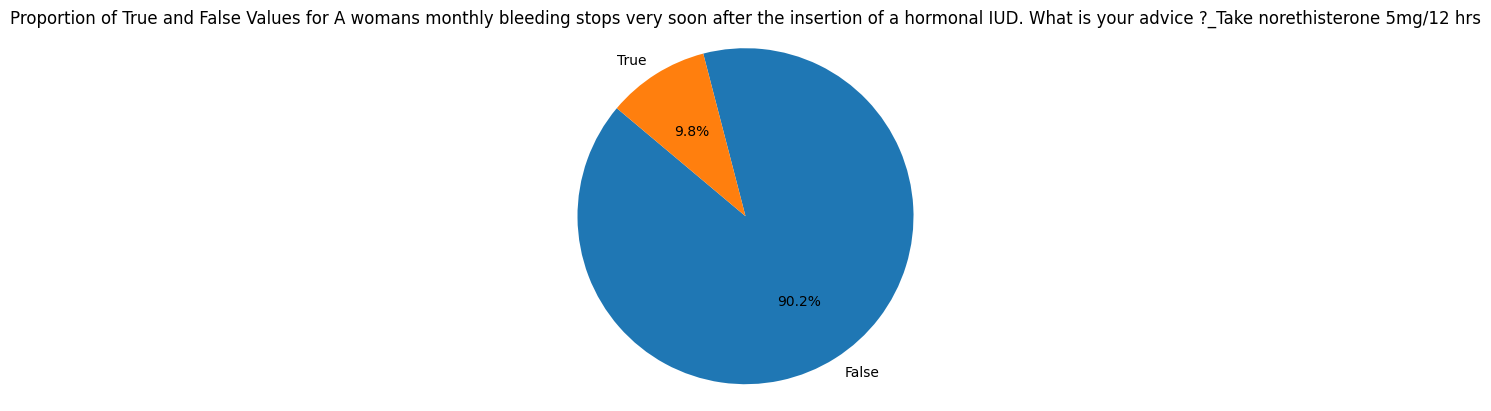

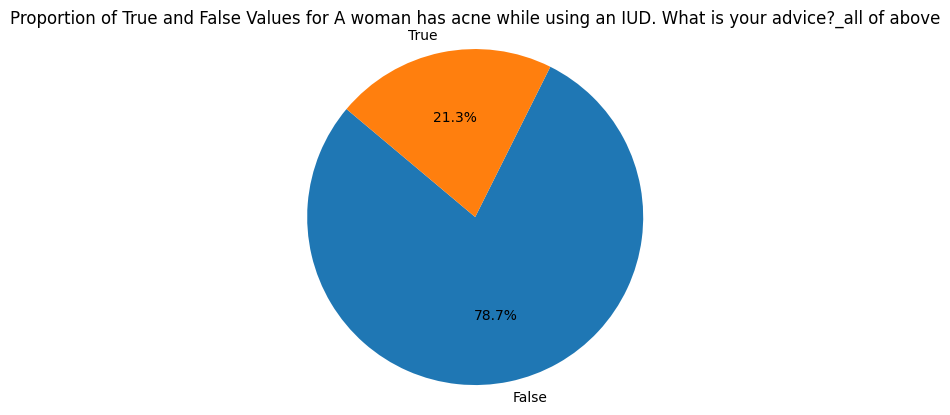

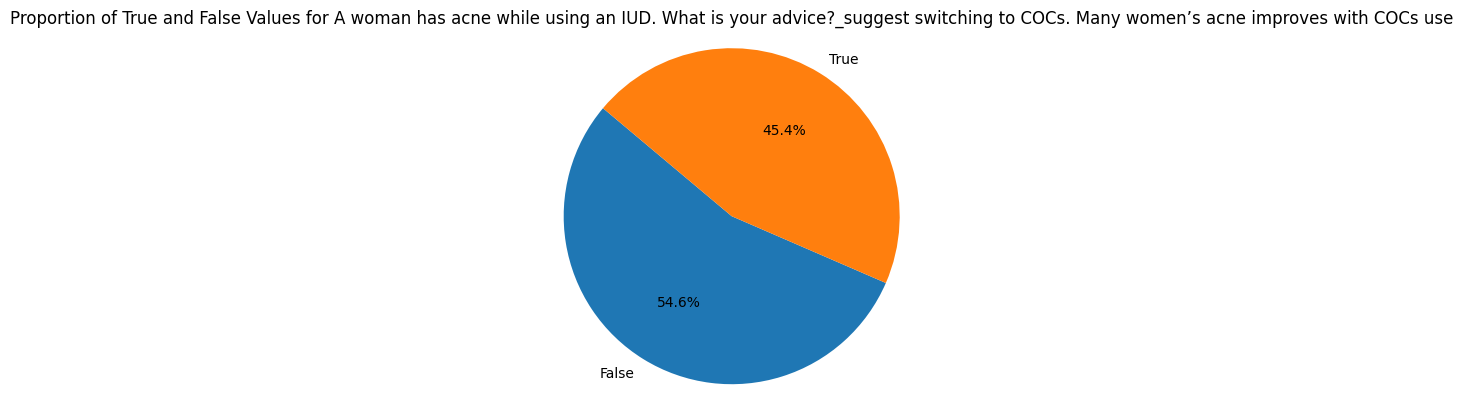

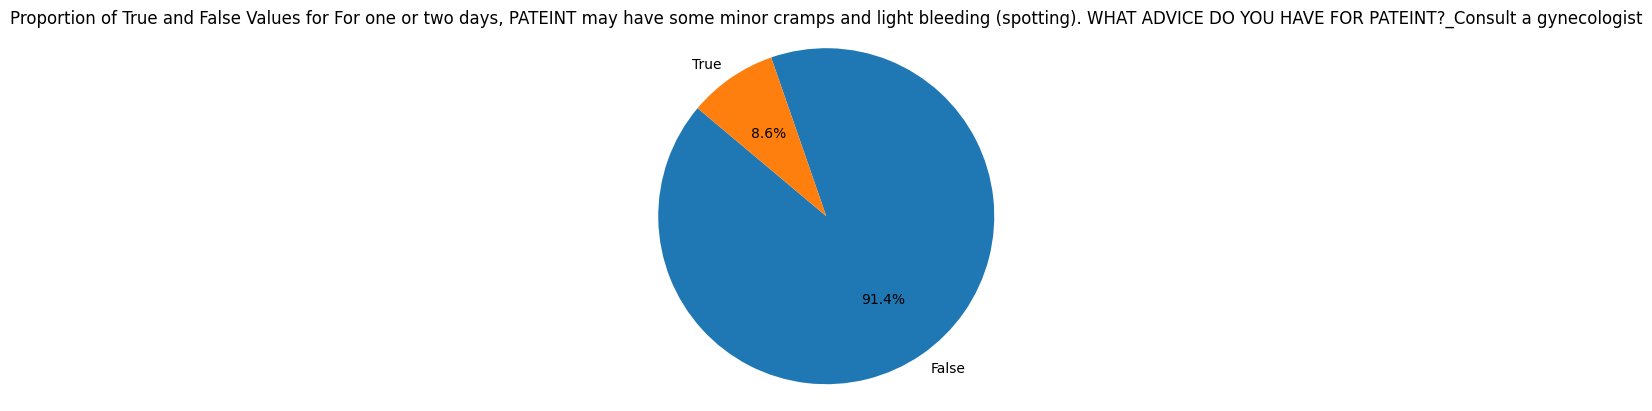

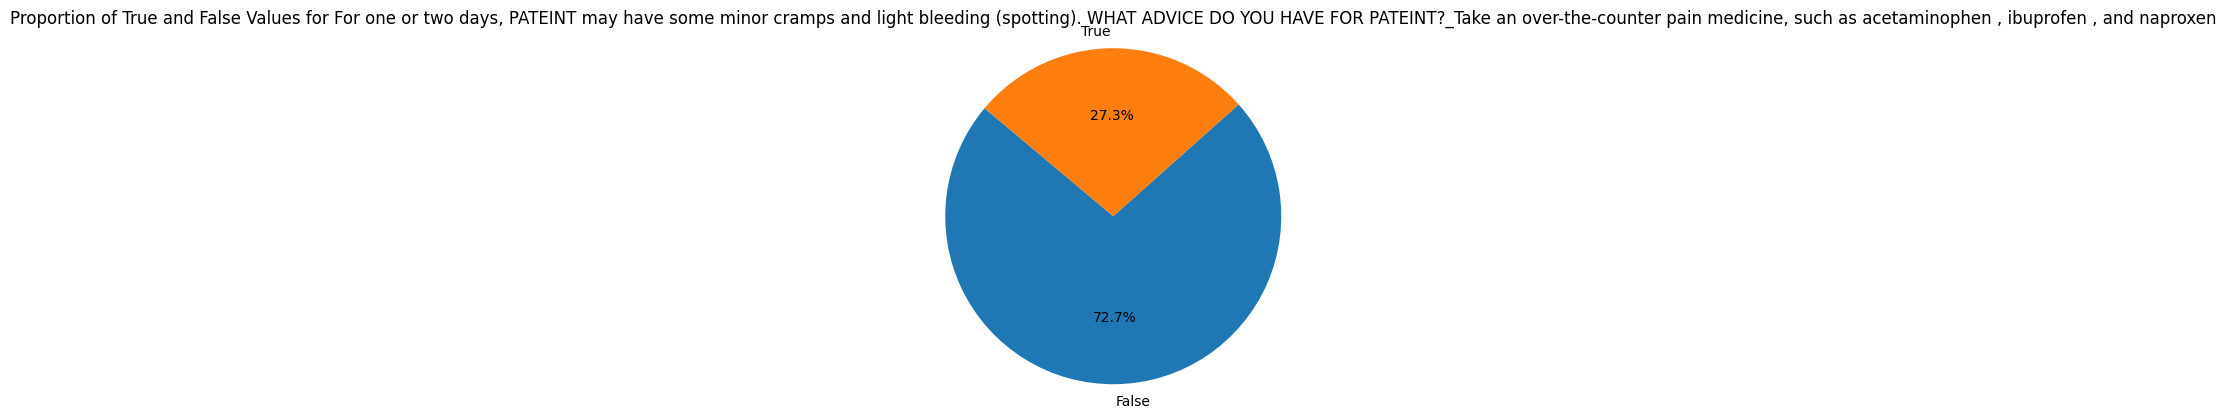

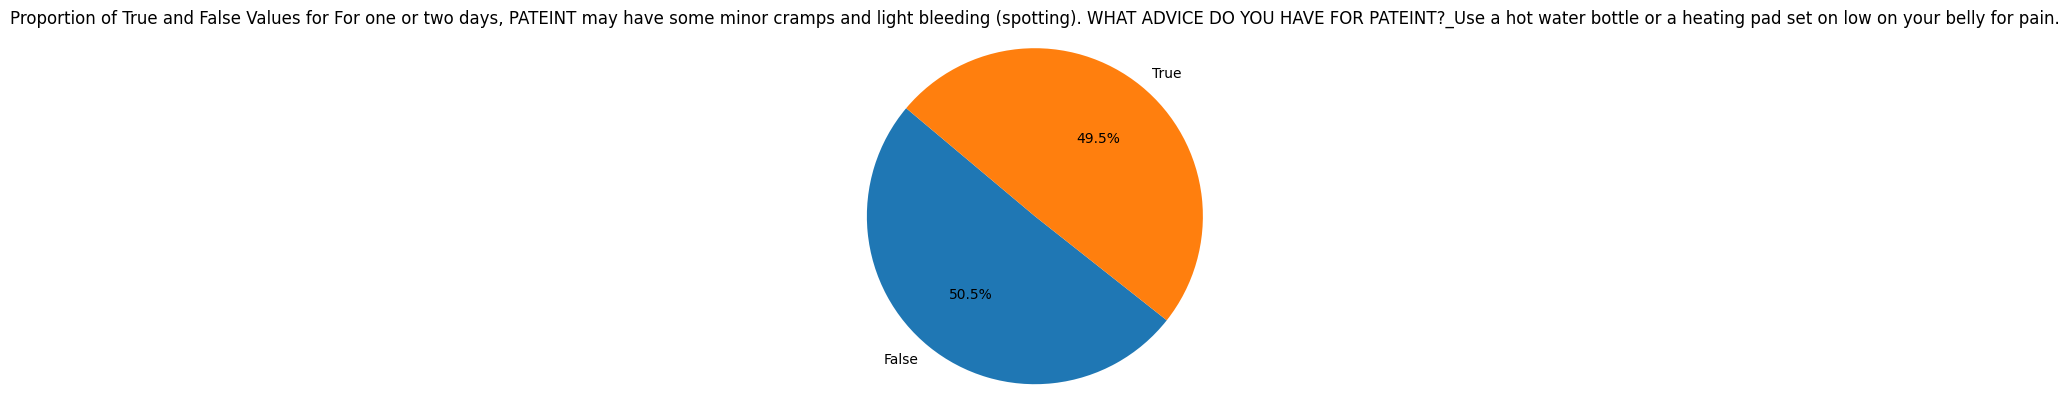

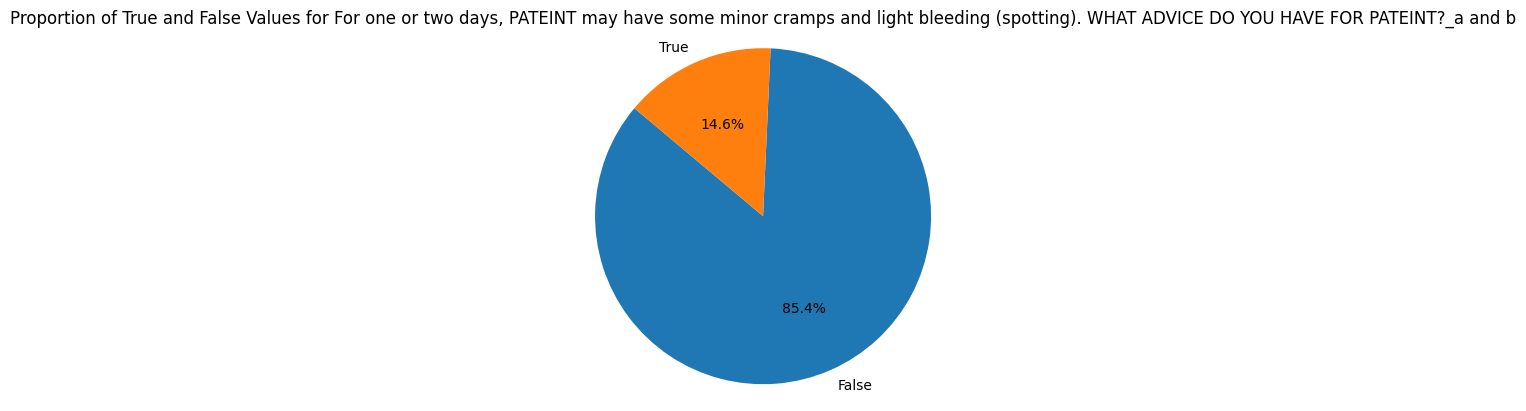

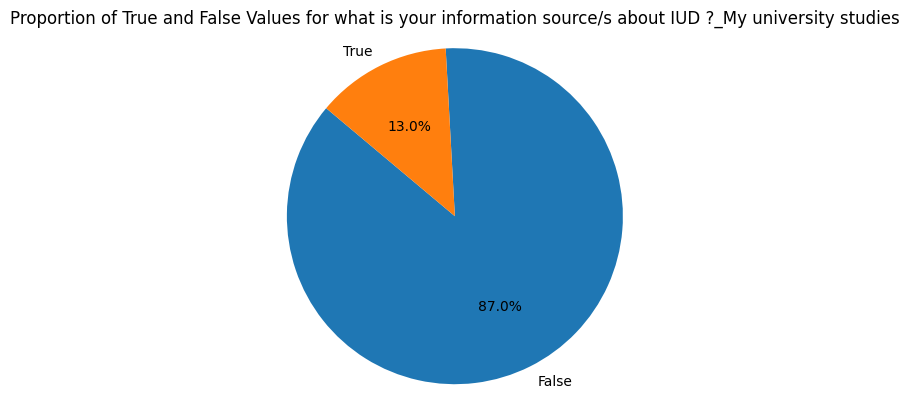

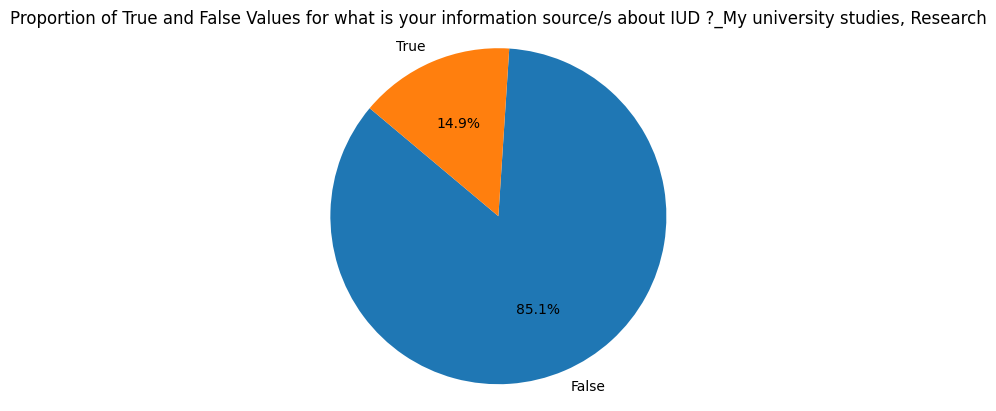

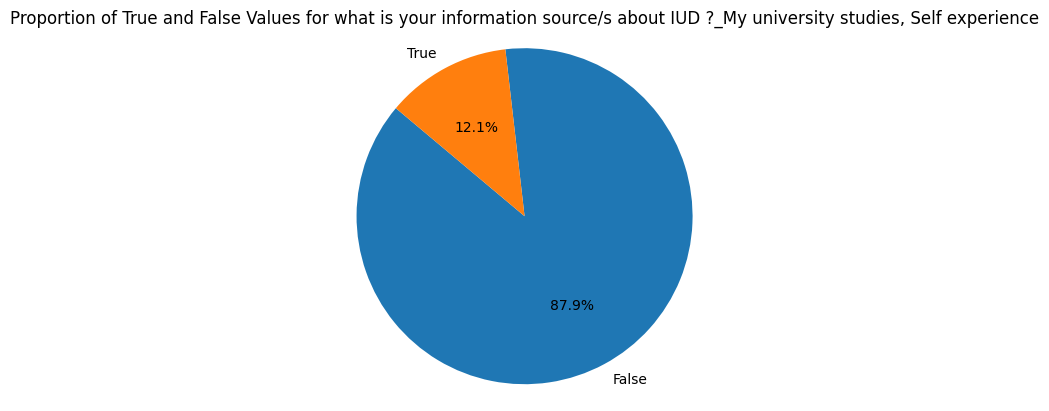

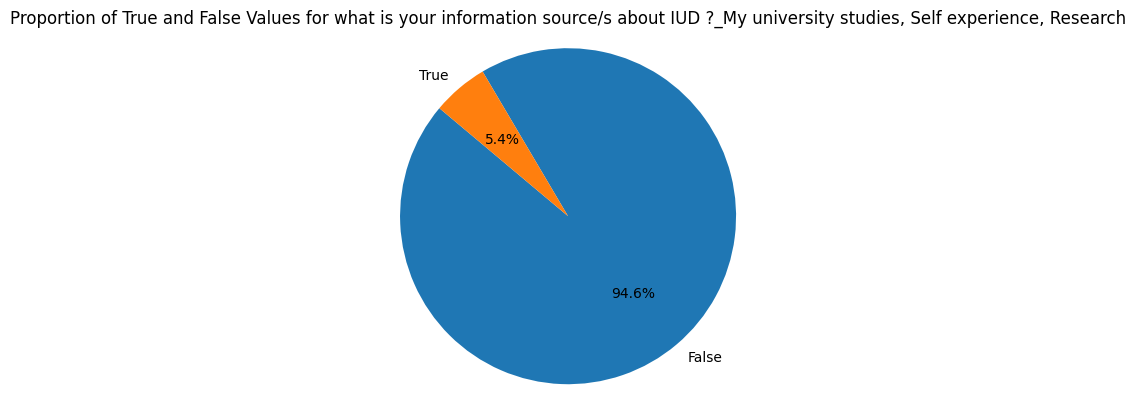

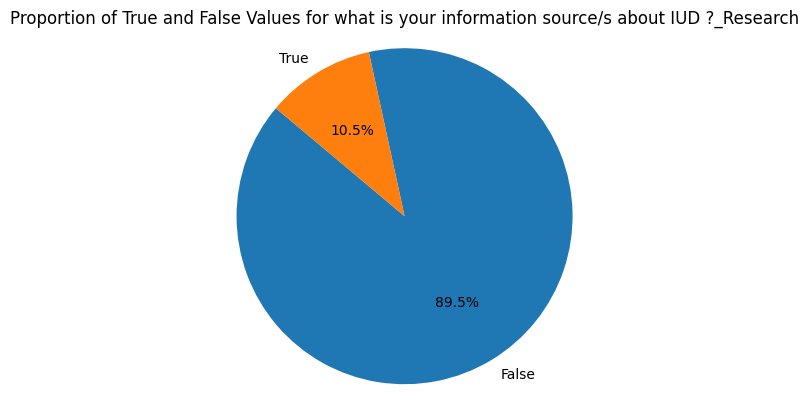

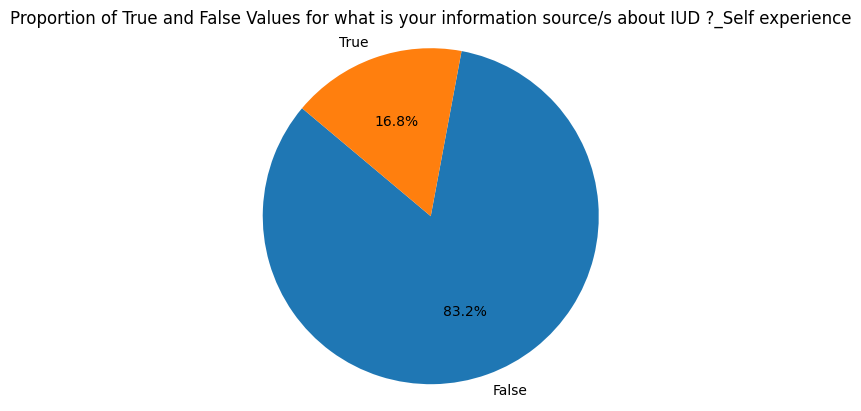

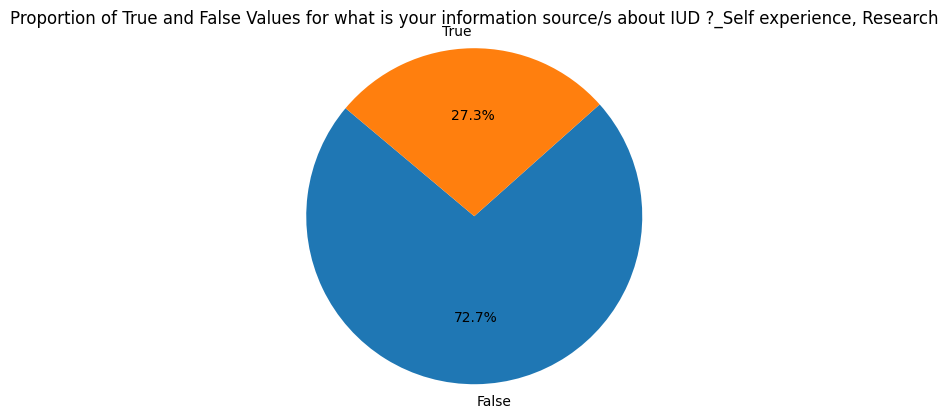

In [26]:
# Scatter plot between a boolean and a non-boolean variable
for column in columns_to_iterate:
    plt.figure()
    plt.pie(dc_df[column].value_counts(), labels=['False', 'True'], autopct='%1.1f%%', startangle=140)
    plt.title(f'Proportion of True and False Values for {column}')
    plt.axis('equal')
    plt.show()

# The P value calulated for all correct answers and age column

In [27]:


# Assuming dc_df is your DataFrame containing the data and selected_columns is the list of selected columns
selected_columns = ['result','Your age ', 'your years of experience',
       'Which of the following is a benefit of implanting an intrauterine device (IUD), for which an IUD may be recommended, in addition to contraception?_Reduction of heavy menstrual bleeding',
                    'women cant use a copper IUD if she  _all of above','one of the following is consider as advantage of hormonal IUD _women can have irregular bleeding, lighter periods, or no period at all.',
        'An IUD can be inserted  _during the period or at the day after your period finish','both hormonal and copper IUD are safe to use while breastfeeding._1.0',
       'We must advise the patient to take iron-containing supplements while using an IUD, especially a copper IUD_1.0',
        'IUD Can be used by women of any age, including adolescents._Agree','IUD Can not be used by women who have not had   children _Agree',
        'IUD increase the risk of contracting STIs, including HIV\n_Disagree','IUD Do not increase the risk of miscarriage when a woman becomes pregnant\nafter the IUD is removed_Agree',
     'IUD make women infertile._Agree', 'IUD make women infertile._Disagree',
        'IUD  cause birth defects._Disagree','IUD Do not cause cancer._Disagree','IUD Do not move to the heart or brain_Disagree','IUD cause discomfort or pain for the woman or the man during sex._Disagree',
       'IUD Substantially reduce the risk of ectopic pregnancy._Agree',
       'A woman has severe pain in her lower abdomen, unusual vaginal discharge, and a fever. What is your advice?_Consult a gynecologist to rule out pelvic inflammatory disease and ectopic pregnancy.',
       'WOMEN experience changes in her bleeding patterns. she have heavier or longer periods than she had before getting the copper IUD , what is your advice ?  _all of above',
       'A womans monthly bleeding stops very soon after the insertion of a hormonal IUD. What is your advice ?_assess for pregnancy or other underlying  condition',
       'A woman has acne while using an IUD. What is your advice?_all of above',
       'For one or two days, PATEINT may have some minor cramps and light bleeding (spotting). WHAT ADVICE DO YOU HAVE FOR PATEINT?_a and b',
       ]

# Create an empty dictionary to store the results
results = {}

# Iterate over each column
for column in selected_columns:
    # Filter the DataFrame to include only the rows where the answer is true
    correct_answers_df = dc_df[dc_df[column] == True]
    
    # Perform your analysis on the filtered DataFrame
    # For example, you can calculate mean age, median year of experience, etc.
    mean_age = correct_answers_df['Your age '].mean()
    median_year_of_experience = correct_answers_df['your years of experience'].median()

    # Perform the t-test
    t_statistic, p_value = stats.ttest_ind(correct_answers_df['Your age '], correct_answers_df['your years of experience'])
    
    # Calculate the standard deviation
    age_std = correct_answers_df['Your age '].std()
    exp_std = correct_answers_df['your years of experience'].std()
    
    # Store the results in the dictionary
    results[column] = {'mean_age': mean_age, 'median_year_of_experience': median_year_of_experience ,'t_statistic': t_statistic, 'p_value': p_value, 'age_std': age_std, 'exp_std': exp_std}

# Print the results
for column, result in results.items():
    print(f"Column: {column}")
    print(f"Mean Age: {result['mean_age']}")
    print(f"Median Year of Experience: {result['median_year_of_experience']}")
    print(f"t-statistic: {result['t_statistic']}, p-value: {result['p_value']}")
    print(f"Age Standard Deviation: {result['age_std']}")
    print(f"Experience Standard Deviation: {result['exp_std']}")
    print()
    

Column: result
Mean Age: nan
Median Year of Experience: nan
t-statistic: nan, p-value: nan
Age Standard Deviation: nan
Experience Standard Deviation: nan

Column: Your age 
Mean Age: nan
Median Year of Experience: nan
t-statistic: nan, p-value: nan
Age Standard Deviation: nan
Experience Standard Deviation: nan

Column: your years of experience
Mean Age: 23.75
Median Year of Experience: 1.0
t-statistic: 36.945906403822335, p-value: 1.420331316985878e-26
Age Standard Deviation: 2.463060426921489
Experience Standard Deviation: 0.0

Column: Which of the following is a benefit of implanting an intrauterine device (IUD), for which an IUD may be recommended, in addition to contraception?_Reduction of heavy menstrual bleeding
Mean Age: 33.99145299145299
Median Year of Experience: 9.0
t-statistic: 23.808478094523576, p-value: 3.187947852250597e-64
Age Standard Deviation: 7.7130607173311345
Experience Standard Deviation: 7.18933945695232

Column: women cant use a copper IUD if she  _all of above

C:\Users\samir\miniconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:523: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


In [28]:


# Select the columns from dc_df based on the selected_column names
selected_df = dc_df[selected_columns]

# Generate descriptive statistics for the selected columns
description = selected_df.describe()

# Print the descriptive statistics
print(description)


           result   Your age   your years of experience
count  315.000000  315.000000                315.000000
mean     8.320635   33.450794                 10.454286
std      3.518204    7.689431                  7.372829
min      2.000000   22.000000                  0.600000
25%      6.000000   28.000000                  5.000000
50%      8.000000   31.000000                  8.000000
75%     10.000000   38.000000                 14.000000
max     21.000000   63.000000                 45.000000


# Here you will find simple analysis and the count for each column in details that is easily understandable 

In [29]:
# Create an empty dictionary to store the counts
boolean_counts = {}

# Iterate over each boolean column
for column in selected_columns:
    # Calculate value counts for the column
    counts = dc_df[column].value_counts()
    
    # Store the counts in the dictionary
    boolean_counts[column] = counts

# Print the counts
for column, counts in boolean_counts.items():
    print(f"Column: {column}")
    print(counts)
    print()


Column: result
result
7     50
9     49
8     38
6     37
5     27
10    27
11    19
4     16
3     10
12     9
13     6
14     5
18     4
2      4
21     4
17     3
16     2
20     2
19     2
15     1
Name: count, dtype: int64

Column: Your age 
Your age 
29.0    35
30.0    26
28.0    23
34.0    19
32.0    18
33.0    15
31.0    15
42.0    15
27.0    14
26.0    13
25.0    11
35.0    10
23.0    10
39.0     9
41.0     9
44.0     9
37.0     8
24.0     8
36.0     6
38.0     5
45.0     5
43.0     4
22.0     4
46.0     4
40.0     3
53.0     3
55.0     3
51.0     3
60.0     2
54.0     1
49.0     1
47.0     1
56.0     1
63.0     1
50.0     1
Name: count, dtype: int64

Column: your years of experience
your years of experience
6.0     35
12.0    29
4.0     23
8.0     22
5.0     19
7.0     18
9.0     17
1.0     16
3.0     16
11.0    13
19.0    11
13.0     9
2.0      8
14.0     8
18.0     8
16.0     8
17.0     7
15.0     6
10.0     6
26.0     5
20.0     5
22.0     5
24.0     3
28.0     2
23.0     

In [30]:
# Create an empty dictionary to store the percentages
true_percentages = {}

# Iterate over each boolean column
for column in selected_columns:
    # Calculate the total number of entries in the column
    total_entries = dc_df[column].count()
    
    # Calculate the number of True values in the column
    true_count = dc_df[column].sum()
    
    # Calculate the percentage of True values
    true_percentage = (true_count / total_entries) * 100
    
    # Store the percentage in the dictionary
    true_percentages[column] = true_percentage

# Print the percentages
for column, percentage in true_percentages.items():
    print(f"Column: {column}")
    print(f"Percentage of True values: {percentage:.2f}%")
    print()


Column: result
Percentage of True values: 832.06%

Column: Your age 
Percentage of True values: 3345.08%

Column: your years of experience
Percentage of True values: 1045.43%

Column: Which of the following is a benefit of implanting an intrauterine device (IUD), for which an IUD may be recommended, in addition to contraception?_Reduction of heavy menstrual bleeding
Percentage of True values: 37.14%

Column: women cant use a copper IUD if she  _all of above
Percentage of True values: 19.37%

Column: one of the following is consider as advantage of hormonal IUD _women can have irregular bleeding, lighter periods, or no period at all.
Percentage of True values: 19.68%

Column: An IUD can be inserted  _during the period or at the day after your period finish
Percentage of True values: 31.11%

Column: both hormonal and copper IUD are safe to use while breastfeeding._1.0
Percentage of True values: 67.94%

Column: We must advise the patient to take iron-containing supplements while using an 

In [31]:
# Group by education level and calculate the sum of True values for each boolean column
grouped_df = dc_df.groupby(['your  gender_Female', 'your  gender_Male'])[selected_columns].sum()

# Print the grouped DataFrame
print(grouped_df)



                                       result  Your age   \
your  gender_Female your  gender_Male                      
False               True                  881     3599.0   
True                False                1740     6938.0   

                                       your years of experience  \
your  gender_Female your  gender_Male                             
False               True                                 1171.0   
True                False                                2122.1   

                                       Which of the following is a benefit of implanting an intrauterine device (IUD), for which an IUD may be recommended, in addition to contraception?_Reduction of heavy menstrual bleeding  \
your  gender_Female your  gender_Male                                                                                                                                                                                             
False               True            

In [32]:
new_df = pd.DataFrame()
# Assign columns from df1 to new_df 'result',  'Your age ','your years of experience'
new_df['your  gender'] = df['your  gender']
new_df['what is your information source/s about IUD ?'] = df['what is your information source/s about IUD ?']
new_df['your monthly income '] = df['your monthly income ']
new_df['result']=df['result']

# Assign columns from df2 to new_df
for column in selected_df.columns:
    new_df[column] = selected_df[column]

# Print the new DataFrame
print(new_df)

    your  gender what is your information source/s about IUD ?  \
1         Female                         My university studies   
3         Female                         My university studies   
8         Female                         My university studies   
12        Female        My university studies, Self experience   
18        Female                               Self experience   
..           ...                                           ...   
357         Male                               Self experience   
358         Male                                      Research   
359         Male                     Self experience, Research   
360         Male                               Self experience   
361         Male                                      Research   

     your monthly income   result  Your age   your years of experience  \
1                     0.0      21       25.0                       1.0   
3                   222.0      18       24.0               

In [33]:
# Group by education level and calculate the sum of True values for each boolean column
grouped_df = new_df.groupby('what is your information source/s about IUD ?')[selected_columns].sum()

# Print the grouped DataFrame
print(grouped_df)

# Specify the file path where you want to save the Excel file
#excel_file_path = "sourceOF_data.xlsx"

# Write the grouped DataFrame to an Excel file
#grouped_df.to_excel(excel_file_path)

#print("Data has been written to", excel_file_path)


                                                  result  Your age   \
what is your information source/s about IUD ?                         
My university studies                                349     1355.0   
My university studies, Research                      363     1511.0   
My university studies, Self experience               327     1258.0   
My university studies, Self experience, Research     187      539.0   
Research                                             278     1129.0   
Self experience                                      455     1828.0   
Self experience, Research                            662     2917.0   

                                                  your years of experience  \
what is your information source/s about IUD ?                                
My university studies                                                446.0   
My university studies, Research                                      404.0   
My university studies, Self experience          

In [34]:
# Group by education level and calculate the percentage of True values for each boolean column
grouped_df_percentage = grouped_df.div(new_df.groupby('what is your information source/s about IUD ?').size(), axis=0) * 100

# Print the grouped DataFrame with percentages
print(grouped_df_percentage)


                                                       result    Your age   \
what is your information source/s about IUD ?                                
My university studies                              851.219512  3304.878049   
My university studies, Research                    772.340426  3214.893617   
My university studies, Self experience             860.526316  3310.526316   
My university studies, Self experience, Research  1100.000000  3170.588235   
Research                                           842.424242  3421.212121   
Self experience                                    858.490566  3449.056604   
Self experience, Research                          769.767442  3391.860465   

                                                  your years of experience  \
what is your information source/s about IUD ?                                
My university studies                                          1087.804878   
My university studies, Research                                

In [35]:
# Create an empty dictionary to store the counts
boolean_counts = {}

# Iterate over each boolean column
for column in new_df.columns:
    # Calculate value counts for the column
    counts = new_df[column].value_counts()
    
    # Store the counts in the dictionary
    boolean_counts[column] = counts

# Print the counts
for column, counts in boolean_counts.items():
    print(f"Column: {column}")
    print(counts)
    print()


Column: your  gender
your  gender
Female    210
Male      105
Name: count, dtype: int64

Column: what is your information source/s about IUD ?
what is your information source/s about IUD ?
Self experience, Research                           86
Self experience                                     53
My university studies, Research                     47
My university studies                               41
My university studies, Self experience              38
Research                                            33
My university studies, Self experience, Research    17
Name: count, dtype: int64

Column: your monthly income 
your monthly income 
310.0    19
410.0    17
340.0    17
380.0    17
400.0    16
         ..
222.0     1
467.0     1
483.0     1
378.0     1
355.0     1
Name: count, Length: 82, dtype: int64

Column: result
result
7     50
9     49
8     38
6     37
5     27
10    27
11    19
4     16
3     10
12     9
13     6
14     5
18     4
2      4
21     4
17     3
16     2
20 

In [36]:
# Group by education level and calculate the sum of True values for each boolean column
grouped_df = new_df.groupby('your  gender')[selected_columns].sum()

# Print the grouped DataFrame
print(grouped_df)

# Specify the file path where you want to save the Excel file
#excel_file_path = "genderC.xlsx"

# Write the grouped DataFrame to an Excel file
#grouped_df.to_excel(excel_file_path)

#print("Data has been written to", excel_file_path)


              result  Your age   your years of experience  \
your  gender                                                
Female          1740     6938.0                    2122.1   
Male             881     3599.0                    1171.0   

              Which of the following is a benefit of implanting an intrauterine device (IUD), for which an IUD may be recommended, in addition to contraception?_Reduction of heavy menstrual bleeding  \
your  gender                                                                                                                                                                                             
Female                                                       69                                                                                                                                          
Male                                                         48                                                                                      

In [37]:
grouped_df = new_df.groupby('your  gender')[selected_columns].count()



# Subtract the sum of true values from the total count to get the sum of false values
grouped_df_false = grouped_df - new_df.groupby('your  gender')[selected_columns].sum()

# Print the grouped DataFrame
print(grouped_df_false)
#excel_file_path_false = "gender_false_data.xlsx"

# Write the grouped DataFrame to an Excel file
#grouped_df_false.to_excel(excel_file_path_false)

#print("Data has been written to", excel_file_path_false)

              result  Your age   your years of experience  \
your  gender                                                
Female         -1530    -6728.0                   -1912.1   
Male            -776    -3494.0                   -1066.0   

              Which of the following is a benefit of implanting an intrauterine device (IUD), for which an IUD may be recommended, in addition to contraception?_Reduction of heavy menstrual bleeding  \
your  gender                                                                                                                                                                                             
Female                                                      141                                                                                                                                          
Male                                                         57                                                                                      

In [38]:
# Group by source of knowledge and calculate the count of each boolean column
grouped_df = new_df.groupby('what is your information source/s about IUD ?')[selected_columns].count()

# Subtract the sum of true values from the total count to get the sum of false values
grouped_df_false = grouped_df - new_df.groupby('what is your information source/s about IUD ?')[selected_columns].sum()

# Print the grouped DataFrame for false values
print(grouped_df_false)

# Specify the file path where you want to save the Excel file
#excel_file_path = "source_false.xlsx"

# Write the grouped DataFrame for false values to an Excel file
#grouped_df_false.to_excel(excel_file_path)

#print("Data has been written to", excel_file_path)


                                                  result  Your age   \
what is your information source/s about IUD ?                         
My university studies                               -308    -1314.0   
My university studies, Research                     -316    -1464.0   
My university studies, Self experience              -289    -1220.0   
My university studies, Self experience, Research    -170     -522.0   
Research                                            -245    -1096.0   
Self experience                                     -402    -1775.0   
Self experience, Research                           -576    -2831.0   

                                                  your years of experience  \
what is your information source/s about IUD ?                                
My university studies                                               -405.0   
My university studies, Research                                     -357.0   
My university studies, Self experience          

In [39]:
# Define the bins for age categories
bins = [21, 34, 44, float('inf')]  # Define the bin edges

# Define labels for the age categories
labels = ['22-34', '35-44', '45+']

# Use pd.cut() to create a new column 'Age Group' by categorizing the 'Your Age' column
new_df['Age Group'] = pd.cut(new_df['Your age '], bins=bins, labels=labels, right=False)

# Print the DataFrame with the new 'Age Group' column
print(new_df[['Your age ', 'Age Group']])


     Your age  Age Group
1         25.0     22-34
3         24.0     22-34
8         33.0     22-34
12        26.0     22-34
18        27.0     22-34
..         ...       ...
357       38.0     35-44
358       53.0       45+
359       37.0     35-44
360       41.0     35-44
361       50.0       45+

[315 rows x 2 columns]


In [40]:
# Group by education level and calculate the sum of True values for each boolean column
grouped_df = new_df.groupby('Age Group')[selected_columns].sum()

# Print the grouped DataFrame
print(grouped_df)

excel_file_path = "age_CorrValu.xlsx"

# Write the grouped DataFrame for false values to an Excel file
grouped_df.to_excel(excel_file_path)

print("Data has been written to", excel_file_path)

           result  Your age   your years of experience  \
Age Group                                                
22-34        1641     5476.0                    1214.6   
35-44         710     3340.0                    1256.5   
45+           270     1721.0                     822.0   

           Which of the following is a benefit of implanting an intrauterine device (IUD), for which an IUD may be recommended, in addition to contraception?_Reduction of heavy menstrual bleeding  \
Age Group                                                                                                                                                                                             
22-34                                                     70                                                                                                                                          
35-44                                                     35                                                    

C:\Users\samir\AppData\Local\Temp\ipykernel_30804\1958171519.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_df = new_df.groupby('Age Group')[selected_columns].sum()


In [41]:
grouped_df = new_df.groupby('Age Group')[selected_columns].count()

# Subtract the sum of true values from the total count to get the sum of false values
grouped_df_false = grouped_df - new_df.groupby('Age Group')[selected_columns].sum()

# Print the grouped DataFrame for false values
print(grouped_df_false)




excel_file_path = "age_wrongValu.xlsx"

# Write the grouped DataFrame for false values to an Excel file
grouped_df_false.to_excel(excel_file_path)

print("Data has been written to", excel_file_path)


C:\Users\samir\AppData\Local\Temp\ipykernel_30804\2631165142.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_df = new_df.groupby('Age Group')[selected_columns].count()
C:\Users\samir\AppData\Local\Temp\ipykernel_30804\2631165142.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_df_false = grouped_df - new_df.groupby('Age Group')[selected_columns].sum()


           result  Your age   your years of experience  \
Age Group                                                
22-34       -1449    -5284.0                   -1022.6   
35-44        -622    -3252.0                   -1168.5   
45+          -235    -1686.0                    -787.0   

           Which of the following is a benefit of implanting an intrauterine device (IUD), for which an IUD may be recommended, in addition to contraception?_Reduction of heavy menstrual bleeding  \
Age Group                                                                                                                                                                                             
22-34                                                    122                                                                                                                                          
35-44                                                     53                                                    

In [42]:
# Define the bins for the categories
bins = [-1, 10, 20, float('inf')]  # -1 is for 0, float('inf') is for 20+

# Define the labels for the categories
labels = ['0-10', '11-20', '20+']

# Create a new column with the categorized year of experience
new_df['Experience Category'] = pd.cut(new_df['your years of experience'], bins=bins, labels=labels, right=False)

# Display the DataFrame with the new column
print(new_df[['your years of experience', 'Experience Category']])


     your years of experience Experience Category
1                         1.0                0-10
3                        22.0                 20+
8                         9.0                0-10
12                        2.0                0-10
18                        3.0                0-10
..                        ...                 ...
357                      16.0               11-20
358                      27.0                 20+
359                      15.0               11-20
360                      18.0               11-20
361                      28.0                 20+

[315 rows x 2 columns]


In [43]:
# Group by education level and calculate the sum of True values for each boolean column
grouped_df = new_df.groupby('Experience Category')[selected_columns].sum()

# Print the grouped DataFrame
print(grouped_df)

#excel_file_path = "Experience_C.xlsx"

# Write the grouped DataFrame for false values to an Excel file
#grouped_df.to_excel(excel_file_path)

#print("Data has been written to", excel_file_path)

C:\Users\samir\AppData\Local\Temp\ipykernel_30804\3879462704.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_df = new_df.groupby('Experience Category')[selected_columns].sum()


                     result  Your age   your years of experience  \
Experience Category                                                
0-10                   1476     4974.0                     932.6   
11-20                   831     3974.0                    1481.5   
20+                     314     1589.0                     879.0   

                     Which of the following is a benefit of implanting an intrauterine device (IUD), for which an IUD may be recommended, in addition to contraception?_Reduction of heavy menstrual bleeding  \
Experience Category                                                                                                                                                                                             
0-10                                                                62                                                                                                                                          
11-20                           

In [44]:
grouped_df = new_df.groupby('Experience Category')[selected_columns].count()

# Subtract the sum of true values from the total count to get the sum of false values
grouped_df_false = grouped_df - new_df.groupby('Experience Category')[selected_columns].sum()

# Print the grouped DataFrame for false values
print(grouped_df_false)




#excel_file_path = "Experience_w.xlsx"

# Write the grouped DataFrame for false values to an Excel file
#grouped_df_false.to_excel(excel_file_path)

#print("Data has been written to", excel_file_path)


                     result  Your age   your years of experience  \
Experience Category                                                
0-10                  -1301    -4799.0                    -757.6   
11-20                  -725    -3868.0                   -1375.5   
20+                    -280    -1555.0                    -845.0   

                     Which of the following is a benefit of implanting an intrauterine device (IUD), for which an IUD may be recommended, in addition to contraception?_Reduction of heavy menstrual bleeding  \
Experience Category                                                                                                                                                                                             
0-10                                                               113                                                                                                                                          
11-20                           

C:\Users\samir\AppData\Local\Temp\ipykernel_30804\773932588.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_df = new_df.groupby('Experience Category')[selected_columns].count()
C:\Users\samir\AppData\Local\Temp\ipykernel_30804\773932588.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_df_false = grouped_df - new_df.groupby('Experience Category')[selected_columns].sum()


In [45]:
# Create an empty dictionary to store the counts
boolean_counts = {}

# Iterate over each boolean column
for column in new_df.columns:
    # Calculate value counts for the column
    counts = new_df[column].value_counts()
    
    # Store the counts in the dictionary
    boolean_counts[column] = counts

# Print the counts
for column, counts in boolean_counts.items():
    print(f"Column: {column}")
    print(counts)
    print()


Column: your  gender
your  gender
Female    210
Male      105
Name: count, dtype: int64

Column: what is your information source/s about IUD ?
what is your information source/s about IUD ?
Self experience, Research                           86
Self experience                                     53
My university studies, Research                     47
My university studies                               41
My university studies, Self experience              38
Research                                            33
My university studies, Self experience, Research    17
Name: count, dtype: int64

Column: your monthly income 
your monthly income 
310.0    19
410.0    17
340.0    17
380.0    17
400.0    16
         ..
222.0     1
467.0     1
483.0     1
378.0     1
355.0     1
Name: count, Length: 82, dtype: int64

Column: result
result
7     50
9     49
8     38
6     37
5     27
10    27
11    19
4     16
3     10
12     9
13     6
14     5
18     4
2      4
21     4
17     3
16     2
20 

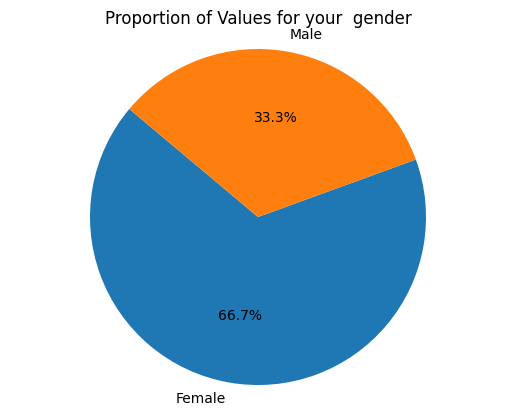

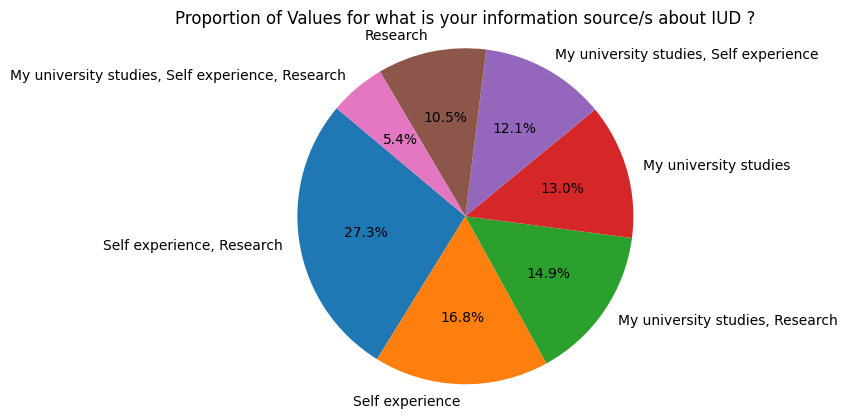

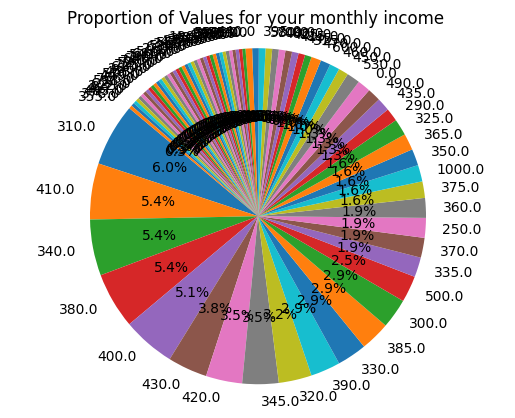

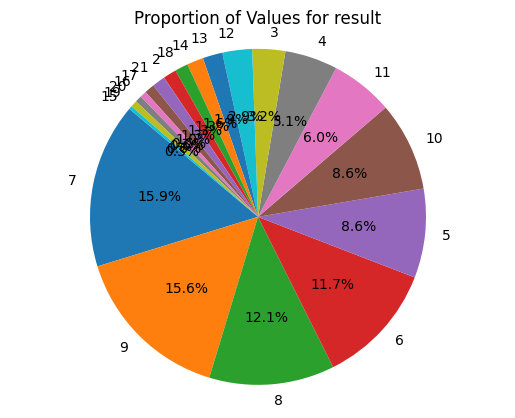

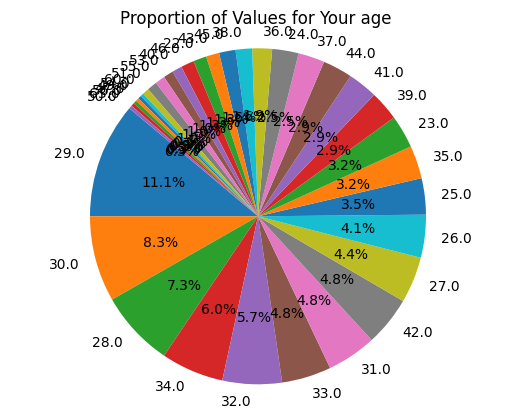

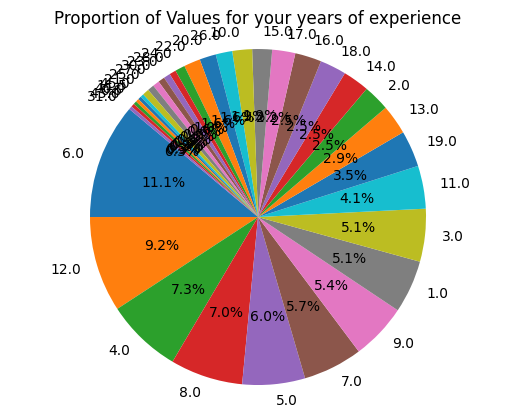

Error plotting pie chart for column 'Which of the following is a benefit of implanting an intrauterine device (IUD), for which an IUD may be recommended, in addition to contraception?_Reduction of heavy menstrual bleeding': 'Which of the following is a benefit of implanting an intrauterine device (IUD), for which an IUD may be recommended, in addition to contraception?_Reduction of heavy menstrual bleeding'
Error plotting pie chart for column 'women cant use a copper IUD if she  _all of above': 'women cant use a copper IUD if she  _all of above'
Error plotting pie chart for column 'one of the following is consider as advantage of hormonal IUD _women can have irregular bleeding, lighter periods, or no period at all.': 'one of the following is consider as advantage of hormonal IUD _women can have irregular bleeding, lighter periods, or no period at all.'
Error plotting pie chart for column 'An IUD can be inserted  _during the period or at the day after your period finish': 'An IUD can be

C:\Users\samir\AppData\Local\Temp\ipykernel_30804\3744677295.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [46]:
# Iterate over each column and plot a pie chart
for column in new_df.columns:
    try:
        plt.figure()
        counts = df[column].value_counts()
        plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140)
        plt.title(f'Proportion of Values for {column}')
        plt.axis('equal')
        plt.show()
    except Exception as e:
        print(f"Error plotting pie chart for column '{column}': {e}")

In [47]:
# Define the bins for the income categories
bins = [0, 400, 1000, float('inf')]  # Adjust the bin boundaries as needed

# Define the labels for the income categories
labels = ['Low Income 0-400', 'Medium Income 400-1000', 'High Income 1000+']

# Create a new column in your DataFrame that contains the income categories
new_df['Income Category'] = pd.cut(new_df['your monthly income '], bins=bins, labels=labels, right=False)

# Print the updated DataFrame to see the new column
print(new_df[['your monthly income ', 'Income Category']])

int(new_df)


     your monthly income          Income Category
1                     0.0        Low Income 0-400
3                   222.0        Low Income 0-400
8                   500.0  Medium Income 400-1000
12                  250.0        Low Income 0-400
18                  450.0  Medium Income 400-1000
..                    ...                     ...
357                 365.0        Low Income 0-400
358                 385.0        Low Income 0-400
359                 415.0  Medium Income 400-1000
360                 355.0        Low Income 0-400
361                 470.0  Medium Income 400-1000

[315 rows x 2 columns]


TypeError: int() argument must be a string, a bytes-like object or a real number, not 'DataFrame'

In [ ]:
grouped_df = new_df.groupby('Income Category')[selected_columns].count()

# Subtract the sum of true values from the total count to get the sum of false values
grouped_df_false = grouped_df - new_df.groupby('Income Category')[selected_columns].sum()

# Print the grouped DataFrame for false values
print(grouped_df_false)




#excel_file_path = "Income_w.xlsx"

# Write the grouped DataFrame for false values to an Excel file
#grouped_df_false.to_excel(excel_file_path)

#print("Data has been written to", excel_file_path)


In [ ]:
# Group by education level and calculate the sum of True values for each boolean column
grouped_df = new_df.groupby('Income Category')[selected_columns].sum()

# Print the grouped DataFrame
print(grouped_df)

#excel_file_path = "Income_C.xlsx"

# Write the grouped DataFrame for false values to an Excel file
#grouped_df.to_excel(excel_file_path)

#print("Data has been written to", excel_file_path)

In [ ]:


# Define the bins for grouping
bins = [0, 10, 22]  # Define the bin edges

# Define the labels for the groups
labels = ['result between 0-10', 'result between 11-21']

# Create a new column with the bin labels based on the final result column
new_df['Result Category'] = pd.cut(new_df['result'], bins=bins, labels=labels, right=False)

print(new_df[['result', 'Result Category']])

In [ ]:
# Group by education level and calculate the sum of True values for each boolean column
grouped_df = new_df.groupby('Result Category')[selected_columns].sum()

# Print the grouped DataFrame
print(grouped_df)

#excel_file_path = "result_C.xlsx"

# Write the grouped DataFrame for false values to an Excel file
#grouped_df.to_excel(excel_file_path)

#print("Data has been written to", excel_file_path)

In [ ]:
grouped_df = new_df.groupby('Result Category')[selected_columns].count()

# Subtract the sum of true values from the total count to get the sum of false values
grouped_df_false = grouped_df - new_df.groupby('Result Category')[selected_columns].sum()

# Print the grouped DataFrame for false values
print(grouped_df_false)




#excel_file_path = "result_w.xlsx"

# Write the grouped DataFrame for false values to an Excel file
#grouped_df_false.to_excel(excel_file_path)

#print("Data has been written to", excel_file_path)


In [ ]:
# Create an empty dictionary to store the counts
boolean_counts = {}

# Iterate over each boolean column
for column in new_df.columns:
    # Calculate value counts for the column
    counts = new_df[column].value_counts()
    
    # Store the counts in the dictionary
    boolean_counts[column] = counts

# Print the counts
for column, counts in boolean_counts.items():
    print(f"Column: {column}")
    print(counts)
    print()
